# <center> Introduction to Artificial Intelligence </center>
## <center> AML 1413 - Group Sigma A </center>
## <center> Assignment 1 - Machine Learning Classification </center>

![](https://www.theglobeandmail.com/resizer/txoZ3yjElwytMy0k7ZhIeB_rGU8=/1500x1000/filters:quality(80):format(jpeg)/cloudfront-us-east-1.images.arcpublishing.com/tgam/YVOL2IWLZJOUPOZIX6OYZ3PHZY.jpg)

## <center> Target Marketing for Canadian Bank </center>
## <center> Inclass Classification problem for AML-1413 Summer 2023 </center>

### <center> Group Members </center>
### <center> Gautam Gulati - Rajat Mann - Jyotsna Sehgal </center>
### <center> Nguyen Quoc Phuc Nguyen - Aswathy Anilkumar - Vinamra Anilkumar Patel </center>

**Scenario**

In order to increase credit balances, Bank “A” is looking to execute a marketing campaign. The campaign will target existing clients and will offer them promotional interest rates to attract deposit balances.

**The Task**

You are tasked to find right set of customers who are most likely to respond to the campaign.

**Datasets**

Training data –Training dataset contains 64000 observations from previous campaigns. Actual responses (labels) are in the variable called ‘Target’ Testing data –contains 1480 observations with 36 variables and no labels

**Evaluation Metric : ROCAUC Score**


**ATTRIBUTE**

•  customer_id: This is a unique identifier for each customer, which can be used to link the data across different tables or sources.

•  Balance: This is the amount of money that the customer owes to the bank on their credit card account. A higher balance means that the customer has more debt and may be more interested in lower interest rates.

•  PreviousCampaignResult: This is a categorical variable that indicates whether the customer responded positively or negatively to the last marketing campaign. A positive response means that the customer accepted the offer, while a negative response means that they rejected it or did not respond at all.

•  Product1...Product6: These are binary variables that indicate whether the customer owns a certain product from the bank, such as a savings account, a mortgage, a loan, etc. A value of 1 means that the customer owns the product, while a value of 0 means that they do not.

•  Transaction1...Transaction9: These are numerical variables that represent the amount of money that the customer spent or received in their last 9 transactions with the bank. A positive value means that the customer received money, while a negative value means that they spent money.

•  External Accounts 1...External Accounts 7: These are numerical variables that represent the number of external accounts that the customer has with other financial institutions, such as other banks, credit unions, insurance companies, etc. A higher number of external accounts may indicate that the customer is more likely to shop around for better deals or switch to another provider.

•  Activity Indicator: This is a numerical variable that represents the number of activities that the customer performed with the bank in a given period, such as using telebanking, visiting a branch, using an ATM, etc. A higher activity indicator may indicate that the customer is more engaged with the bank and more loyal to its services.

•  Regular Interaction Indicator: This is a categorical variable that represents how frequently the customer interacts with the bank on a rating scale from 1 (very low) to 5 (very high). A higher regular interaction indicator may indicate that the customer is more satisfied with the bank and more likely to respond to its offers.

•  CompetitiveRate1 ... CompetitiveRate7: These are numerical variables that represent the interest rates that the bank offered to the customer on different products, such as savings accounts, loans, mortgages, etc. These rates are meant to be competitive and attractive to the customer and may vary depending on their profile and preferences.

•  RateBefore: This is a numerical variable that represents the interest rate that the customer had on their products before the competitive rates were offered. This rate may be higher or lower than the competitive rates depending on the market conditions and the customer's bargaining power.

•  ReferenceRate: This is a numerical variable that represents the interest rate that the customer agreed to have on their products after negotiating with the bank based on the competitive rates. This rate may be equal to or different from the competitive rates depending on how successful the negotiation was.

## 1. Data Preparation

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [2]:
# Load dataset into notebook
train_df = pd.read_csv(r"C:\Users\HP\Desktop\Intro to AI Projects\target-marketing-for-canadian-bank-2023s-aml-1413\train.csv")

# This test dataset is for submission, no label results given.
test_df = pd.read_csv(r"C:\Users\HP\Desktop\Intro to AI Projects\target-marketing-for-canadian-bank-2023s-aml-1413\test.csv")

In [4]:
# Have a look at dataset
train_df.tail()

Customer_id   Balance  PreviousCampaignResult  Product1  Product2  \
63994  CTSP063995  40444.92                       0         0         1   
63995  CTSP063996  47395.91                       0         0         0   
63996  CTSP063997  10086.31                       0         0         1   
63997  CTSP063998  26452.64                       0         0         0   
63998  CTSP063999  13341.55                       0         0         0   

       Product3  Product4  Product5  Product6  Transaction1  ...  \
63994         0         1         0         0           0.0  ...   
63995         0         0         0         0           0.0  ...   
63996         0         0         0         0           0.0  ...   
63997         0         0         0         0           0.0  ...   
63998         0         0         0         0           0.0  ...   

       CompetitiveRate1  CompetitiveRate2  CompetitiveRate3  CompetitiveRate4  \
63994             1.475             1.425             1.425             1.425   
63995             1.025             1.925             1.125             2.375   
63996             1.025             1.925             1.125             2.375   
63997             1.025             1.925             1.125             2.375   
63998             1.475             1.425             1.425             1.425   

       CompetitiveRate5  CompetitiveRate6  CompetitiveRate7  RateBefore  \
63994             2.375             1.725             2.125       1.725   
63995             1.175             1.425             1.475       1.425   
63996             1.175             1.425             1.475       1.425   
63997             1.175             1.425             1.475       1.425   
63998             2.375             1.725             2.125       1.725   

       ReferenceRate  Target  
63994          1.375       0  
63995          1.125       0  
63996          1.125       1  
63997          1.125       0  
63998          1.375       0  

[5 rows x 37 columns]

In [5]:
train_df.head()

Customer_id   Balance  PreviousCampaignResult  Product1  Product2  Product3  \
0  CTSP000001  43824.59                       0         0         0         0   
1  CTSP000002  11256.21                       0         0         0         0   
2  CTSP000003  18795.11                       0         1         1         0   
3  CTSP000004  22274.72                       0         0         0         0   
4  CTSP000005  47923.40                       0         1         0         0   

   Product4  Product5  Product6  Transaction1  ...  CompetitiveRate1  \
0         0         0         0          0.00  ...             1.025   
1         0         0         0          0.00  ...             1.475   
2         0         0         0      13422.35  ...             1.425   
3         0         0         0          0.00  ...             1.475   
4         0         0         0          0.00  ...             1.475   

   CompetitiveRate2  CompetitiveRate3  CompetitiveRate4  CompetitiveRate5  \
0             1.925             1.125             2.375             1.175   
1             1.425             1.425             1.425             2.375   
2             2.375             1.425             1.675             2.375   
3             1.425             1.425             1.425             2.375   
4             1.425             1.425             1.425             2.375   

   CompetitiveRate6  CompetitiveRate7  RateBefore  ReferenceRate  Target  
0             1.425             1.475       1.425          1.125       0  
1             1.725             2.125       1.725          1.375       1  
2             1.675             1.575       1.675          1.375       1  
3             1.725             2.125       1.725          1.375       0  
4             1.725             2.125       1.725          1.375       0  

[5 rows x 37 columns]

In [6]:
# General Information for training set
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63999 entries, 0 to 63998
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer_id                  63999 non-null  object 
 1   Balance                      63999 non-null  float64
 2   PreviousCampaignResult       63999 non-null  int64  
 3   Product1                     63999 non-null  int64  
 4   Product2                     63999 non-null  int64  
 5   Product3                     63999 non-null  int64  
 6   Product4                     63999 non-null  int64  
 7   Product5                     63999 non-null  int64  
 8   Product6                     63999 non-null  int64  
 9   Transaction1                 63999 non-null  float64
 10  Transaction2                 63999 non-null  float64
 11  Transaction3                 63999 non-null  float64
 12  Transaction4                 63999 non-null  float64
 13  Transaction5    

In [7]:
# Have a look at dataset
test_df.tail()

Customer_id   Balance  PreviousCampaignResult  Product1  Product2  \
1475  CTSP065474  16311.39                       0         0         0   
1476  CTSP065475  22990.01                       0         0         0   
1477  CTSP065476  16792.16                       0         1         0   
1478  CTSP065477  12151.15                       0         1         0   
1479  CTSP065478  30943.56                       0         0         0   

      Product3  Product4  Product5  Product6  Transaction1  ...  \
1475         0         0         0         0           0.0  ...   
1476         0         0         0         0           0.0  ...   
1477         0         0         0         0           0.0  ...   
1478         0         0         0         0           0.0  ...   
1479         0         0         0         0           0.0  ...   

      RegularInteractionIndicator  CompetitiveRate1  CompetitiveRate2  \
1475                            0             1.575             1.575   
1476                            0             1.475             1.425   
1477                            1             1.425             2.375   
1478                            1             1.425             2.375   
1479                            0             1.025             1.925   

      CompetitiveRate3  CompetitiveRate4  CompetitiveRate5  CompetitiveRate6  \
1475             1.575             1.575             1.575             1.875   
1476             1.425             1.425             2.375             1.725   
1477             1.425             1.675             2.375             1.675   
1478             1.425             1.675             2.375             1.675   
1479             1.125             2.375             1.175             1.425   

      CompetitiveRate7  RateBefore  ReferenceRate  
1475             0.525       1.875          1.375  
1476             2.125       1.725          1.375  
1477             1.575       1.675          1.375  
1478             1.575       1.675          1.375  
1479             1.475       1.425          1.125  

[5 rows x 36 columns]

In [8]:
# General Information for test set
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1480 entries, 0 to 1479
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer_id                  1480 non-null   object 
 1   Balance                      1480 non-null   float64
 2   PreviousCampaignResult       1480 non-null   int64  
 3   Product1                     1480 non-null   int64  
 4   Product2                     1480 non-null   int64  
 5   Product3                     1480 non-null   int64  
 6   Product4                     1480 non-null   int64  
 7   Product5                     1480 non-null   int64  
 8   Product6                     1480 non-null   int64  
 9   Transaction1                 1480 non-null   float64
 10  Transaction2                 1480 non-null   float64
 11  Transaction3                 1480 non-null   float64
 12  Transaction4                 1480 non-null   float64
 13  Transaction5      

## 2. Exploration Data Analysis

In [9]:
# Check the original shapes of both training and test data
train_df.shape, test_df.shape

((63999, 37), (1480, 36))

### Check the balance of target classes

In [3]:
import plotly.graph_objects as go

total_customers = len(train_df)
group0_customers = len(train_df[train_df['Target'] == 0])
group1_customers = len(train_df[train_df['Target'] == 1])

fig = go.Figure()

# Total Customers
fig.add_trace(go.Indicator(
    mode="number",
    value=total_customers,
    title="Total Customers",
    number={'font': {'size': 50}},
    domain={'x': [0, 0.25], 'y': [0, 1]}
))

# Retained Customers
fig.add_trace(go.Indicator(
    mode="number",
    value=group0_customers,
    title="Customers Group 0",
#    titlefont={'size': 12, 'font-weight': 'bold'},
    number={'font': {'size': 50}},
    domain={'x': [0.3, 0.55], 'y': [0, 1]}
))

# Churned Customers
fig.add_trace(go.Indicator(
    mode="number",
    value=group1_customers,
    title="Customers Group 1",
    number={'font': {'size': 50}},
    domain={'x': [0.6, 0.85], 'y': [0, 1]}
))

<div class="alert alert-block alert-warning">
<b>Observations: </b> 

- We have a balanced dataset with both customer groups 0 and 1 with 32.01K customers classified as Group 0 and 31.99K customers classified as Group 1
</div>

### Check missing values

In [11]:
# Checking missing values for all features
train_df.isnull().sum()

Customer_id                    0
Balance                        0
PreviousCampaignResult         0
Product1                       0
Product2                       0
Product3                       0
Product4                       0
Product5                       0
Product6                       0
Transaction1                   0
Transaction2                   0
Transaction3                   0
Transaction4                   0
Transaction5                   0
Transaction6                   0
Transaction7                   0
Transaction8                   0
Transaction9                   0
ExternalAccount1               0
ExternalAccount2               0
ExternalAccount3               0
ExternalAccount4               0
ExternalAccount5               0
ExternalAccount6               0
ExternalAccount7               0
ActivityIndicator              0
RegularInteractionIndicator    0
CompetitiveRate1               0
CompetitiveRate2               0
CompetitiveRate3               0
Competitiv

<div class="alert alert-block alert-warning">
<b>Observations: </b> 

- We have no missing values in this dataset, therefore we do not have to deal with missing values in this case
</div>

In [12]:
# Checking unique values for all features
unique = train_df.nunique().sort_values(ascending=True).reset_index().rename(columns = {'index': 'Feature', 0: 'Unique_Count'})
unique

Feature  Unique_Count
0              ExternalAccount1             2
1              ExternalAccount7             2
2              ExternalAccount6             2
3              ExternalAccount5             2
4              ExternalAccount4             2
5              ExternalAccount3             2
6              ExternalAccount2             2
7                 ReferenceRate             2
8                        Target             2
9                      Product1             2
10                     Product6             2
11                     Product2             2
12                     Product3             2
13                     Product4             2
14                     Product5             2
15       PreviousCampaignResult             3
16             CompetitiveRate5             3
17             CompetitiveRate3             3
18             CompetitiveRate1             4
19             CompetitiveRate2             4
20             CompetitiveRate4             4
21             CompetitiveRate6             4
22             CompetitiveRate7             4
23                   RateBefore             4
24  RegularInteractionIndicator            26
25            ActivityIndicator           611
26                 Transaction1          1476
27                 Transaction2          1765
28                 Transaction7          2989
29                 Transaction9          4441
30                 Transaction8          4535
31                 Transaction3          4768
32                 Transaction5          9923
33                 Transaction6         15305
34                 Transaction4         16099
35                      Balance         62830
36                  Customer_id         63999

<div class="alert alert-block alert-warning">
<b>Observations: </b> 

- Except from Customer_id, we can tell that there are a lot of features with the number of unique values less than 10 which can be considered as categorical features (Already been pre-processed) regardless their data types.
- Those features with the number of unique values greater than 20 can be considered numeric features which we need to pay attention to.
</div>

### Check duplicates

In [13]:
# Check the duplicates in our train_df
print('The number of duplicated rows with ID column: ', train_df.duplicated().sum())

The number of duplicated rows with ID column:  0


<div class="alert alert-block alert-warning">
<b>Observations: </b> 

- We don't have any duplicate in this training dataset.
</div>

In [26]:
# Columns for historgram visualization
cols_histogram = ['Target','Balance','PreviousCampaignResult','Product1','Product2','Product3','Product4','Product5',
                  'Product6','Transaction1','Transaction2','Transaction3','Transaction4','Transaction5','Transaction6',
                  'Transaction7','Transaction8','Transaction9','ExternalAccount1','ExternalAccount2','ExternalAccount3',
                  'ExternalAccount4','ExternalAccount5','ExternalAccount6','ExternalAccount7','ActivityIndicator',
                  'RegularInteractionIndicator','CompetitiveRate1','CompetitiveRate2','CompetitiveRate3','CompetitiveRate4',
                  'CompetitiveRate5','CompetitiveRate6','CompetitiveRate7','RateBefore','ReferenceRate']

In [34]:
# Create a function to plot histogram for all features
df = train_df.copy()[cols_histogram]

def histogram_plot(data, idx_s, idx_e):
    y = data['Target']
    temp = data.iloc[:, idx_s:idx_e]
    if 'Customer_id' in temp.columns:
        del temp['Customer_id']
        
    num_cols = temp.columns

    num_plots = len(num_cols)
    num_rows = math.ceil(num_plots / 3)

    fig, ax = plt.subplots(num_rows, 3, figsize=(40, 36))
    ax = ax.flatten()

    for idx, c in enumerate(num_cols):
        ax[idx].set_title(c)
        temp[c].hist(bins = 50, xlabelsize = 8, ylabelsize = 8, ax=ax[idx])
        ax[idx].set_ylabel('Value Count')
        ax[idx].set_xlabel('Value')
    plt.show()

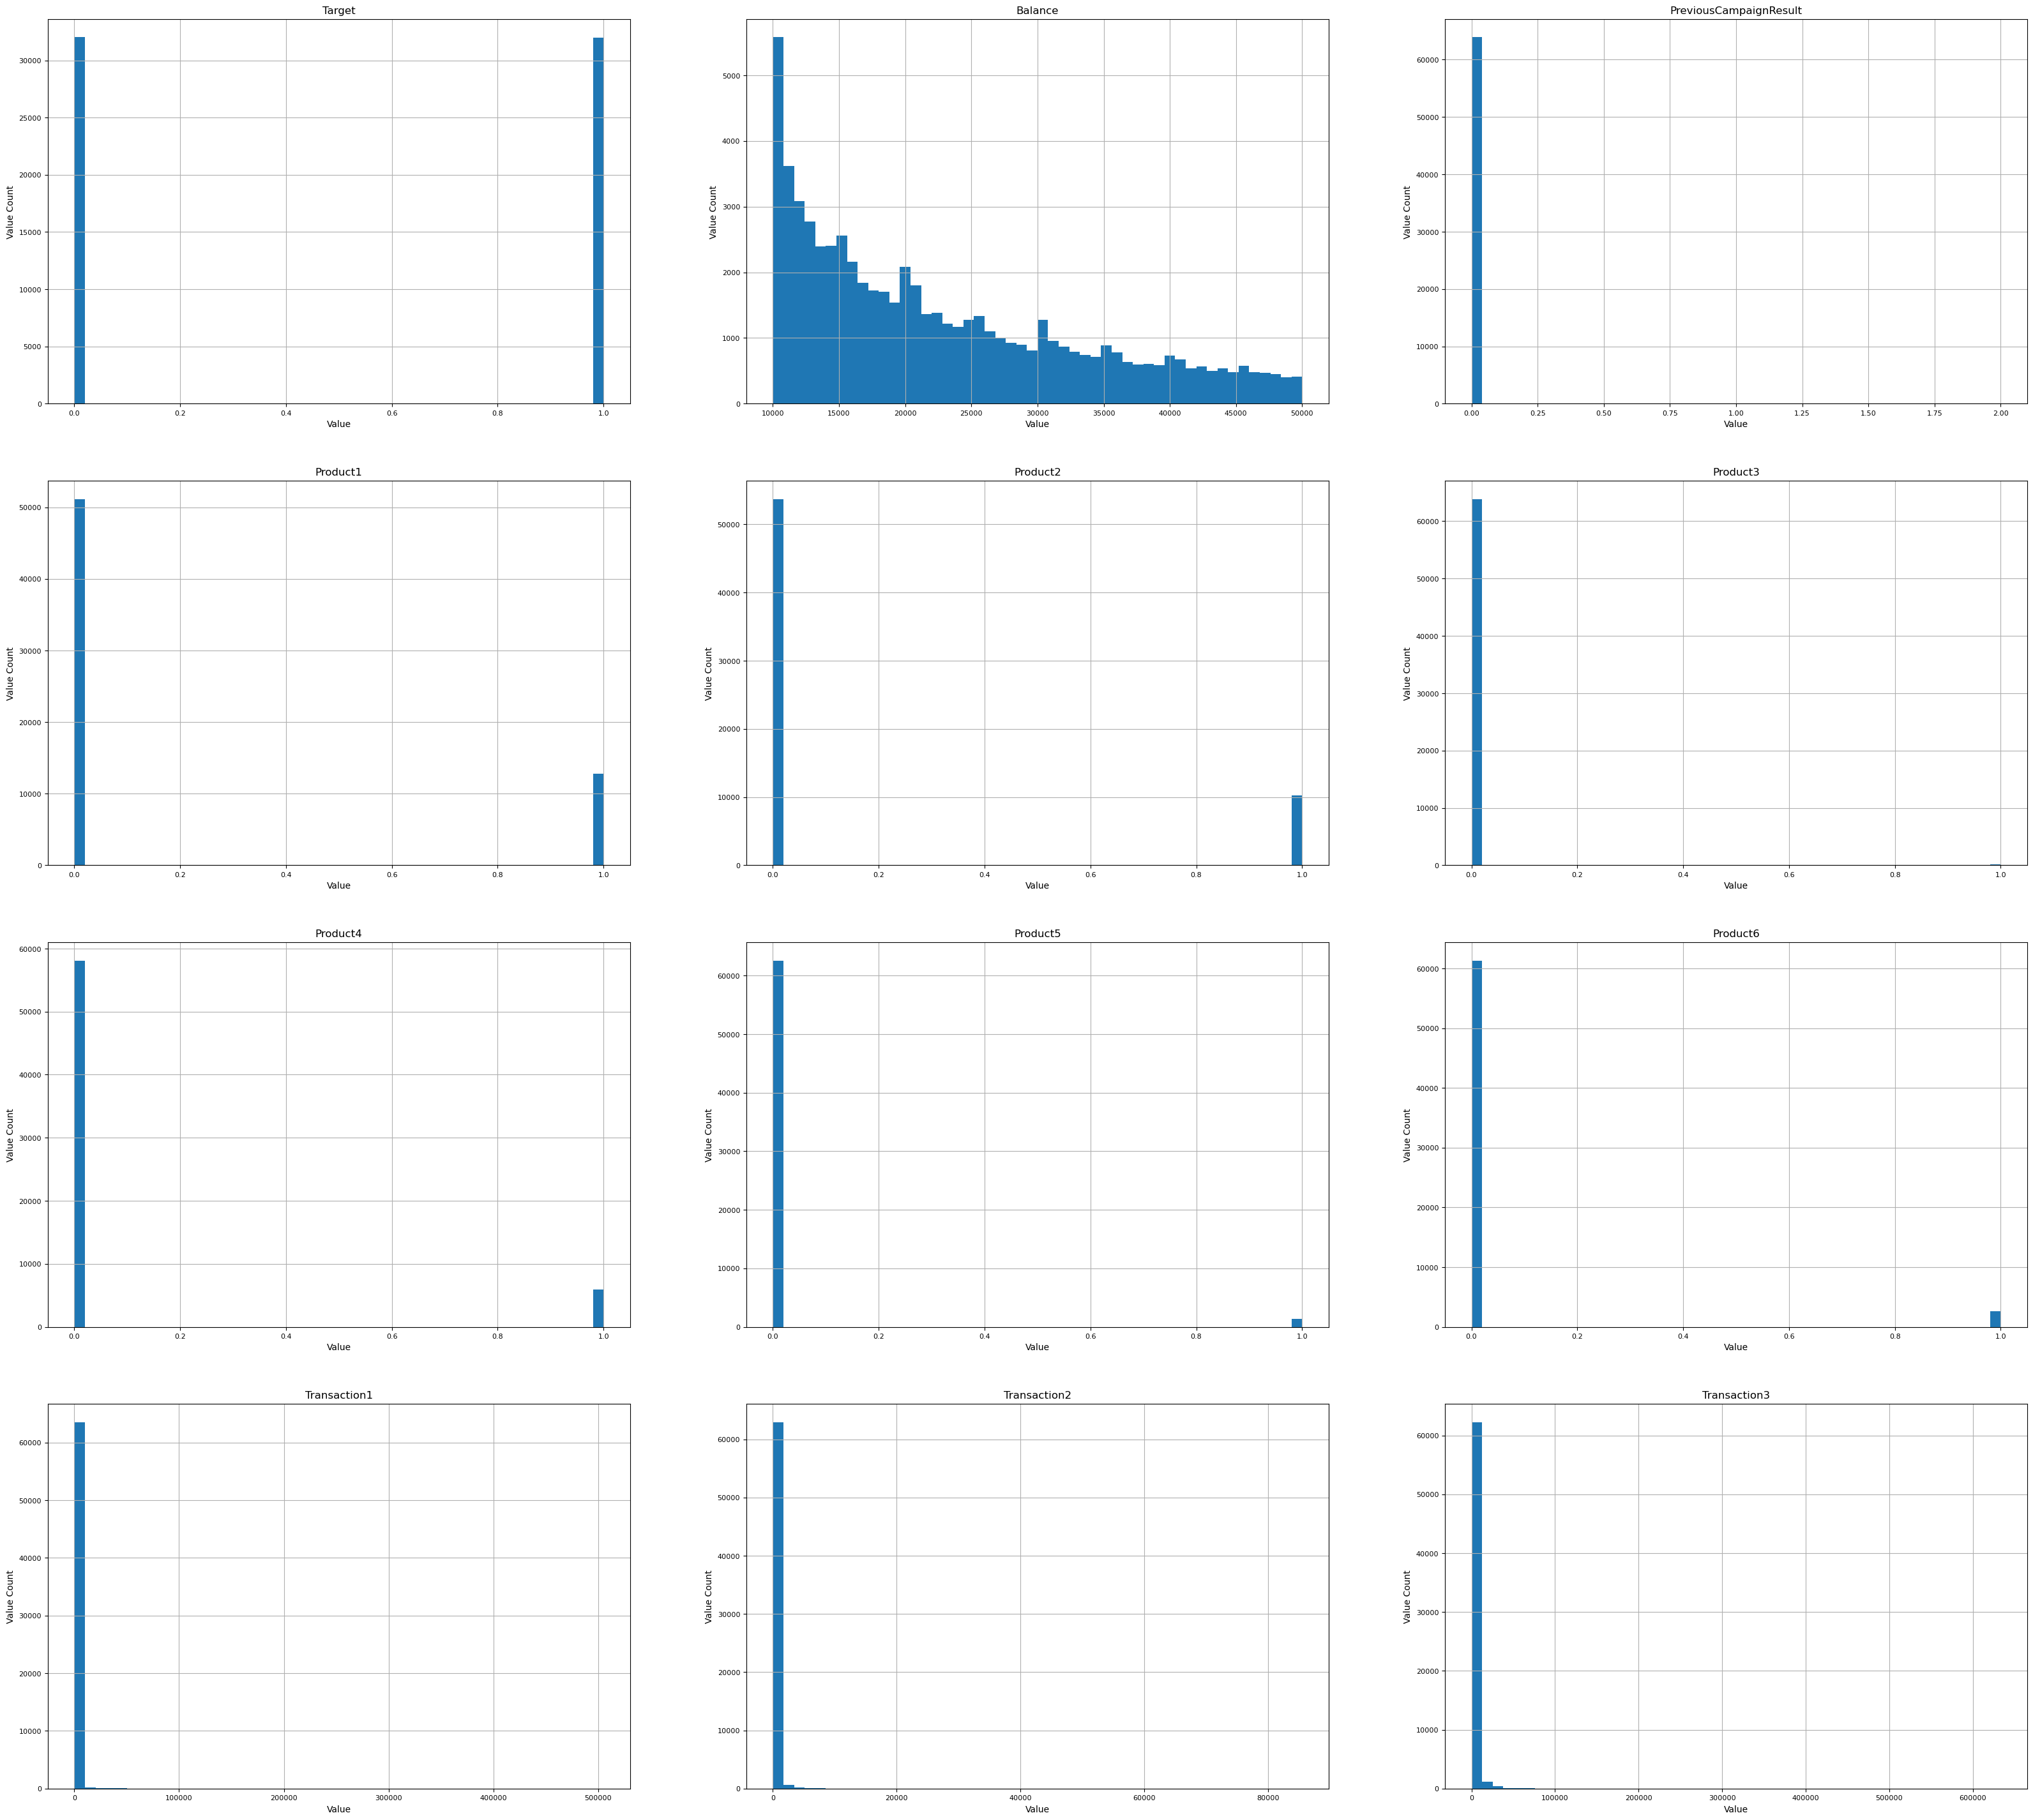

In [38]:
# First 12 features
histogram_plot(df, 0, 12)

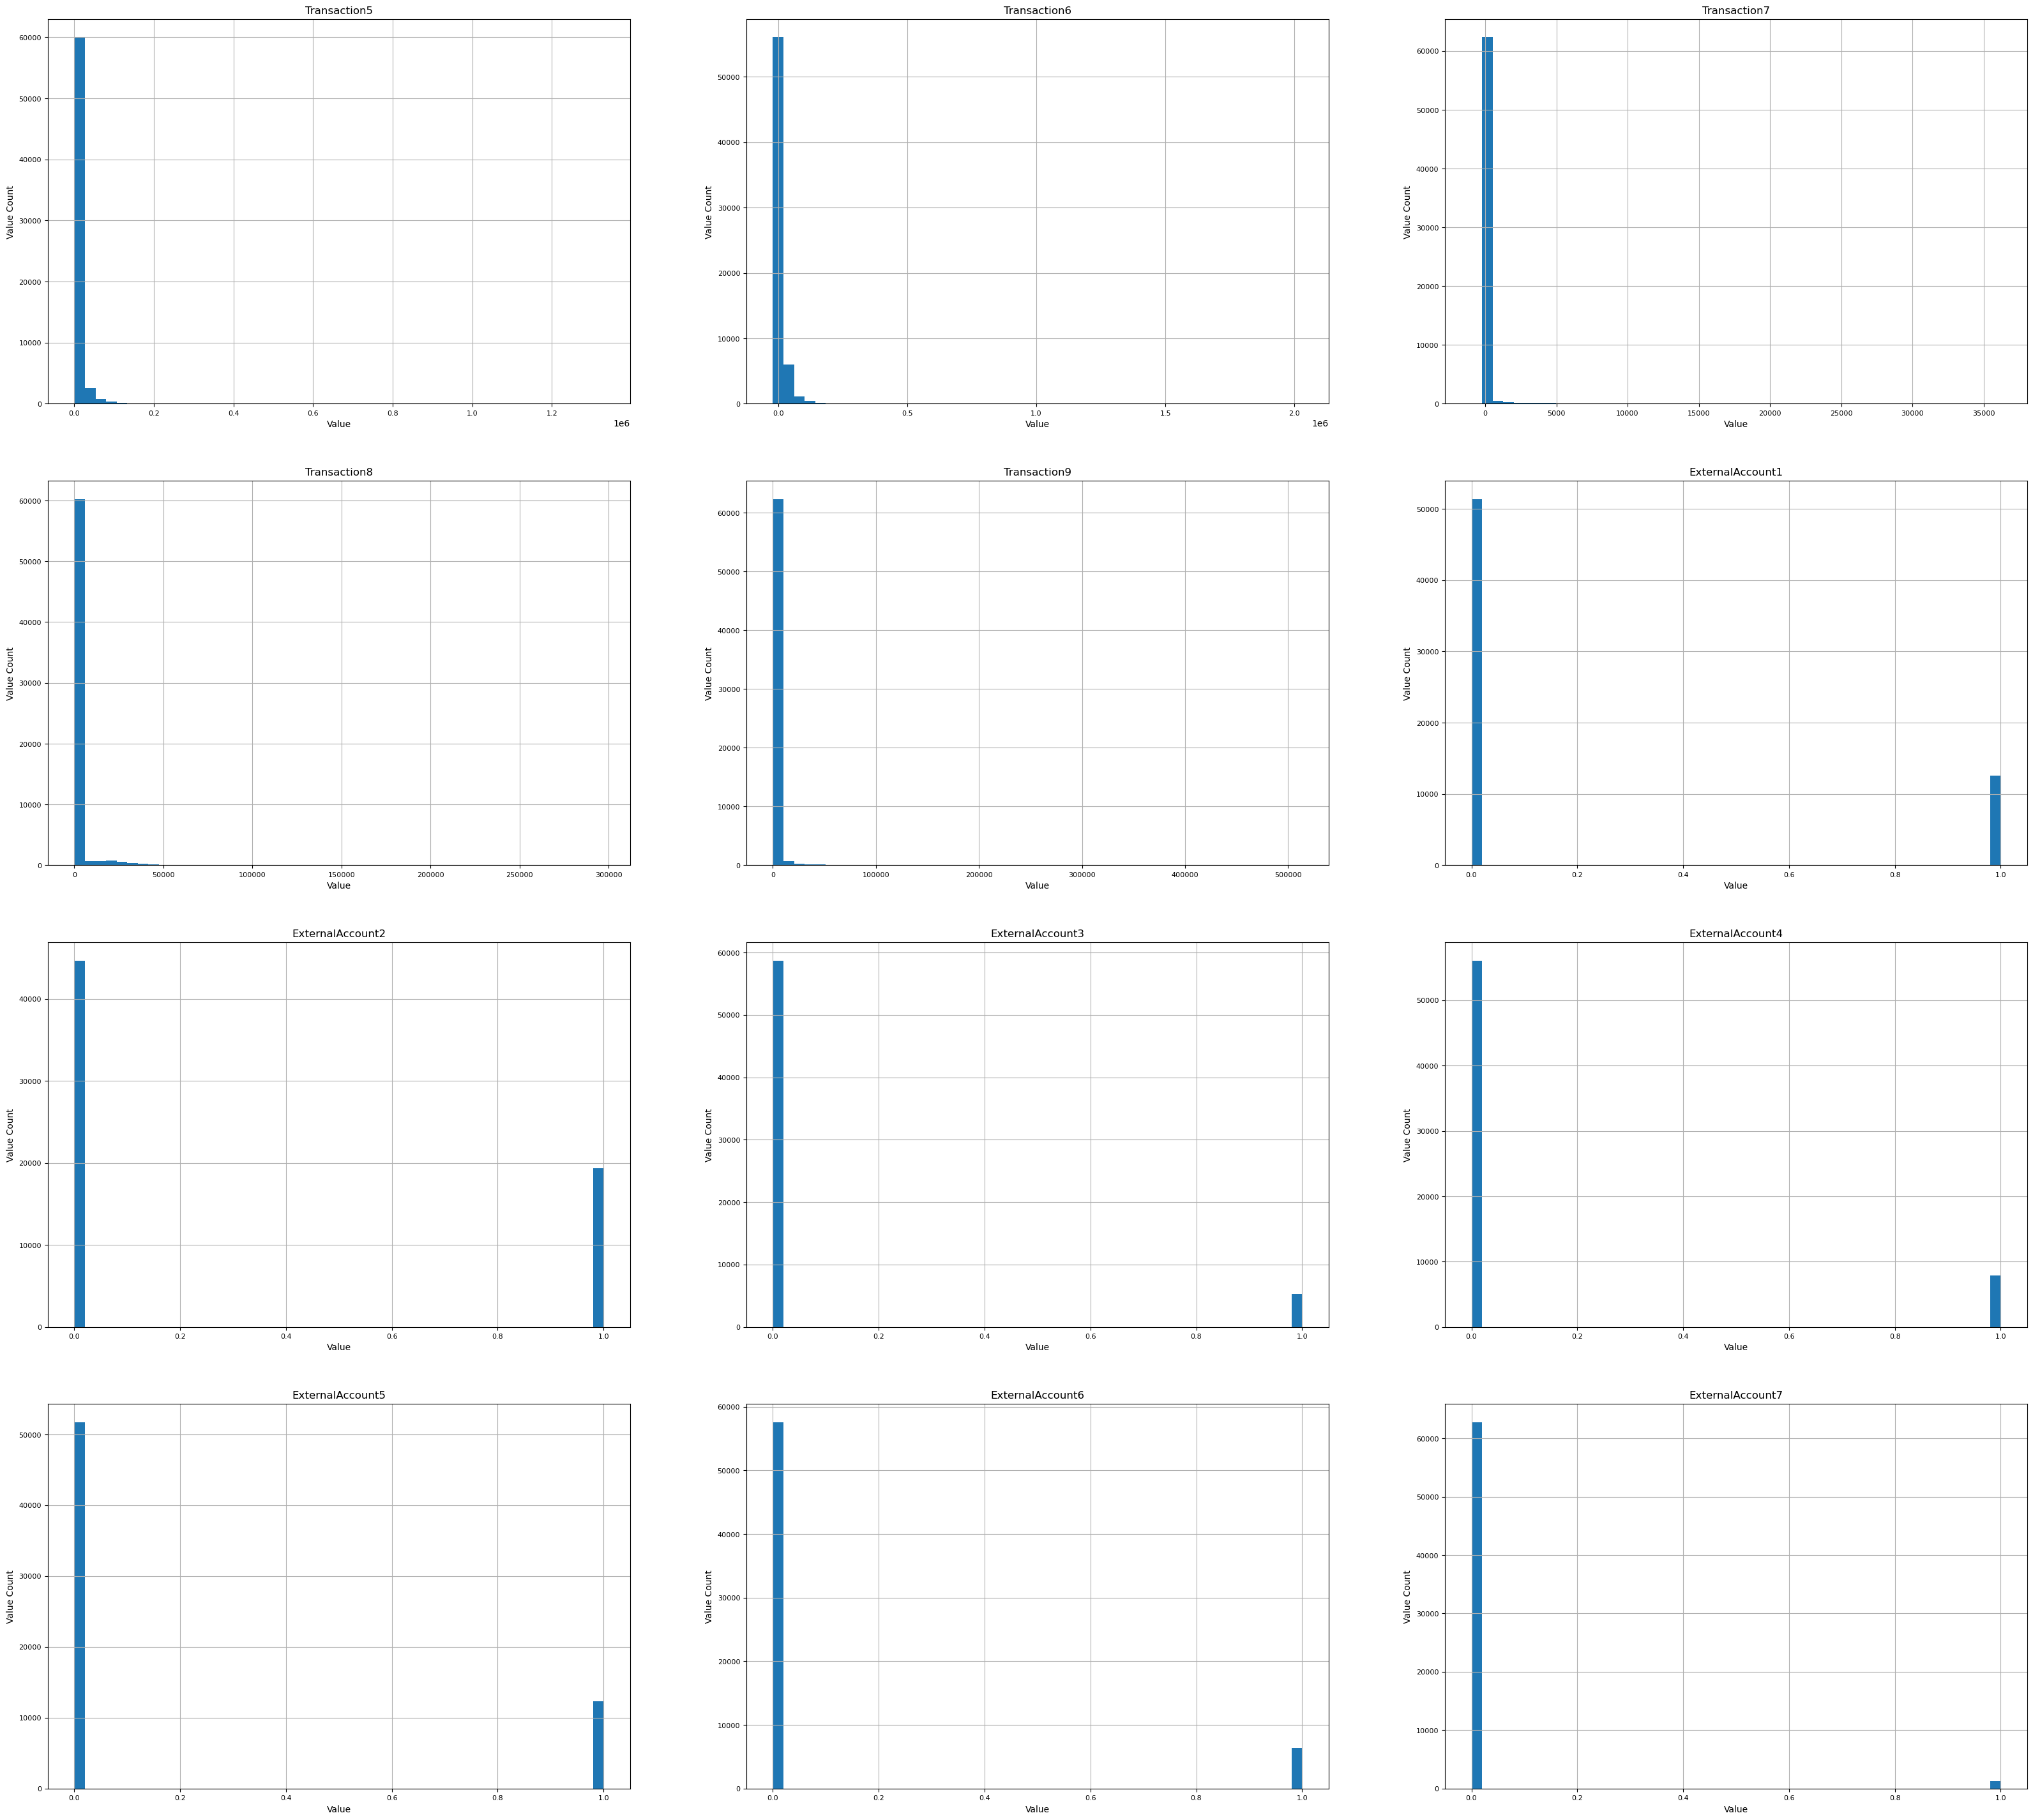

In [40]:
# The following 12 features
histogram_plot(df, 13, 25)

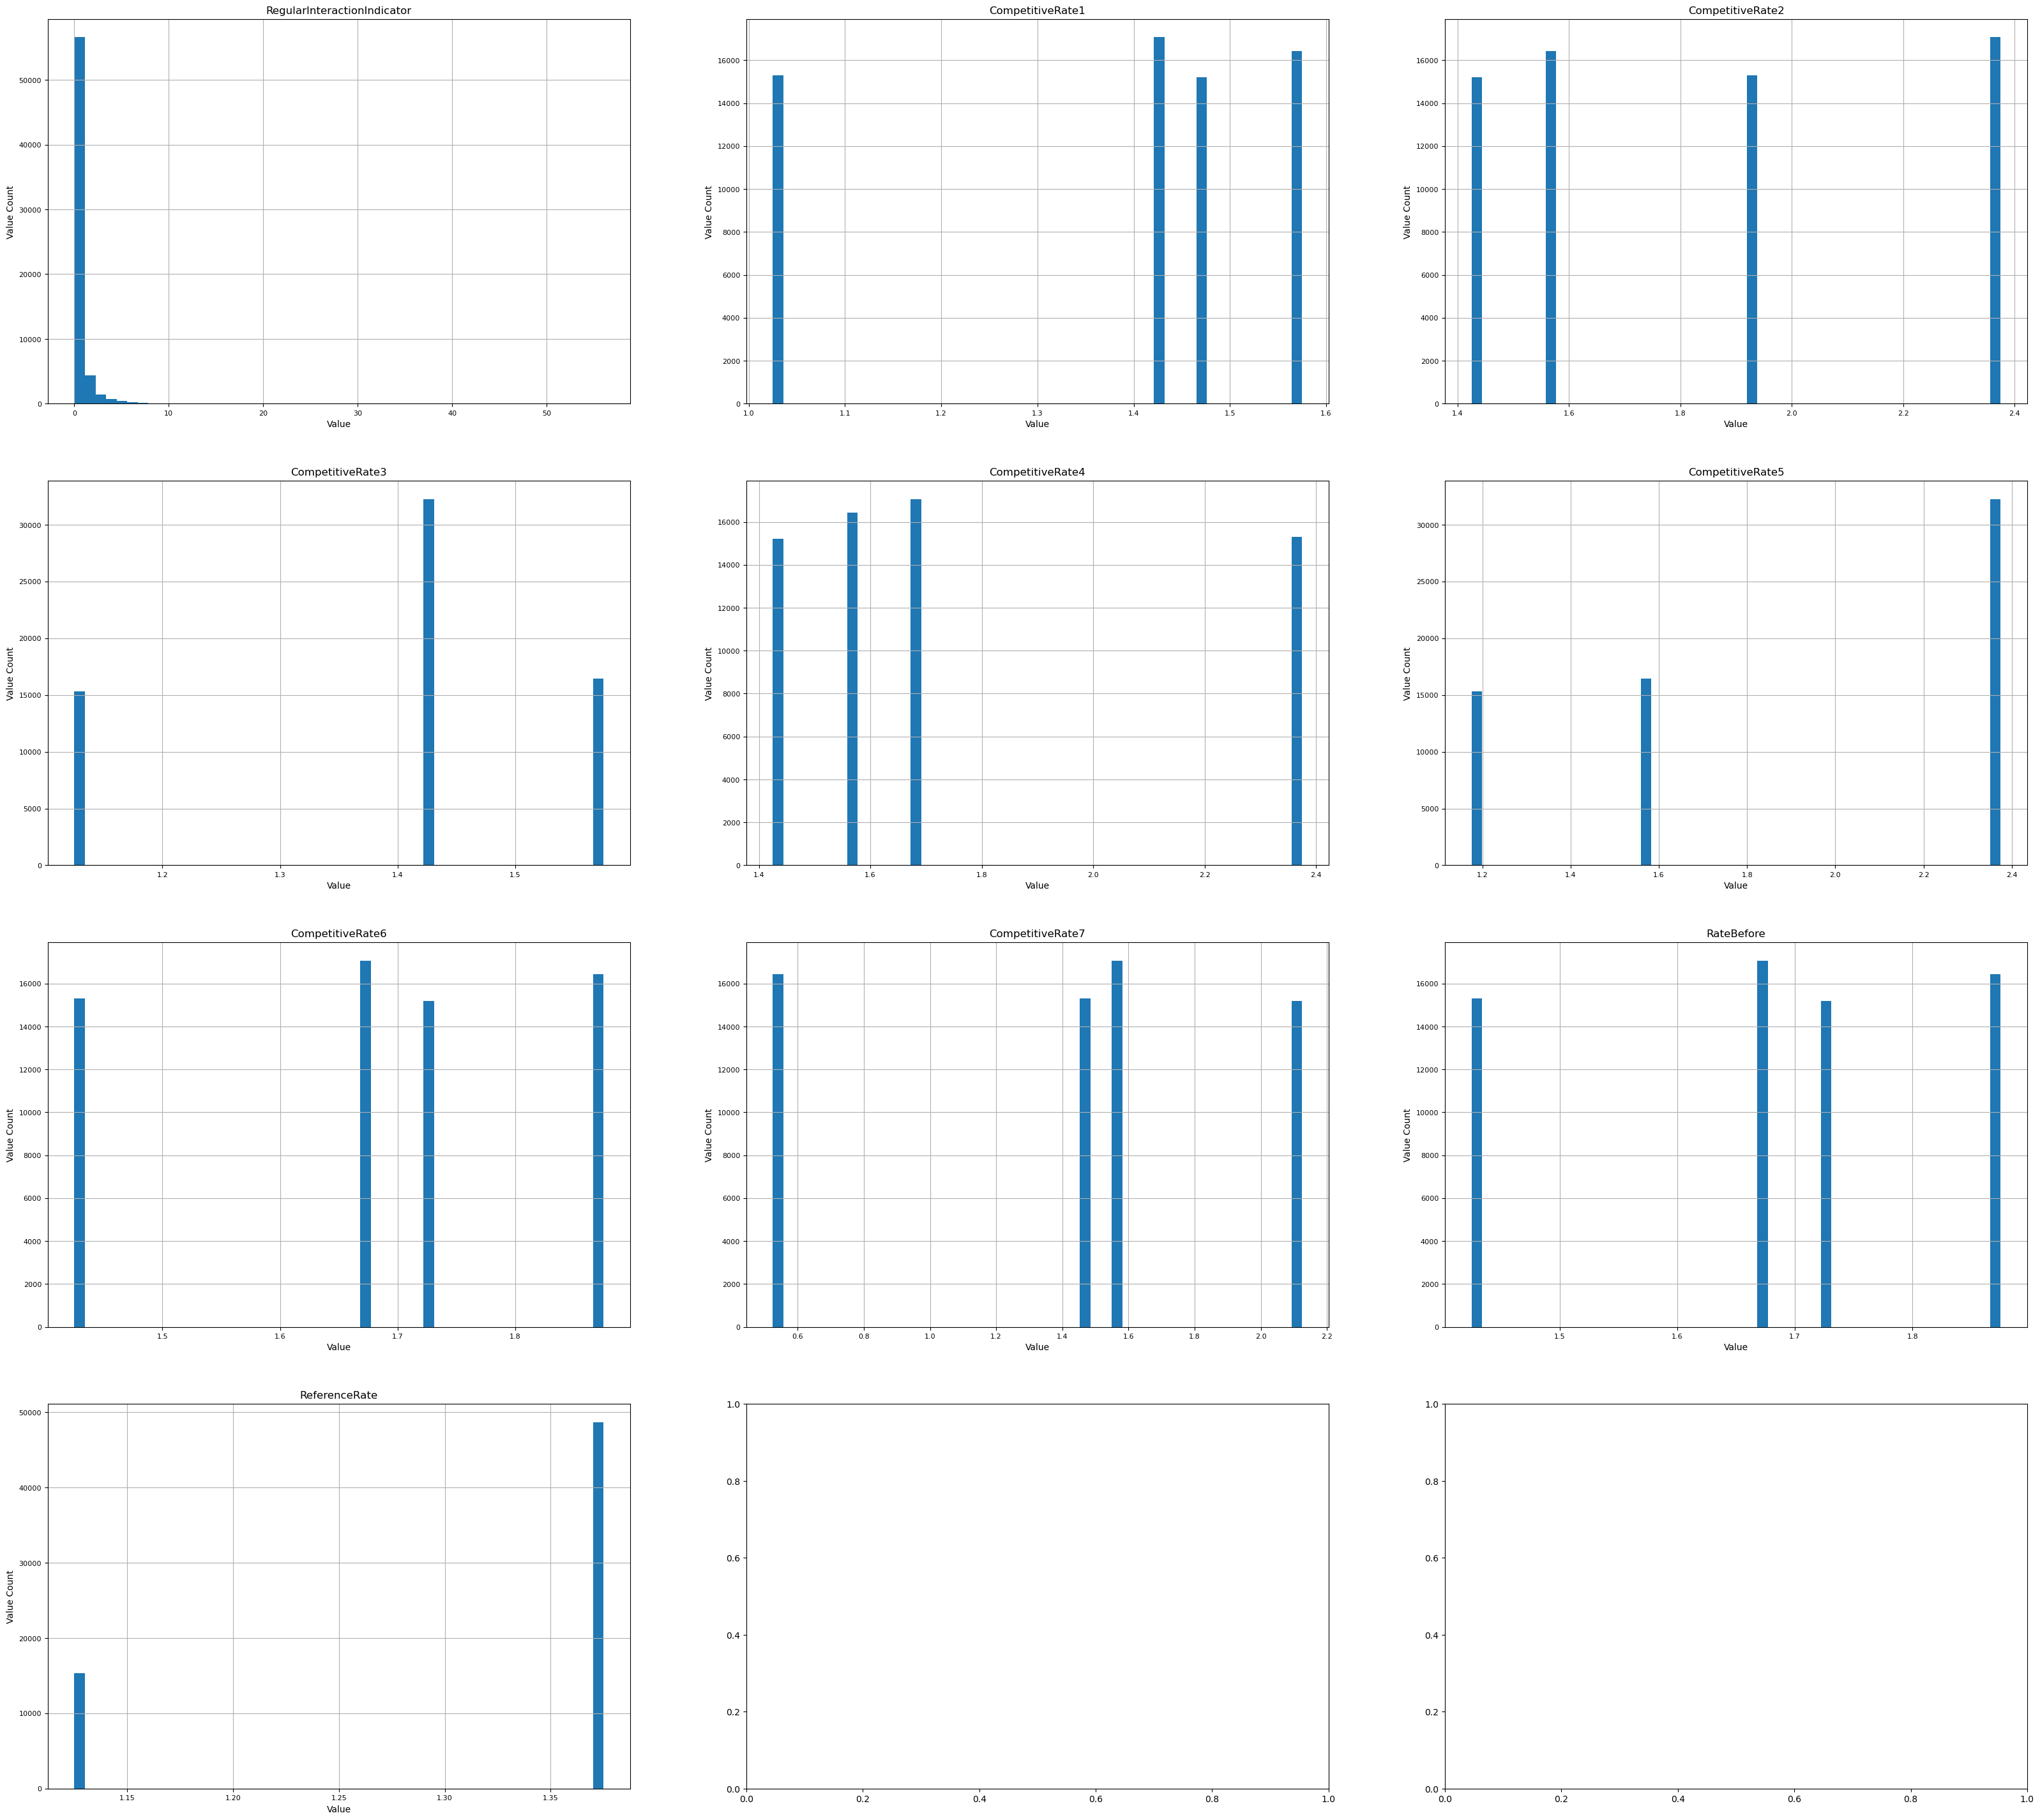

In [43]:
# The last 12 features
histogram_plot(df, 26, 36)

<div class="alert alert-block alert-warning">
<b>Observations: </b> 

- We can see that all features regarding Products and External Accounts have only two values 0 and 1 indicating whether or not the customers have that product or external account.
- Those transactions and balance features are right-skewed as the large amount of data points for these features are 0 values
</div>

<div class="alert alert-block alert-warning">
<b>Observations: </b> 

- Based on the statistical summary and histograms for all numerical features, we see that some of our features have outliers. Most of them are from the **transactions group, activity indicator and regular interaction indicator (belong to the numeric features group)**.
</div>

### Exploring data types and its count

In [86]:
# Separate features into correct data types
categorical_features = unique[(unique['Unique_Count'] <10)]['Feature'].tolist()

high_cardinality_features = unique[(unique['Unique_Count'] >= 10) & (unique['Unique_Count'] <=20)]['Feature'].tolist()

numeric_features=unique[(unique['Unique_Count'] > 20)]['Feature'].tolist()

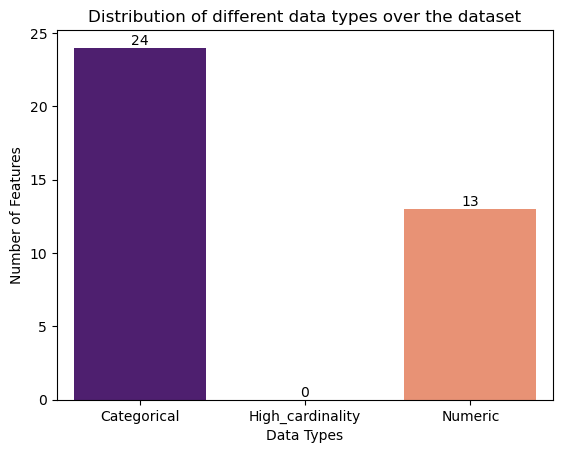

In [45]:
# Find the number of features based on their data types
data_types = ['Categorical', 'High_cardinality', 'Numeric']
num_lst = [len(categorical_features), len(high_cardinality_features), len(numeric_features)]

# Plotting the graph showing the difference between data types
plot = sns.barplot(x = data_types, y = num_lst, palette = 'magma')

# Show value for each bar in the graph
plot.bar_label(plot.containers[0])

plt.title('Distribution of different data types over the dataset')
plt.xlabel('Data Types')
plt.ylabel('Number of Features')
plt.show()

<div class="alert alert-block alert-warning">
<b>Observations: </b> 

- Regarding the number of unique values for our features, we have categorical and numeric features in this training dataset. Obviously, these categorical features have been pre-processed before so there is no need to pre-process them. However, we need to look closer to those numeric features to see if we need to do any transformation or scaling.
</div>

In [46]:
# Checking statistcal summary
train_df.drop("Target", axis = 1).describe().T

count          mean           std        min  \
Balance                      63999.0  22697.014218  10819.489043  10000.000   
PreviousCampaignResult       63999.0      0.001484      0.039303      0.000   
Product1                     63999.0      0.200441      0.400333      0.000   
Product2                     63999.0      0.160456      0.367031      0.000   
Product3                     63999.0      0.001766      0.041983      0.000   
Product4                     63999.0      0.092158      0.289251      0.000   
Product5                     63999.0      0.022125      0.147092      0.000   
Product6                     63999.0      0.041876      0.200307      0.000   
Transaction1                 63999.0    312.852441   4932.061568      0.000   
Transaction2                 63999.0     98.306560    897.296635      0.000   
Transaction3                 63999.0    972.439108   5903.126316    -34.340   
Transaction4                 63999.0  13346.706243  25046.228309 -33813.000   
Transaction5                 63999.0   5872.490416  22260.384402      0.000   
Transaction6                 63999.0   8831.981201  30516.802216 -20924.360   
Transaction7                 63999.0    101.191833    894.873343   -957.010   
Transaction8                 63999.0   1522.355254   7410.544303      0.000   
Transaction9                 63999.0   1123.682674   9570.708952      0.000   
ExternalAccount1             63999.0      0.197034      0.397762      0.000   
ExternalAccount2             63999.0      0.301911      0.459090      0.000   
ExternalAccount3             63999.0      0.082533      0.275176      0.000   
ExternalAccount4             63999.0      0.123783      0.329337      0.000   
ExternalAccount5             63999.0      0.191862      0.393768      0.000   
ExternalAccount6             63999.0      0.100423      0.300566      0.000   
ExternalAccount7             63999.0      0.019313      0.137623      0.000   
ActivityIndicator            63999.0     19.776778    104.827436      0.000   
RegularInteractionIndicator  63999.0      0.595291      1.162643      0.000   
CompetitiveRate1             63999.0      1.379736      0.206340      1.025   
CompetitiveRate2             63999.0      1.836435      0.370122      1.425   
CompetitiveRate3             63999.0      1.391770      0.161833      1.125   
CompetitiveRate4             63999.0      1.757322      0.357483      1.425   
CompetitiveRate5             63999.0      1.882755      0.516006      1.175   
CompetitiveRate6             63999.0      1.678434      0.160600      1.425   
CompetitiveRate7             63999.0      1.412233      0.575083      0.525   
RateBefore                   63999.0      1.678434      0.160600      1.425   
ReferenceRate                63999.0      1.315226      0.106634      1.125   

                                   25%        50%        75%          max  
Balance                      13499.005  19982.570  30104.035    50000.000  
PreviousCampaignResult           0.000      0.000      0.000        2.000  
Product1                         0.000      0.000      0.000        1.000  
Product2                         0.000      0.000      0.000        1.000  
Product3                         0.000      0.000      0.000        1.000  
Product4                         0.000      0.000      0.000        1.000  
Product5                         0.000      0.000      0.000        1.000  
Product6                         0.000      0.000      0.000        1.000  
Transaction1                     0.000      0.000      0.000   505000.000  
Transaction2                     0.000      0.000      0.000    85500.000  
Transaction3                     0.000      0.000      0.000   633506.040  
Transaction4                     0.000   5670.000  17500.000   917005.000  
Transaction5                     0.000      0.000   2000.000  1330000.000  
Transaction6                     0.000      0.000   5500.000  2029492.180  
Transaction7                     0.000      0.

In [47]:
train_df[numeric_features].columns

Index(['RegularInteractionIndicator', 'ActivityIndicator', 'Transaction1',
       'Transaction2', 'Transaction7', 'Transaction9', 'Transaction8',
       'Transaction3', 'Transaction5', 'Transaction6', 'Transaction4',
       'Balance', 'Customer_id'],
      dtype='object')

In [48]:
# Create a function to visualization heatmap
def corr_heatmap(data, idx_s, idx_e):
    y = data['Target']
    temp = data.iloc[:, idx_s:idx_e]
    if 'Customer_id' in temp.columns:
        del temp['Customer_id']
    temp['Target'] = y
    
    corr_spearman = temp.corr(method='spearman')

    # Create a Spearman correlation heatmap
    plt.figure(figsize=(40, 40))
    sns.heatmap(corr_spearman, cmap='coolwarm', center=0, annot=True)
    plt.title("Spearman Correlation between Features and Target")
    plt.show()

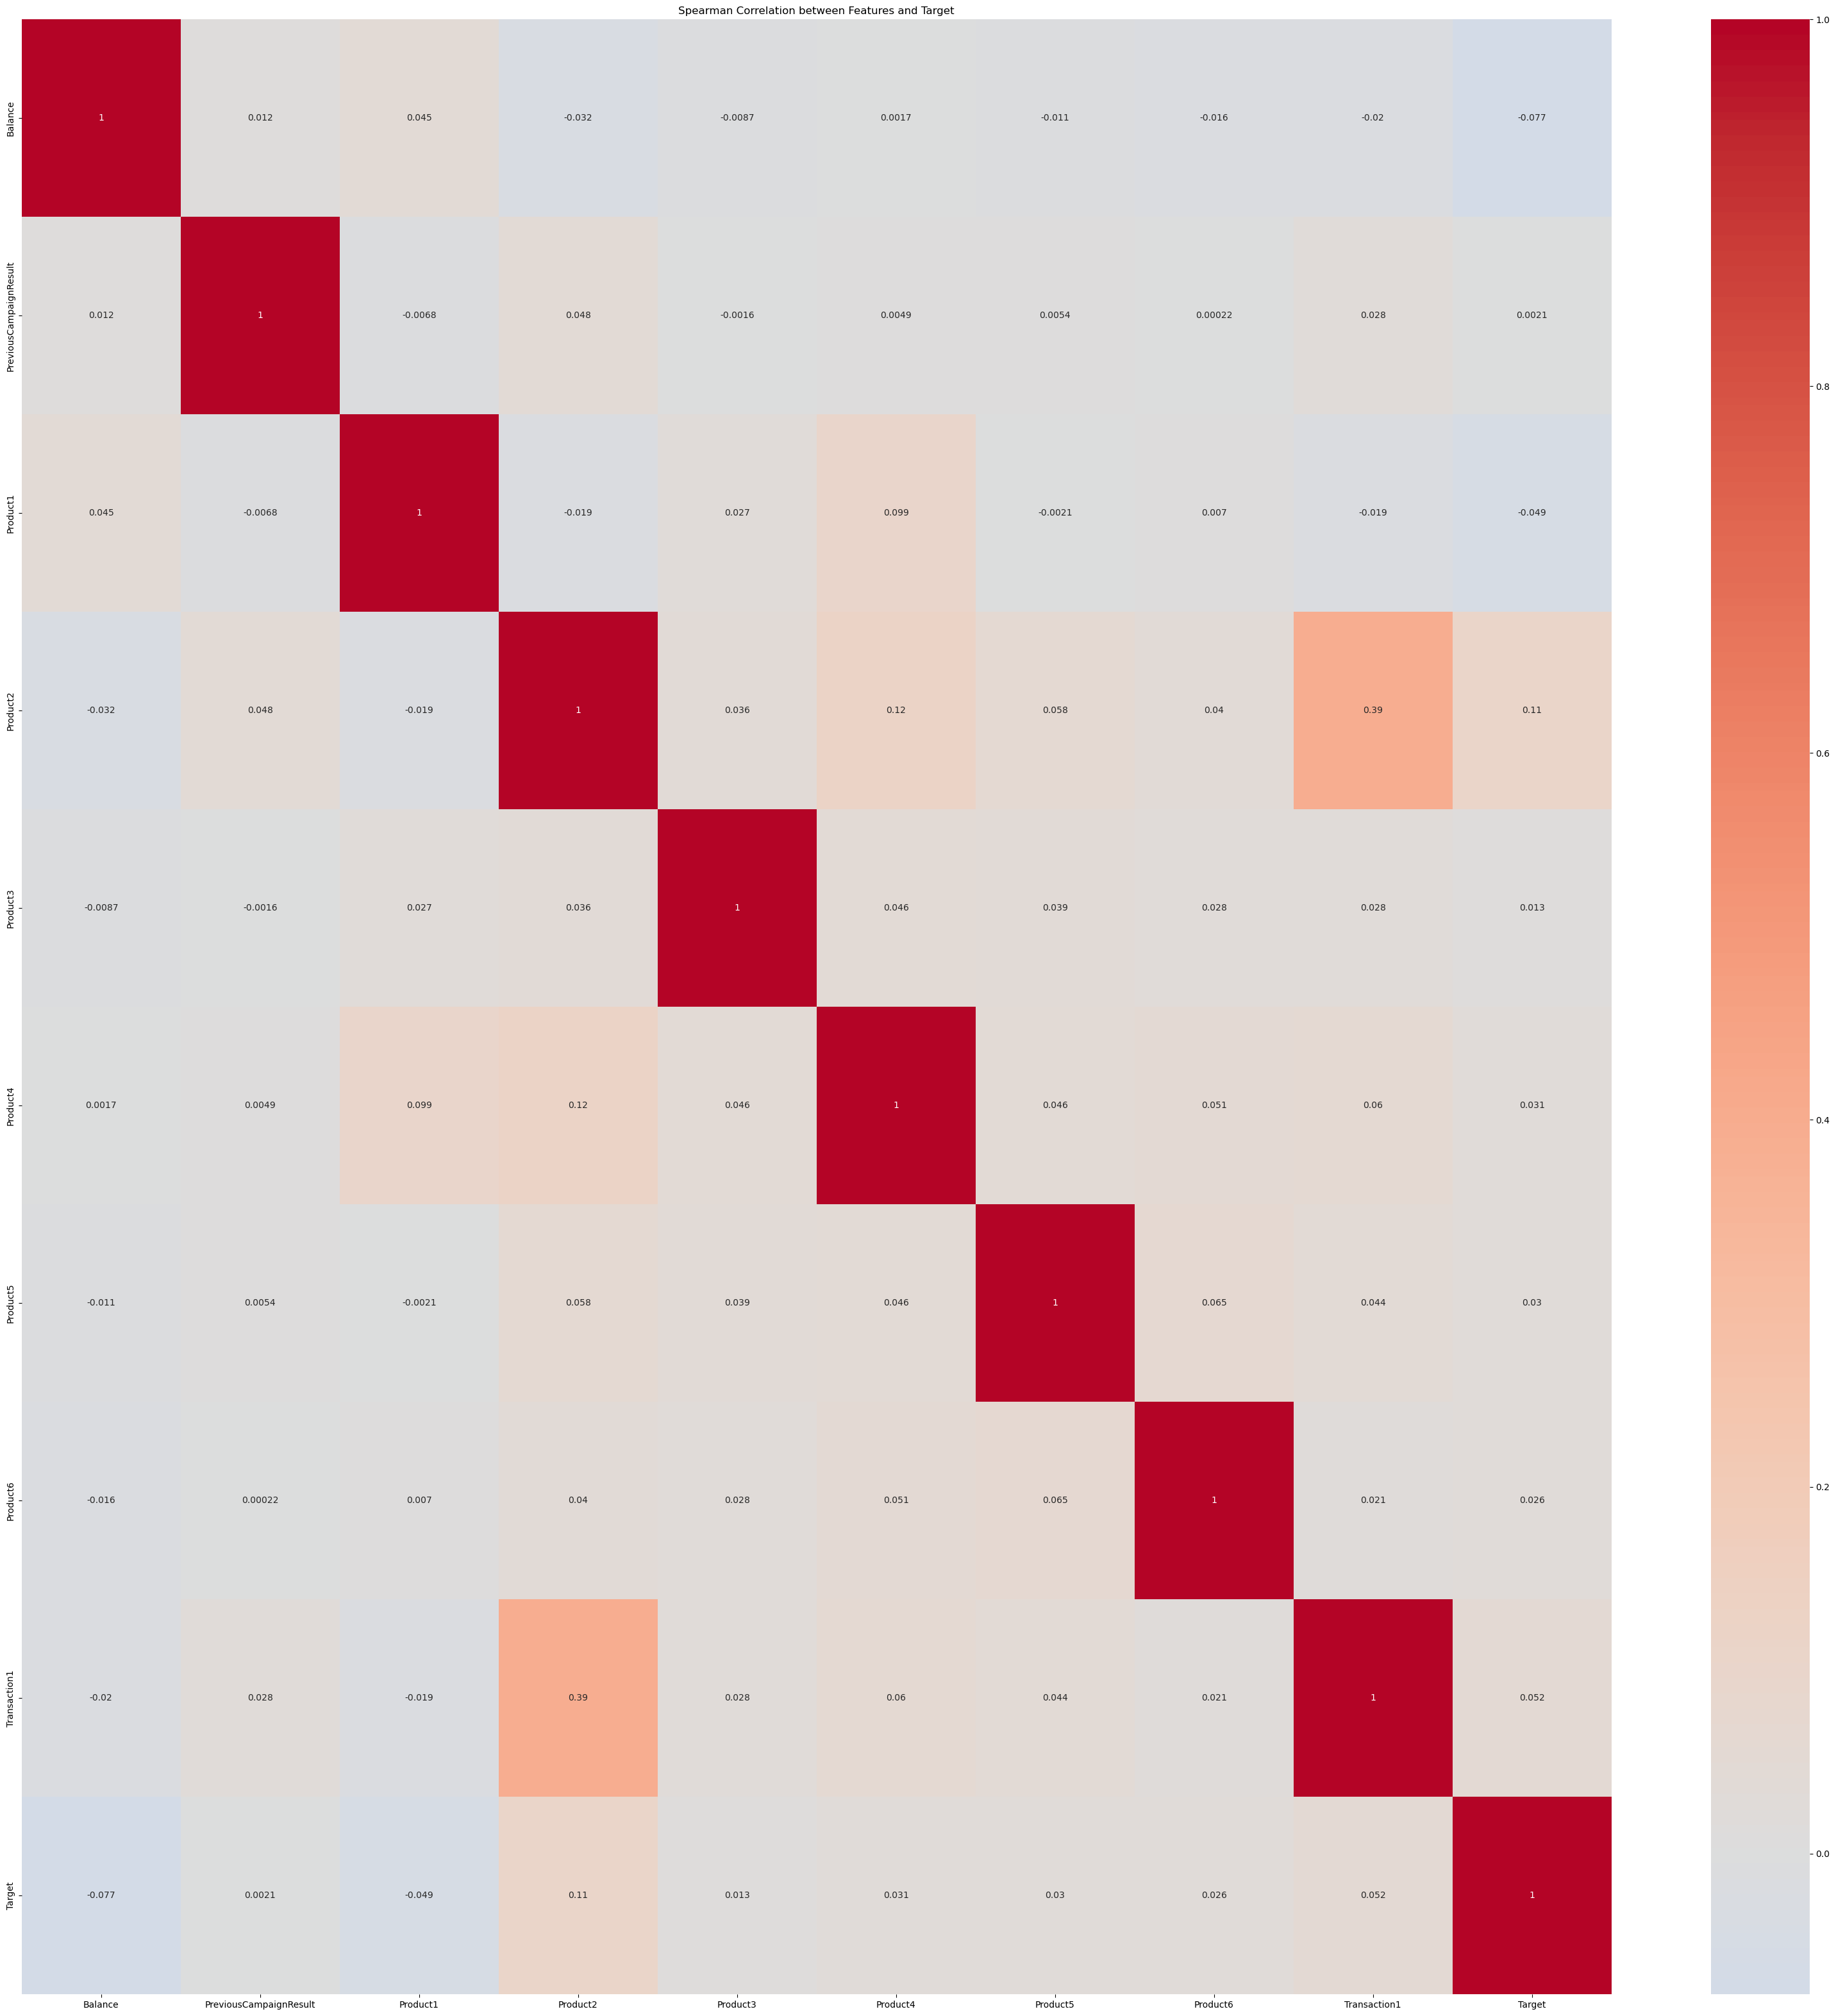

In [50]:
# First 10 features and Target
corr_heatmap(train_df, 0, 10)

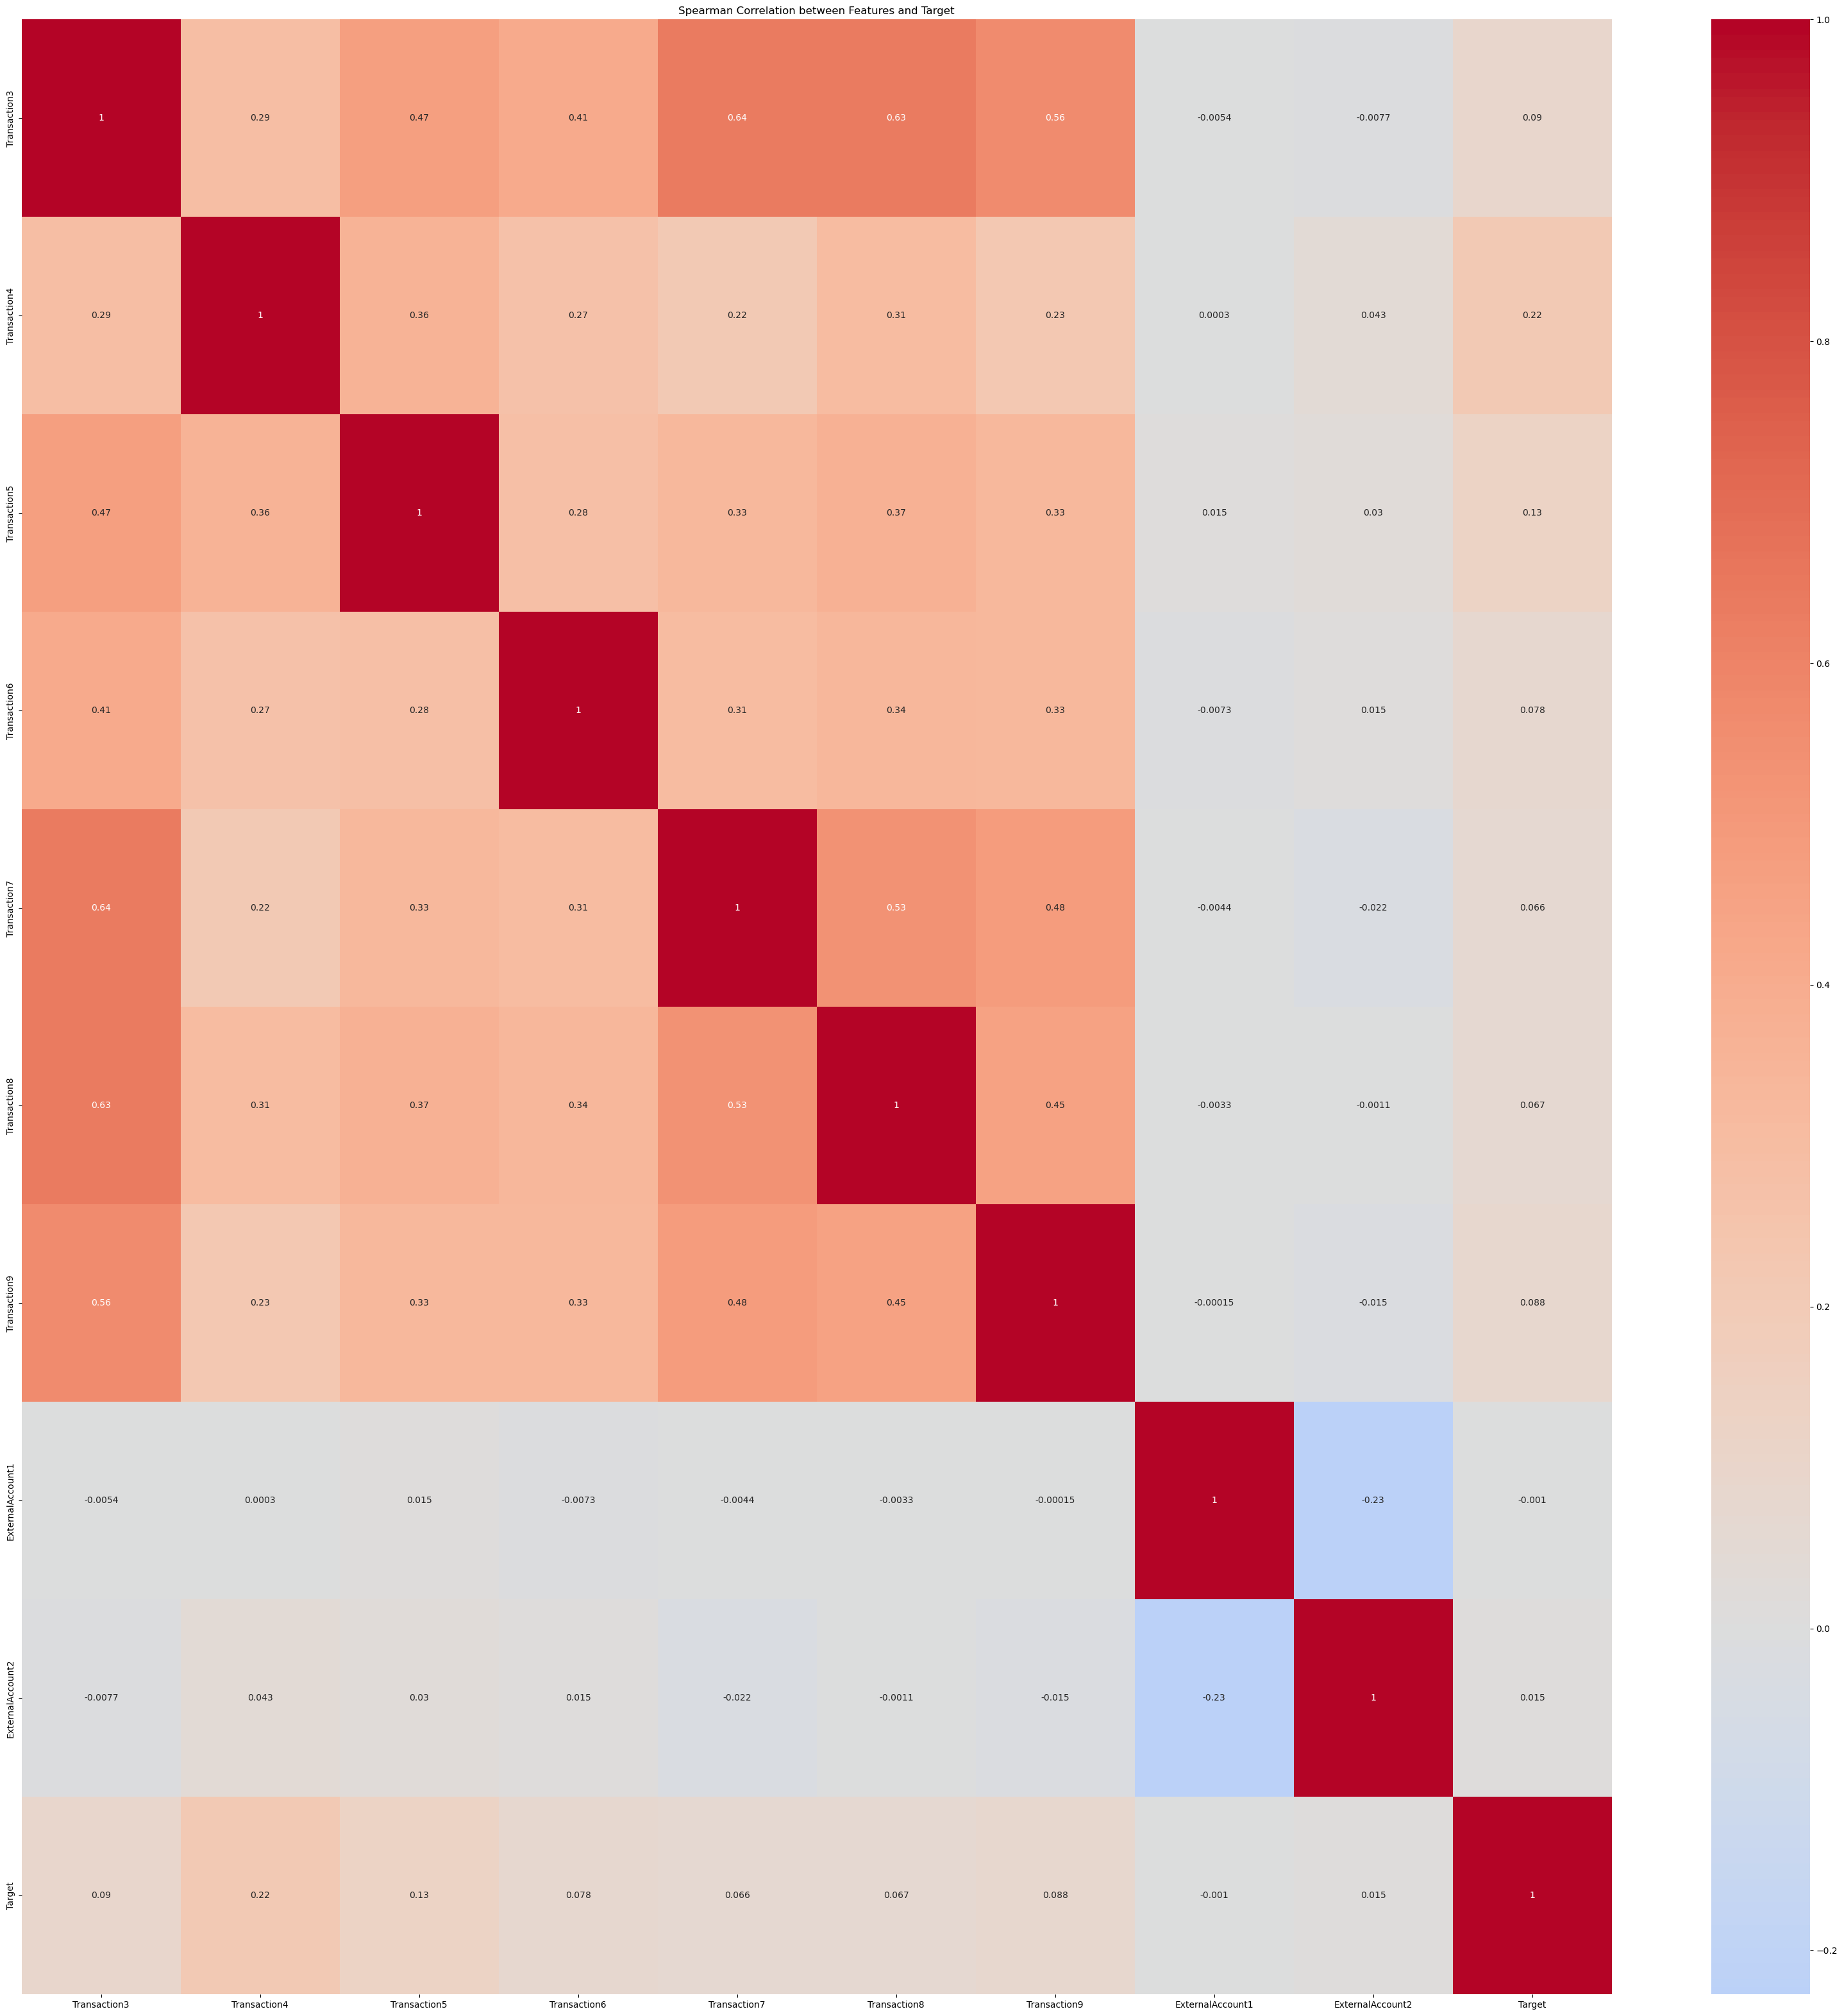

In [51]:
# Next 10 features
corr_heatmap(train_df, 11, 20)

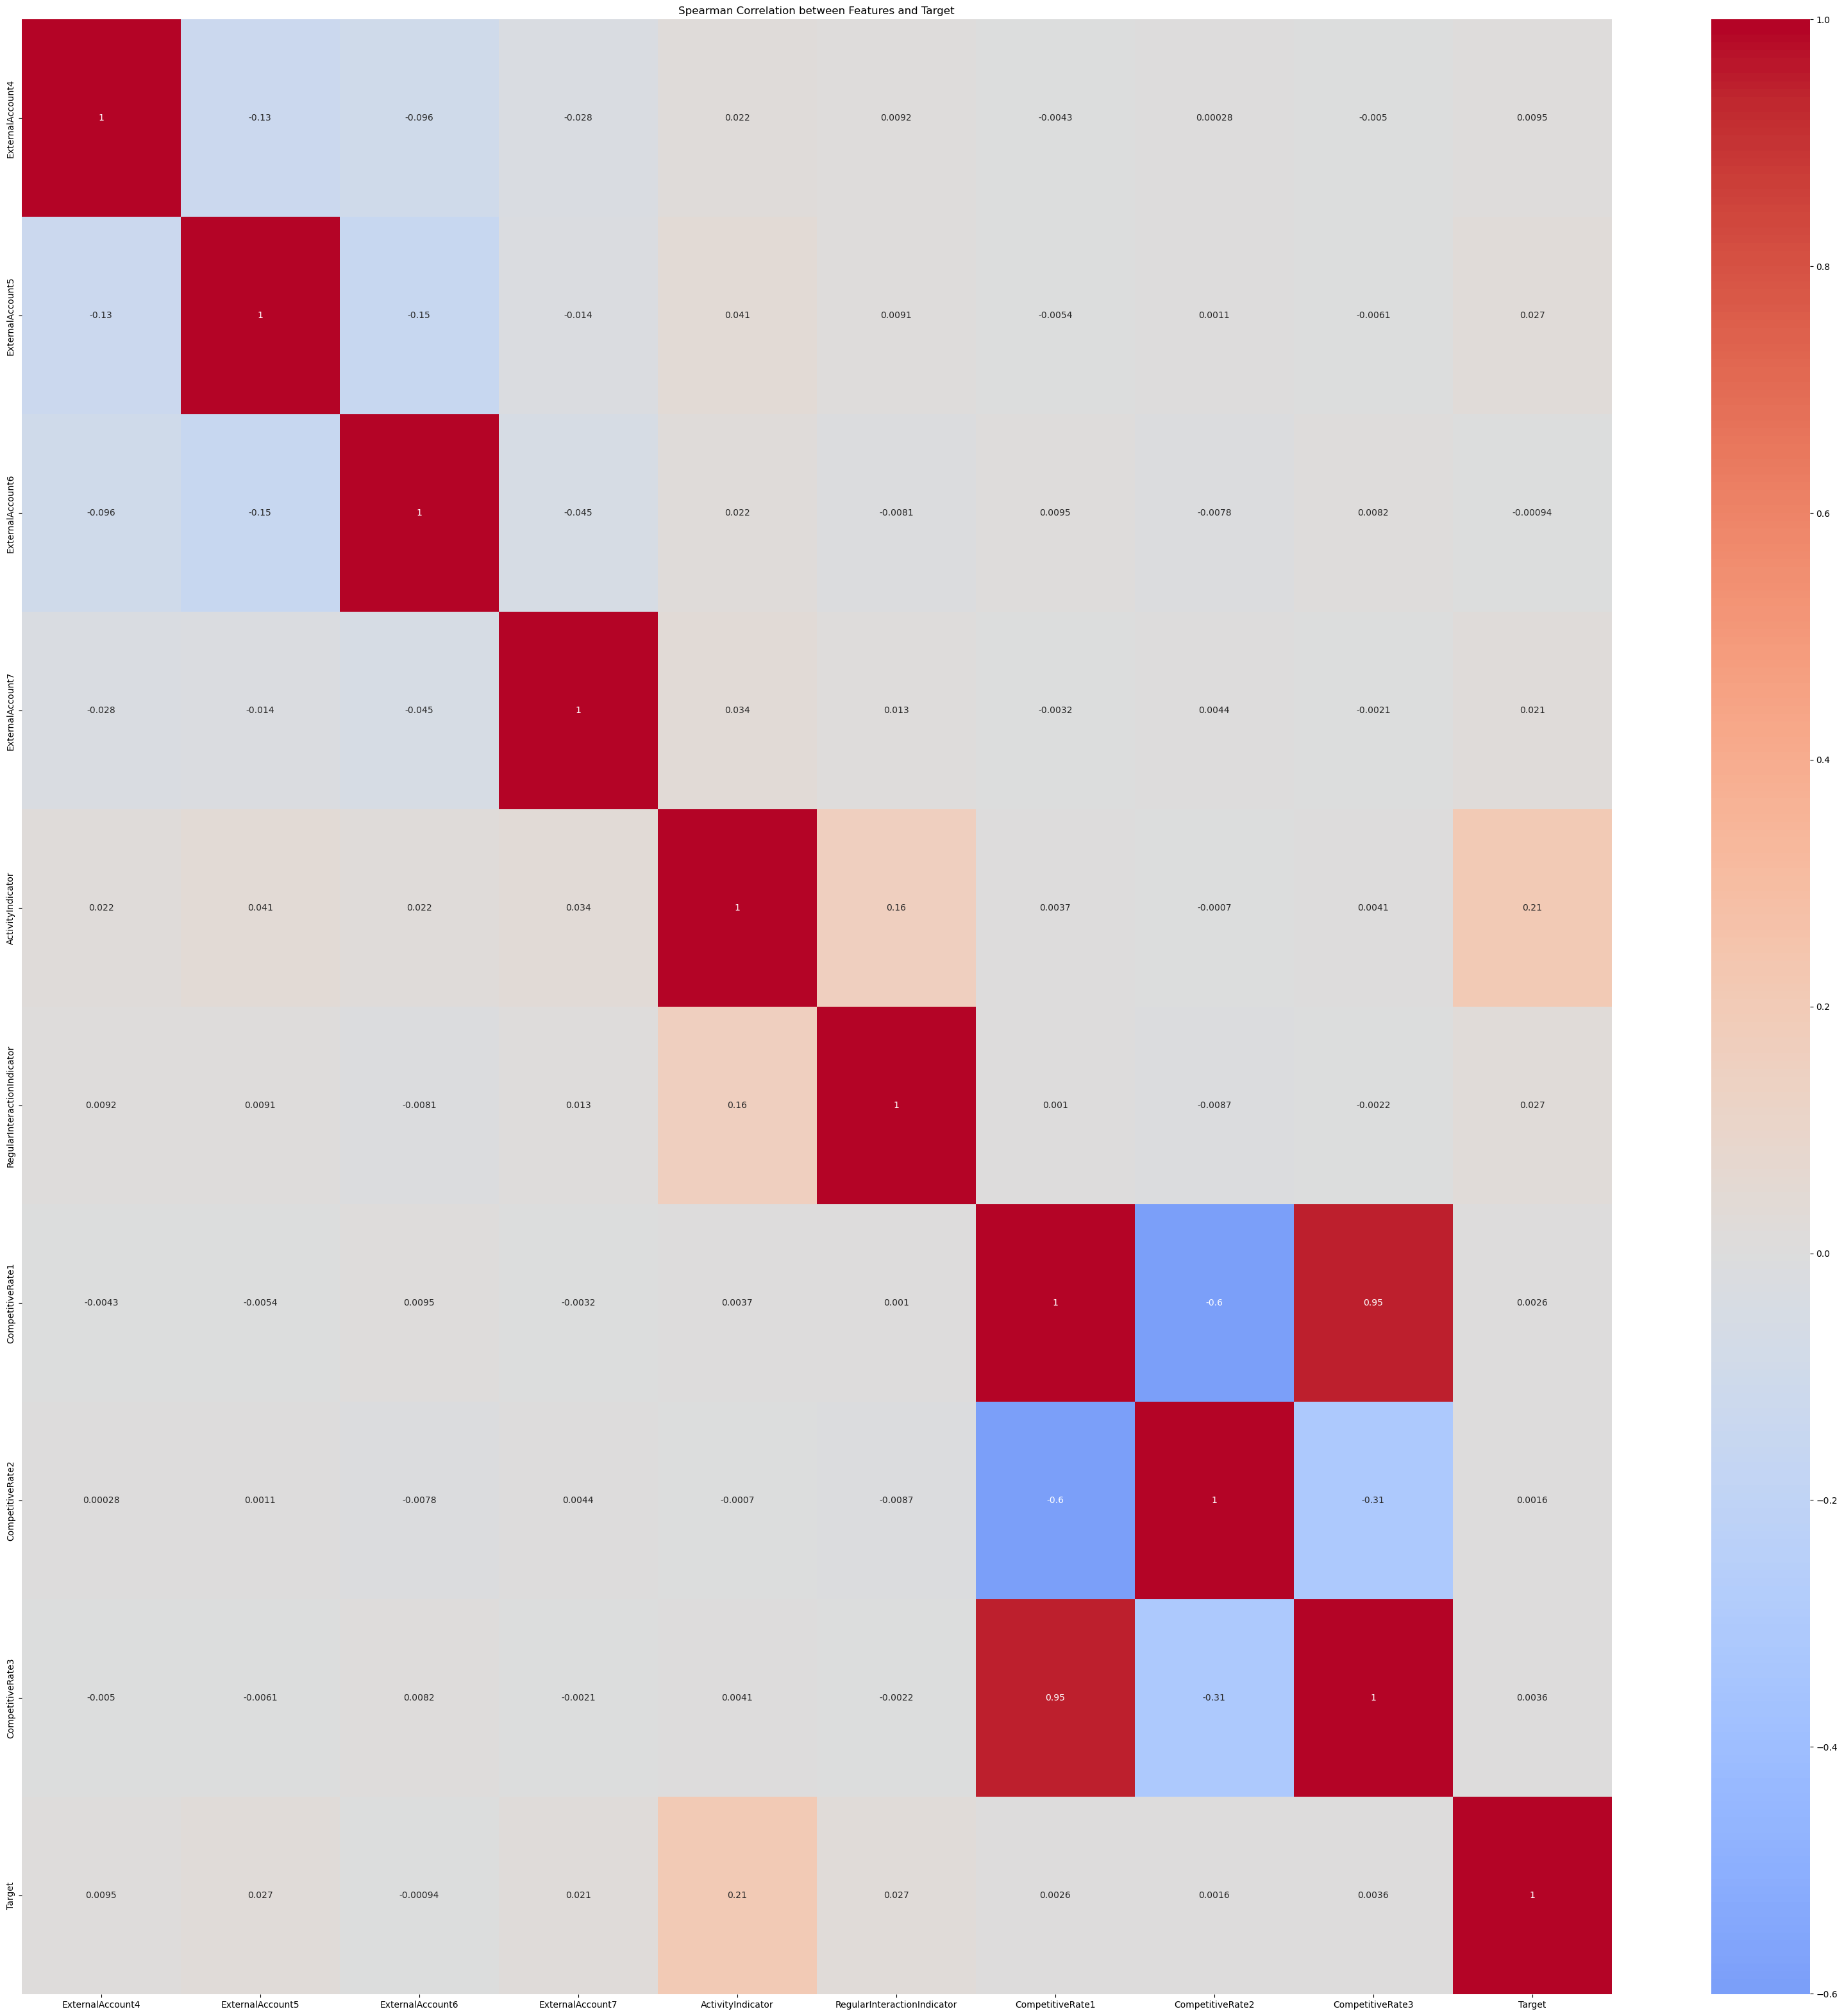

In [52]:
# Next 10 features
corr_heatmap(train_df, 21, 30)

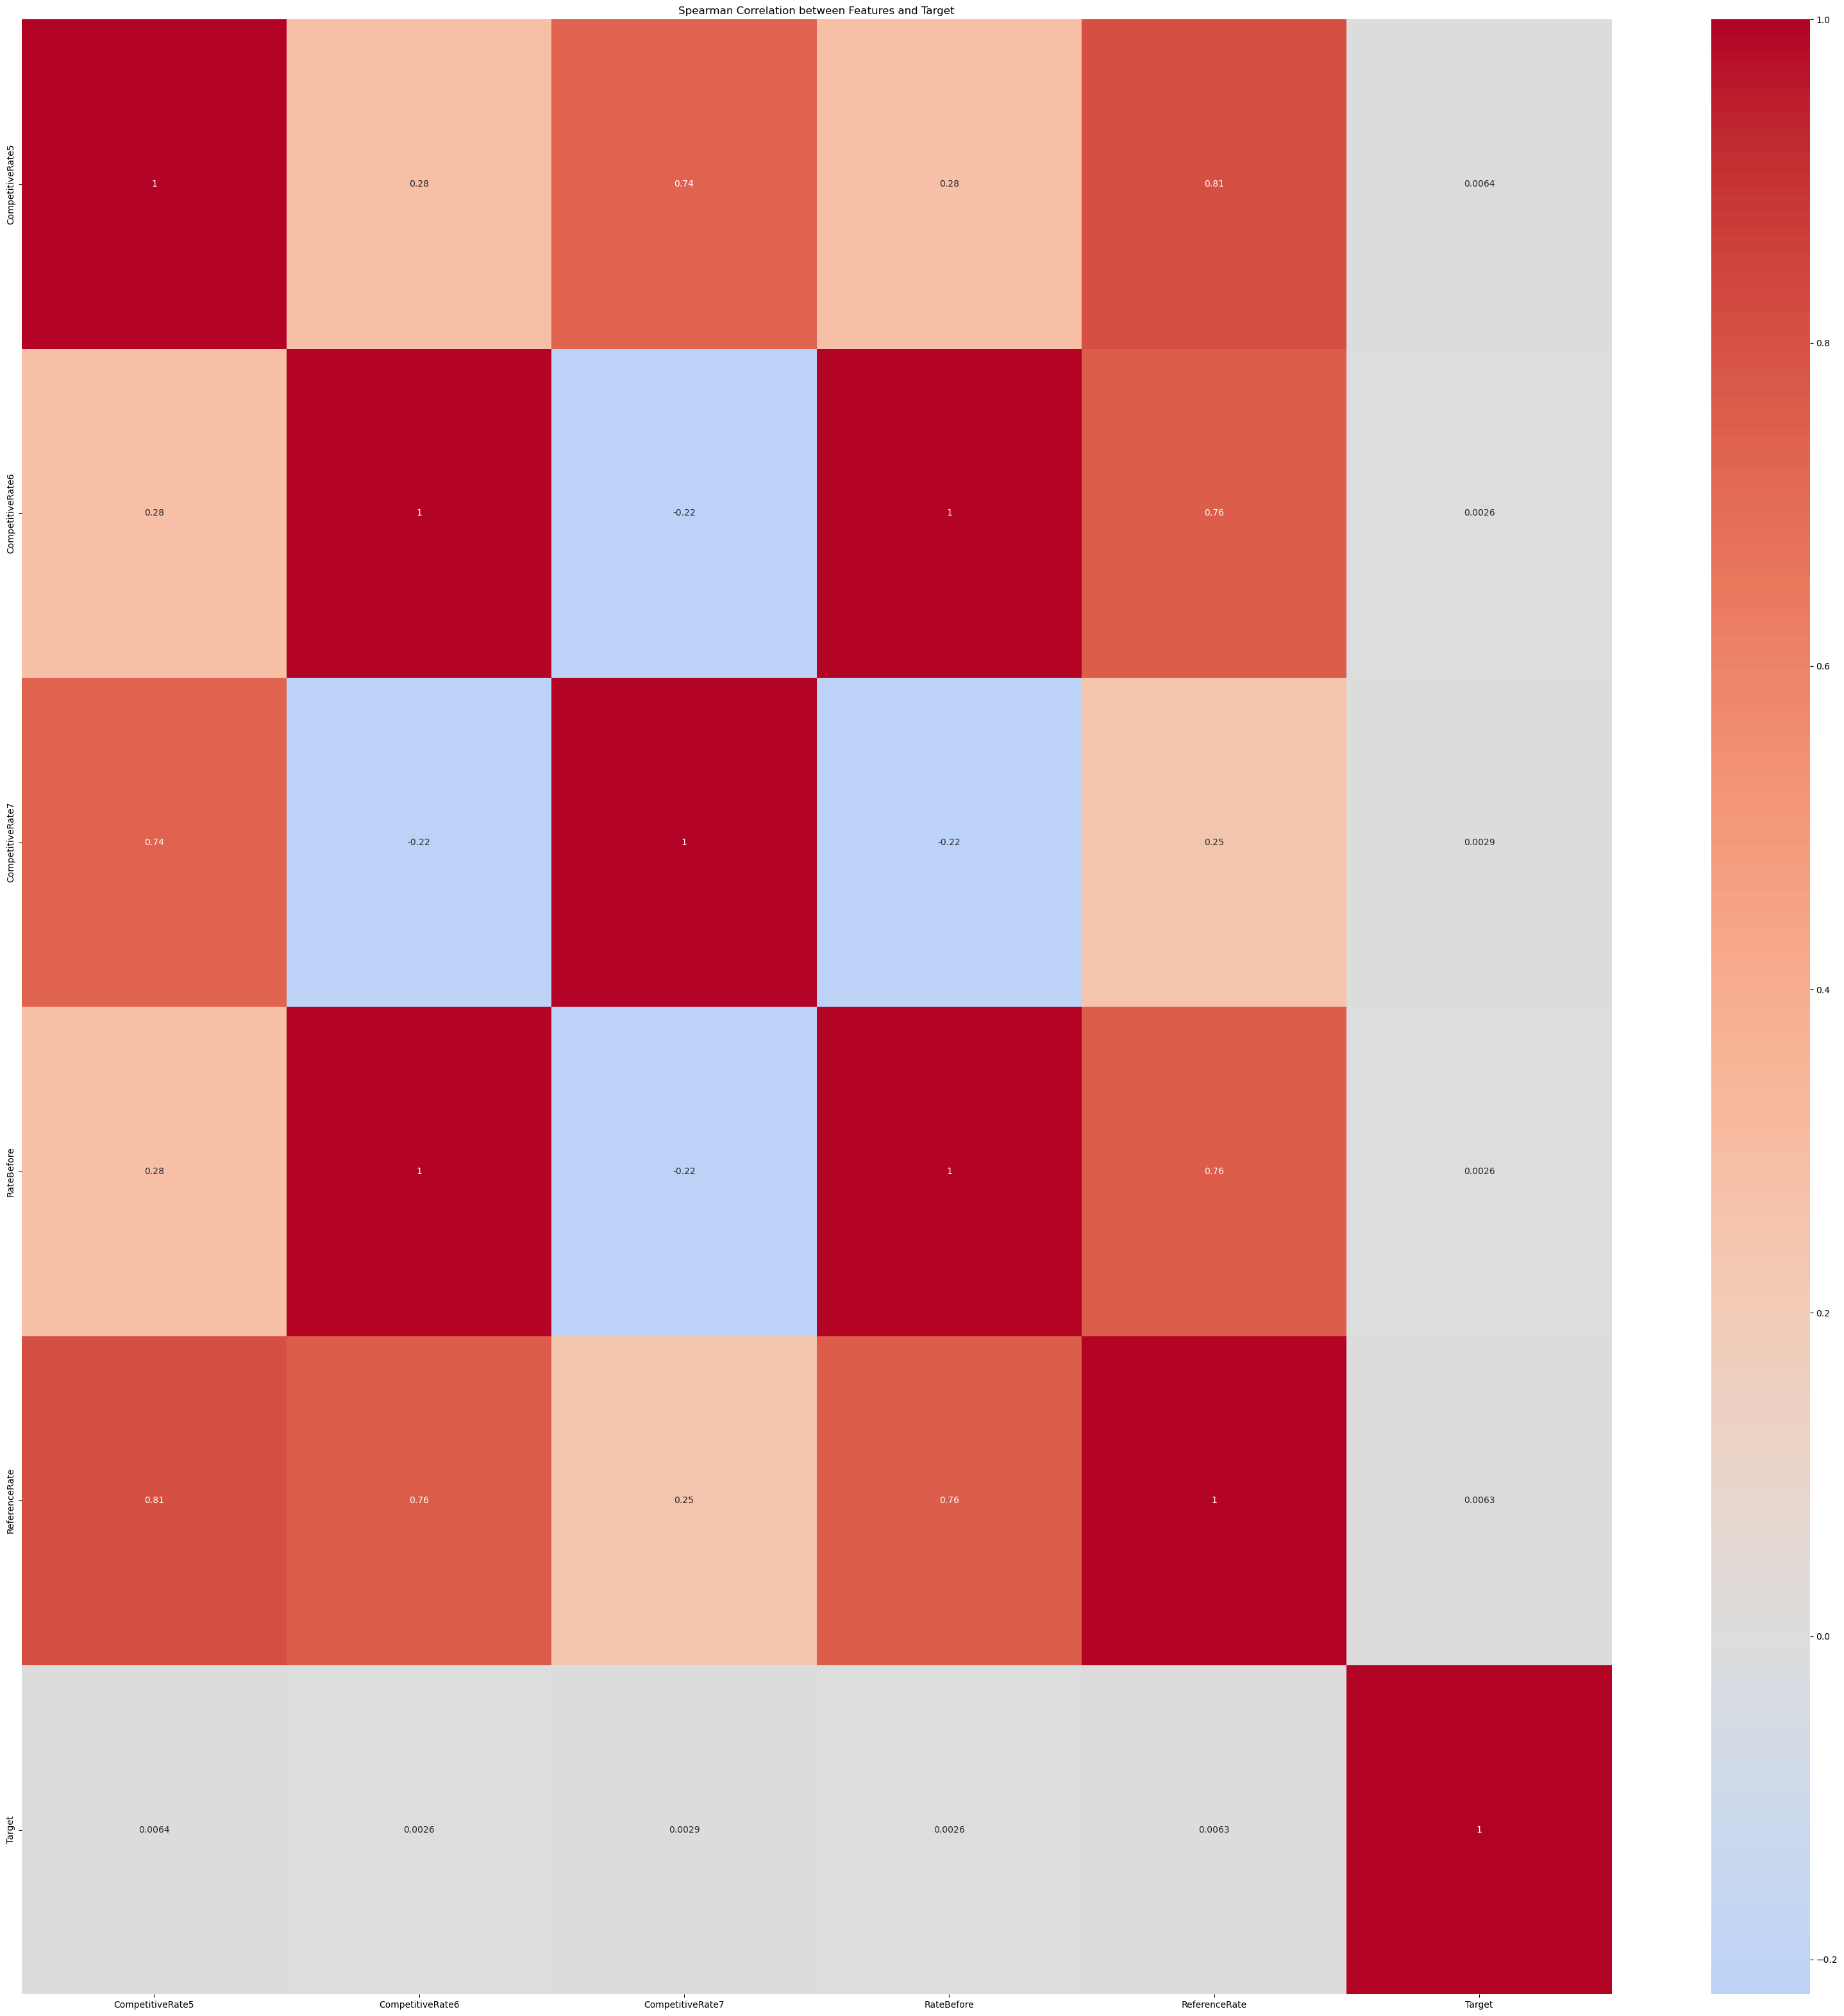

In [53]:
# Next 10 features
corr_heatmap(train_df, 31, 40)

<div class="alert alert-block alert-warning">
<b>Observations: </b> 

- Here, if we compare target feature with other features, there are many features who have alomst 0 correlation with our Target feature, **Let's try to visualise only the features that have highest correlation with Target**
</div>

In [60]:
# Selected 13 highly correlated features with Target
corrmat = train_df.corr(method='spearman')
k = 13 #number of variables for heatmap
cols = corrmat.nlargest(k, 'Target')['Target'].index

C:\Users\HP\AppData\Local\Temp\ipykernel_23860\1955343571.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



In [61]:
# Create highly correlated df
high_correlated_df = train_df[cols]
high_correlated_df['Target'] = train_df['Target']

C:\Users\HP\AppData\Local\Temp\ipykernel_23860\1358632253.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



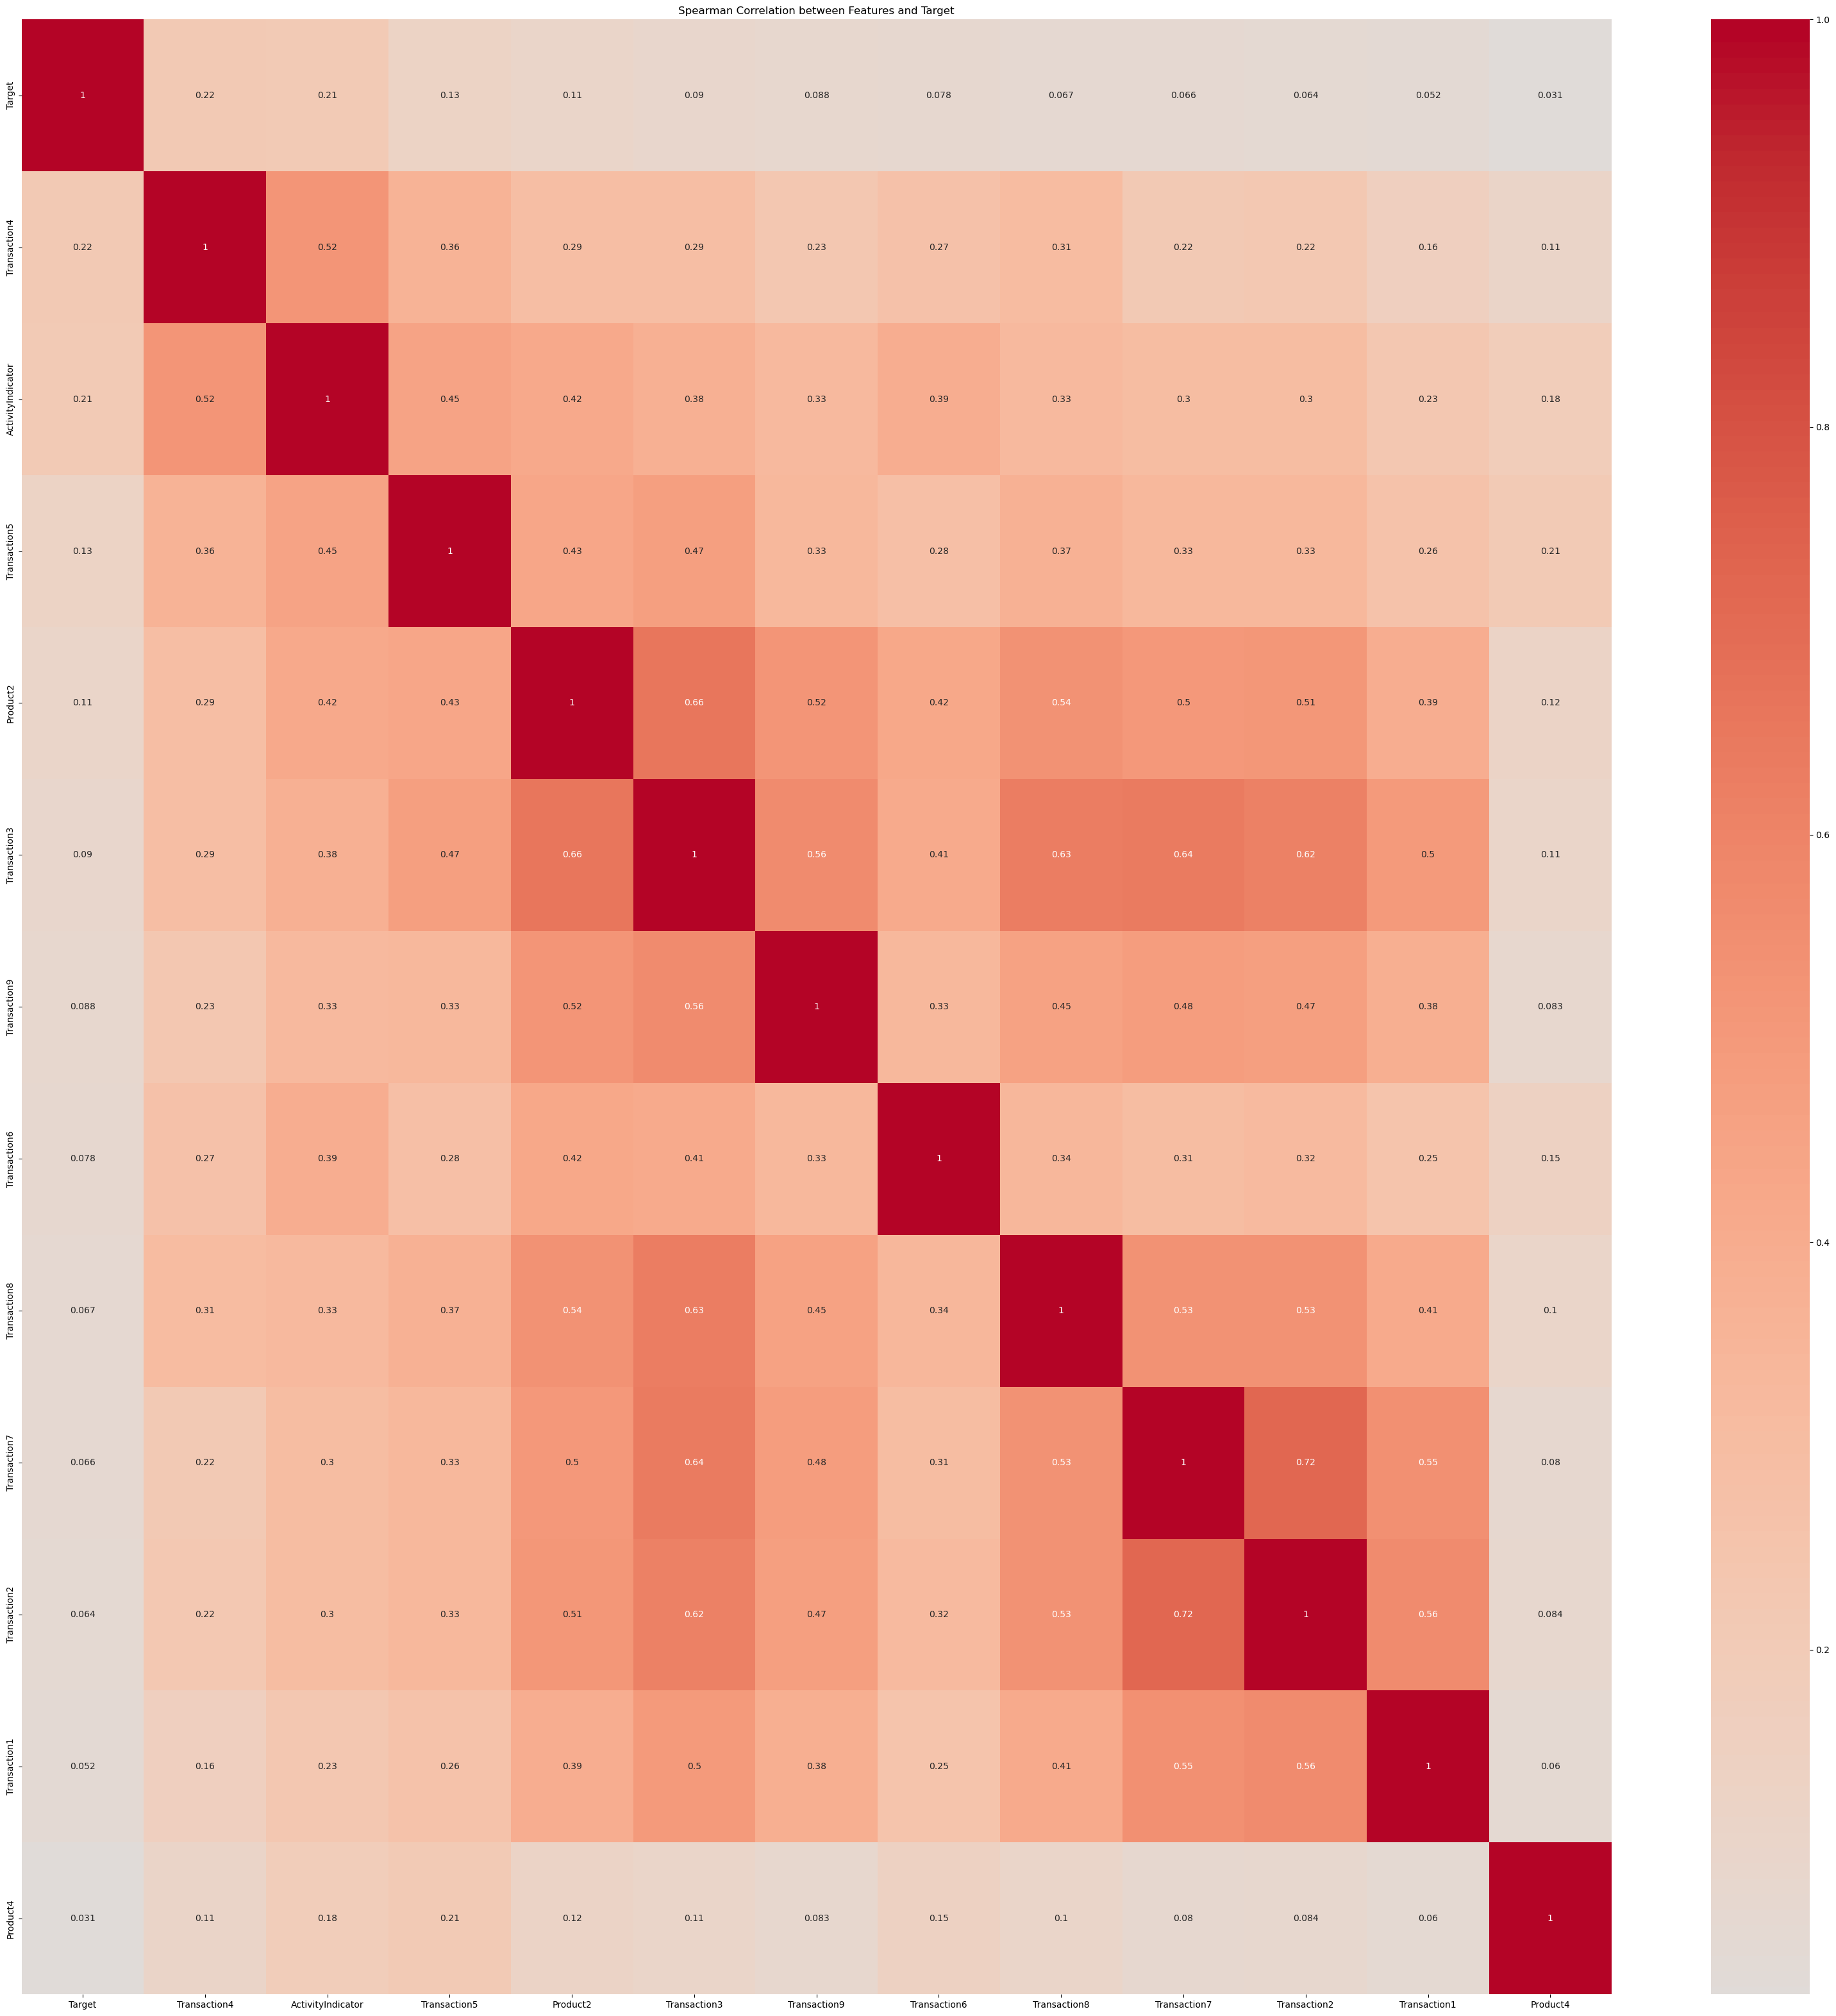

In [62]:
corr_heatmap(high_correlated_df, 0, 13)

<div class="alert alert-block alert-warning">
<b>Observations: </b> 

- We can see that Transaction4, Activity Indicator, Transaction5, Product2, Transaction3, Transaction6, Transaction8 show high correlation with the customer Target column. We should pay attention to these features and see how they contribute to the feature importance of each model below.
</div>

### Further EDA with each group of features

In [87]:
# Split up those features in specific groups for further EDA
product_cols = ['Product1', 'Product2', 'Product3', 'Product4', 'Product5', 'Product6']

transac_cols = ['Transaction1', 'Transaction2', 'Transaction3', 'Transaction4',
                'Transaction5', 'Transaction6', 'Transaction7', 'Transaction8', 'Transaction9']

ext_acc_cols = ['ExternalAccount1', 'ExternalAccount2', 'ExternalAccount3', 'ExternalAccount4', 
                'ExternalAccount5', 'ExternalAccount6', 'ExternalAccount7']

competitiveRate_cols = ['CompetitiveRate1', 'CompetitiveRate2', 'CompetitiveRate3', 'CompetitiveRate4', 
                        'CompetitiveRate5', 'CompetitiveRate6', 'CompetitiveRate7']

### Additional New Features to support EDA as well as further data analysis

In [88]:
# Total products per customer using in this bank
train_df['Total_products'] = train_df.loc[:, product_cols].sum(axis =1)

In [89]:
# Total external accounts per customer outside of this bank
train_df['Total_ext_acc'] = train_df.loc[:, ext_acc_cols].sum(axis =1)

In [90]:
# Total transactions per customer recently with this bank
train_df['No_Transactions'] = train_df[transac_cols].astype(bool).sum(axis = 1)

#### Explore Total product for customer on different classes

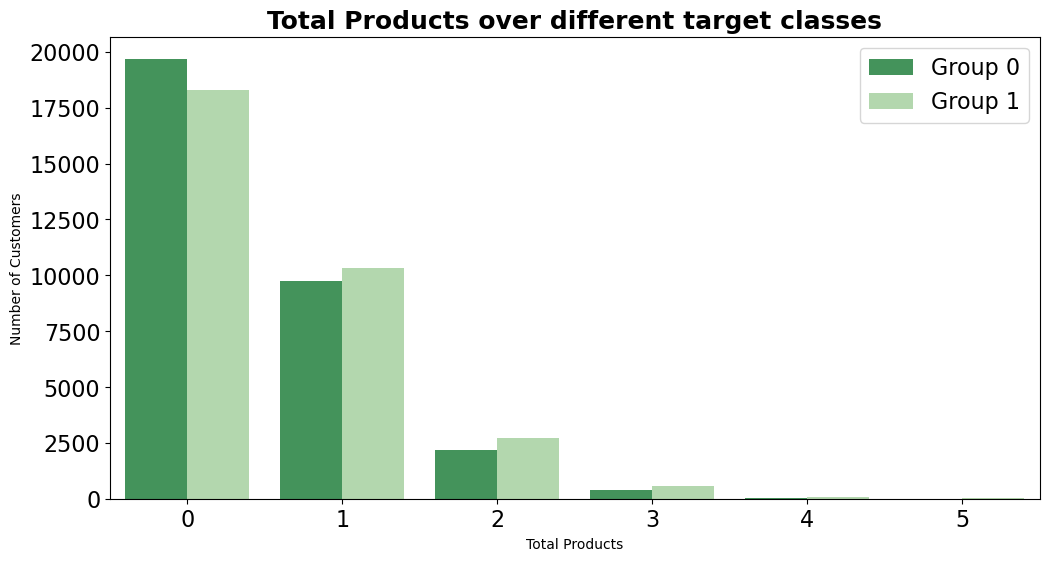

In [67]:
plt.figure(figsize=(12,6))
sns.countplot(data = train_df, x = 'Total_products', hue = 'Target', palette='Greens_r')
plt.title('Total Products over different target classes', fontsize=18, fontweight='bold')
plt.xlabel("Total Products")
plt.ylabel("Number of Customers")
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(['Group 0', 'Group 1'], fontsize=16)

<div class="alert alert-block alert-warning">
<b>Observations: </b> 

- We conduct the sum of number of products that customers have been using from the bank, and we find that the majority of customers was not using any product from the bank on both customer target groups 0 and 1.
- The rest of customers is using either 1 or more than 1 product from the bank and there is no clear difference between two target groups.
</div>

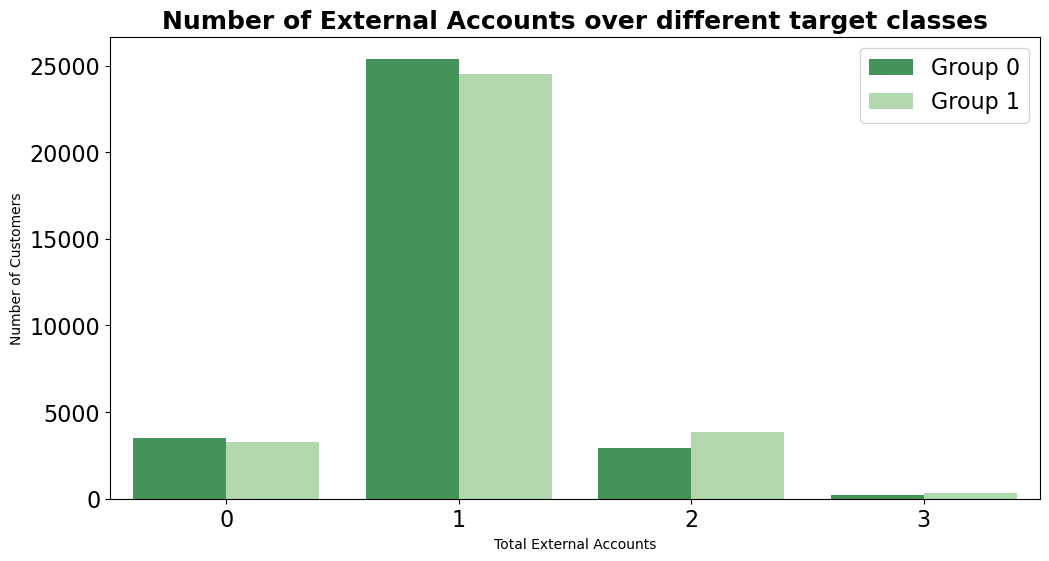

In [68]:
plt.figure(figsize=(12,6))
sns.countplot(data = train_df, x = 'Total_ext_acc', hue = 'Target', palette='Greens_r')
plt.title('Number of External Accounts over different target classes', fontsize=18, fontweight='bold')
plt.xlabel("Total External Accounts")
plt.ylabel("Number of Customers")
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.legend(['Group 0', 'Group 1'], fontsize=16)

<div class="alert alert-block alert-warning">
<b>Observations: </b> 

- We conduct the sum of number of external accounts that customers have been using, and we find that the majority of customers has one external account and there is no clear difference between two customer target groups 0 and 1.
</div>

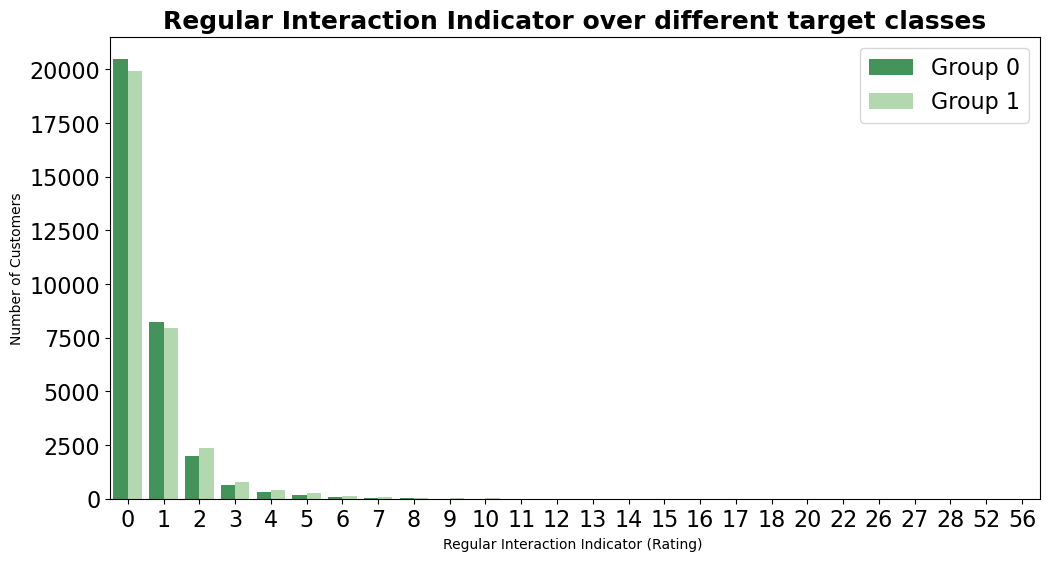

In [69]:
plt.figure(figsize=(12,6))
sns.countplot(data = train_df, x = 'RegularInteractionIndicator', hue = 'Target', palette='Greens_r')
plt.title('Regular Interaction Indicator over different target classes', fontsize=18, fontweight='bold')
plt.xlabel("Regular Interaction Indicator (Rating) ")
plt.ylabel("Number of Customers")
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.legend(['Group 0', 'Group 1'], fontsize=16)

<div class="alert alert-block alert-warning">
<b>Observations: </b> 

- Regarding the Regular Interaction Indicator, it is obvious that the majority of customer has not been interacting with the bank
</div>

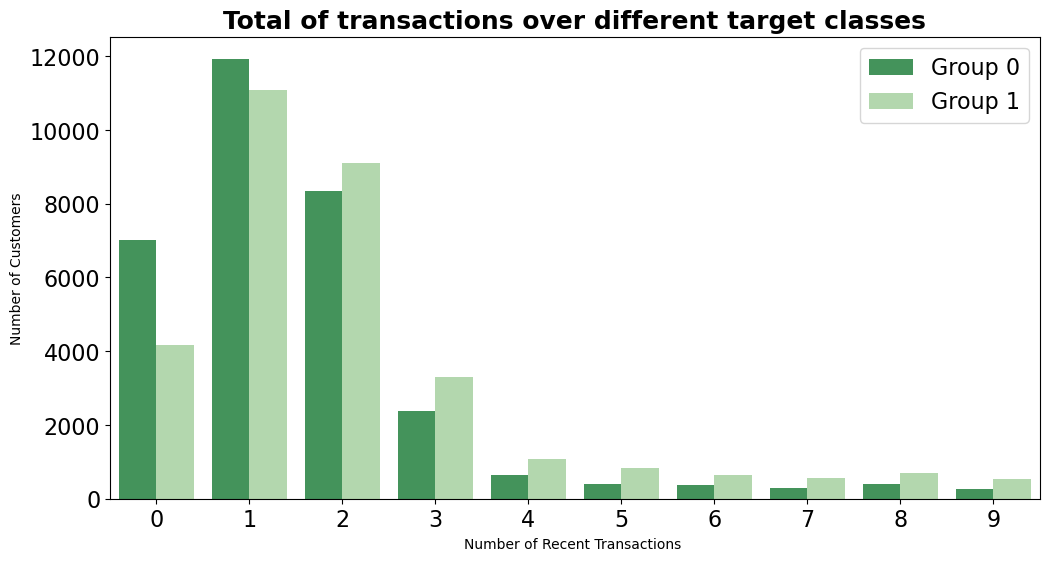

In [70]:
plt.figure(figsize=(12,6))
sns.countplot(data = train_df, x = 'No_Transactions', hue = 'Target', palette='Greens_r')
plt.title('Total of transactions over different target classes', fontsize=18, fontweight='bold')
plt.xlabel("Number of Recent Transactions ")
plt.ylabel("Number of Customers")
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.legend(['Group 0', 'Group 1'], fontsize=16)

<div class="alert alert-block alert-warning">
<b>Observations: </b> 

- Target Group 1 customers tend to have more done transactions with bank, from at least 2 transactions over the last 9 given transactions
- Target Group 0 customers don't make any transaction with the bank over the 9 given transactions or only one transaction (approxiamtely 12000 customers)
</div>

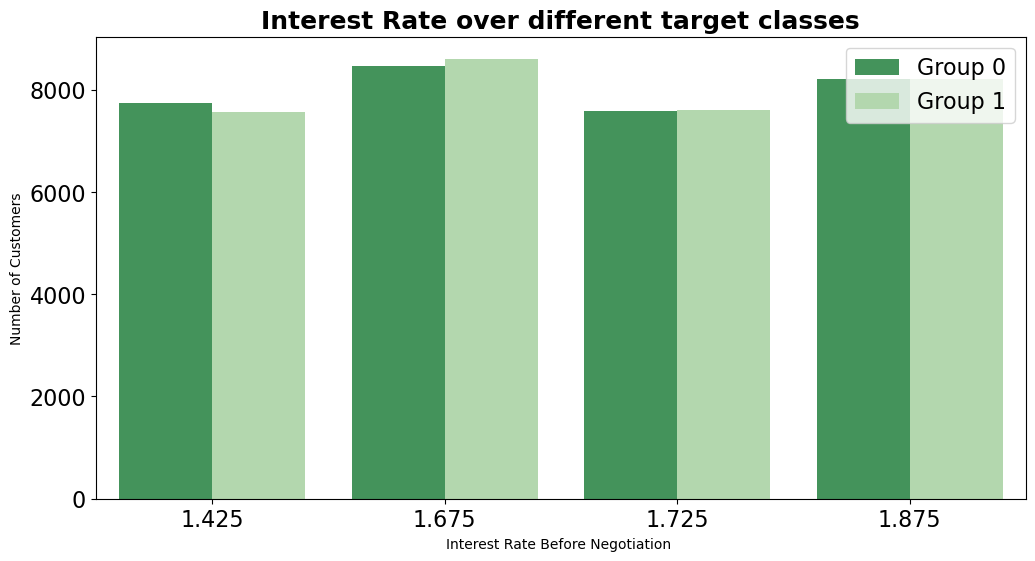

In [71]:
plt.figure(figsize=(12,6))
sns.countplot(data = train_df, x = 'RateBefore', hue = 'Target', palette='Greens_r')
plt.title('Interest Rate over different target classes', fontsize=18, fontweight='bold')
plt.xlabel("Interest Rate Before Negotiation ")
plt.ylabel("Number of Customers")
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.legend(['Group 0', 'Group 1'], fontsize=16)

<div class="alert alert-block alert-warning">
<b>EDA Conclusion: </b> 

- At this stage of EDA, it is hard for us to see any clear distinct between two customer groups over those existing features. Therefore, it is impossible to get rid of any features as we do not want to lose any important insights hiding underneath those features.
    
- Finally, we decided to go further with building our model and feeding all features to observe the result.
</div>

## 3. Building Prediction Model

In [91]:
train_df.drop(['Total_products', 'Total_ext_acc', 'No_Transactions'], axis = 1, inplace = True)

In [92]:
# sperate variables and prediction
y = train_df['Target']
X = train_df.drop(['Target', 'Customer_id'], axis=1, errors='ignore')

In [93]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10086, stratify=y) #stratified sampling based on the target
print(f"X_train.shape: {x_train.shape}")
print(f"X_test.shape: {x_test.shape}")
print(f"y_train.shape: {y_train.shape}")
print(f"y_test.shape: {y_test.shape}")

X_train.shape: (51199, 35)
X_test.shape: (12800, 35)
y_train.shape: (51199,)
y_test.shape: (12800,)


In [94]:
# Remove Customer_id from numerical features list
numeric_features.remove("Customer_id")

In [95]:
#Create numerical pipeline to transform numerical values

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer 
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder

#Convert the non transformed Dataframe into list.
columns_categorical_list = ['CompetitiveRate1', 'CompetitiveRate2', 'CompetitiveRate3', 'CompetitiveRate4', 
                            'CompetitiveRate5', 'CompetitiveRate6', 'CompetitiveRate7',
                           'RateBefore', 'ReferenceRate']
columns_numerical_list = numeric_features

pipeline_categorical = Pipeline([
  ('onehot', OneHotEncoder()),
])

pipeline_numerical = Pipeline([
  ('scaler', StandardScaler()),
])

pipeline_full = ColumnTransformer([
    ("categorical", pipeline_categorical, columns_categorical_list),
    ("numerical", pipeline_numerical, columns_numerical_list),
])

In [96]:
pipeline_full = ColumnTransformer([
    
    # Transform those numerical features
    ("categorical", pipeline_categorical, columns_categorical_list),
    ("numerical", pipeline_numerical, columns_numerical_list)],
    # Any other columns are ignored
    remainder="passthrough"
)

pipeline_full.fit(x_train)
x_train = pd.DataFrame(pipeline_full.transform(x_train), columns=pipeline_full.get_feature_names_out())
x_test = pd.DataFrame(pipeline_full.transform(x_test), columns=pipeline_full.get_feature_names_out())

print(f"X_train transformed.shape: {x_train.shape}")
print(f"X_test transformed.shape: {x_test.shape}")

X_train transformed.shape: (51199, 58)
X_test transformed.shape: (12800, 58)


In [98]:
# Defining a class for different predictive models to avoid code repetition.
class predictive_models:
    def __init__(self, x_train, x_test, y_train, y_test):
        self.x_train = x_train
        self.x_test = x_test
        self.y_train = y_train
        self.y_test = y_test
    
    # Let's define a function for plotting feature importances for each differnt model.
    def feat_importance(self, model, title):
        def plot_importance(model, features, num=len(self.x_train)):
                plt.figure(figsize=(7, 7))
                sns.set(font_scale=1)
                sns.barplot(x="Value", y="Feature", data=features.sort_values(by="Value", ascending=False)[0:num])
                plt.title(title)
                plt.tight_layout()
                plt.show()

        features = self.x_train.columns
        importances = model.feature_importances_

        feat_importances = pd.DataFrame()
        feat_importances['Feature'] = features
        feat_importances['Value'] = importances

        # Call the plot_importance function
        plot_importance(model, feat_importances)

        # Print fancy table
        sorted_feat_importances = feat_importances.sort_values('Value', ascending=False)
        # print(tabulate(sorted_feat_importances, headers='keys', tablefmt='pretty', showindex=False))
    
    # Let's define a function to visualise, learning curves for each model
    def learning_curve(self, model):
      
        from sklearn.model_selection import learning_curve, validation_curve

        # Learning curve
        train_sizes, train_scores, test_scores = learning_curve(model, x_train, y_train, cv=5)

        # Calculate mean and standard deviation for training and test scores
        train_scores_mean = np.mean(train_scores, axis=1)
        train_scores_std = np.std(train_scores, axis=1)
        test_scores_mean = np.mean(test_scores, axis=1)
        test_scores_std = np.std(test_scores, axis=1)

        # Plot learning curve
        plt.figure()
        plt.title("Learning Curve")
        plt.xlabel("Training examples")
        plt.ylabel("Score")
        plt.grid()

        plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
        plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1, color="g")
        plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
        plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")

        plt.legend(loc="best")
        plt.show()
    
    # Let's define a function to plot ROC curve for each model
    def ROC_curve(self, model, y_pred_curve, title):
        
        from sklearn.metrics import roc_curve


        fpr, tpr, _ = roc_curve(y_test, y_pred_curve)
        f1 = f1_score(y_test, y_pred_curve)

        plt.figure(figsize=(9, 5))
        plt.plot(fpr, tpr, label=f'ROC AUC = {roc_auc_score(y_test, y_pred_curve):.2f}')
        plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(title)
        plt.legend(loc="lower right")
    
    # Lets define a function that lets us train a logistic regression model and retrieve it as well if needed.
    def logisticregression(self, want_model = 'No'):
        from sklearn.linear_model import LogisticRegression
        from sklearn.metrics import roc_auc_score
        from sklearn.metrics import confusion_matrix
        from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

        lr_model = LogisticRegression()

        lr_model = LogisticRegression()
        lr_model.fit(self.x_train, self.y_train)
        y_prob_lr = lr_model.predict(self.x_test)

        print("Precision Score with LR: ", precision_score(self.y_test, y_prob_lr))
        print("Recall Score with LR: ", recall_score(self.y_test, y_prob_lr))
        print("F1 Score Score with LR: ", f1_score(self.y_test, y_prob_lr))
        print("Accuracy Score with LR: ", accuracy_score(self.y_test, y_prob_lr))
        print("ROC with Logistic Regression:", roc_auc_score(self.y_test, y_prob_lr))
        
        # Calling ROC_curve function to visulaise ROC curve
        self.ROC_curve(lr_model, y_prob_lr, title = 'ROC curve for Logistic Regression')
        
        # Calling learning_curve() function to visualise it.
        self.learning_curve(lr_model)
        
        # Setting up an if loop to decide if we want to retrieve the trained model or not.
        if want_model == 'yes':
            return lr_model
        
    # The parameters mentioned inside the function name are parameters that will be used for hyperparameter tuning, initially they are set to their default values.
    def RandomforestClassifier(self, feat_imp = 'yes', bootstrap=True, max_depth=None, max_features='sqrt', min_samples_leaf=1, min_samples_split=2, n_estimators=100, want_model = 'No'):
        from sklearn.ensemble import RandomForestClassifier 

        rfr_model = RandomForestClassifier(bootstrap = bootstrap,
                             max_depth=max_depth,
                             max_features=max_features,
                             min_samples_leaf= min_samples_leaf,
                             min_samples_split= min_samples_split,
                             n_estimators= n_estimators)
        rfr_model.fit(self.x_train,self.y_train)

        y_prob_rfr = rfr_model.predict(self.x_test)

        print("Precision Score with RandomForest: ", precision_score(self.y_test, y_prob_rfr))
        print("Recall Score with RandomForest: ", recall_score(self.y_test, y_prob_rfr))
        print("F1 Score Score with RandomForest: ", f1_score(self.y_test, y_prob_rfr))
        print("Accuracy Score with RandomForest: ", accuracy_score(self.y_test, y_prob_rfr))
        print("ROC by RandomForest:",roc_auc_score(self.y_test,y_prob_rfr))
        
        # Setting up an if loop to decide if we want to visualise feture importance or not.
        if feat_imp == 'yes':
            title = 'Feature Importance for Random Forest Classifier'
            self.feat_importance(rfr_model,title)
        # Calling ROC_curve function to visulaise ROC curve    
        self.ROC_curve(rfr_model, y_prob_rfr, title = 'ROC curve for Random Forest')
        
        # Calling learning_curve() function to visualise it.
        self.learning_curve(rfr_model)
        
        # Setting up an if loop to decide if we want to retrieve the trained model or not.
        if want_model == 'yes':
            return rfr_model
    
    # The parameters mentioned inside the function name are parameters that will be used for hyperparameter tuning, initially they are set to their default values.   
    def AdaBoostClassifier(self, feat_imp = 'yes', learning_rate=1, n_estimators= 50, want_model = 'No'):
        from sklearn.ensemble import AdaBoostClassifier

        AB_model = AdaBoostClassifier(learning_rate=learning_rate, n_estimators= n_estimators, random_state=2022)
        AB_model.fit(self.x_train,self.y_train)

        y_prob_AB = AB_model.predict(self.x_test)

        print("Precision Score with AdaBoost: ", precision_score(self.y_test, y_prob_AB))
        print("Recall Score with AdaBoost: ", recall_score(self.y_test, y_prob_AB))
        print("F1 Score Score with AdaBoost: ", f1_score(self.y_test, y_prob_AB))
        print("Accuracy Score with AdaBoost: ", accuracy_score(self.y_test, y_prob_AB))
        print("ROC by AdaBoost:",roc_auc_score(self.y_test,y_prob_AB))
        
        # Setting up an if loop to decide if we want to visualise feture importance or not.
        if feat_imp == 'yes':
            title = 'Feature Importance for AdaBoost Classifier'
            self.feat_importance(AB_model,title)
        # Calling ROC_curve function to visulaise ROC curve
        self.ROC_curve(AB_model, y_prob_AB, title = 'ROC curve for AdaBoost')
        
        # Calling learning_curve() function to visualise it.
        self.learning_curve(AB_model)
        
        # Setting up an if loop to decide if we want to retrieve the trained model or not.
        if want_model == 'yes':
            return AB_model
    
    def GBClassifier(self, feat_imp = 'yes', learning_rate= 0.1, max_depth= 3, n_estimators= 100, want_model = 'No'):
        from sklearn.ensemble import GradientBoostingClassifier
        GBDT_model = GradientBoostingClassifier(learning_rate= learning_rate, max_depth= max_depth, n_estimators= n_estimators, random_state=2022)
        GBDT_model.fit(self.x_train,self.y_train)

        y_prob_GBDT = GBDT_model.predict(self.x_test)
        print("Precision Score with GBC: ", precision_score(self.y_test, y_prob_GBDT))
        print("Recall Score with GBC: ", recall_score(self.y_test, y_prob_GBDT))
        print("F1 Score Score with GBC: ", f1_score(self.y_test, y_prob_GBDT))
        print("Accuracy Score with GBC: ", accuracy_score(self.y_test, y_prob_GBDT))
        print("ROC by GBC:",roc_auc_score(self.y_test,y_prob_GBDT))
        
        # Setting up an if loop to decide if we want to visualise feture importance or not.
        if feat_imp == 'yes':
            title = 'Feature Importance for GB Classifier.'
            self.feat_importance(GBDT_model,title)
            
        # Calling ROC_curve function to visulaise ROC curve
        self.ROC_curve(GBDT_model, y_prob_GBDT, title = 'ROC curve for Gradient Boosting')
        
        # Calling learning_curve() function to visualise it.
        self.learning_curve(GBDT_model)
        
        # Setting up an if loop to decide if we want to retrieve the trained model or not.
        if want_model == 'yes':
            return GBDT_model

        
    def XGB(self, feat_imp = 'yes', base_score=0.5,booster = 'gbtree',gamma= 0,learning_rate= 0.1,n_estimators= 100,reg_alpha= 0,reg_lambda= 1, want_model = 'No'):
        import xgboost as xgb
        from sklearn.metrics import roc_auc_score

        XGB_model = xgb.XGBClassifier(base_score=base_score,
                                         booster = booster,
                                         gamma= gamma,
                                         learning_rate= learning_rate,
                                         n_estimators= n_estimators,
                                         reg_alpha= reg_alpha,
                                         reg_lambda= reg_lambda)
        XGB_model.fit(self.x_train, self.y_train)
        y_prob_xgb = XGB_model.predict(self.x_test)

        print("Precision Score with XGB: ", precision_score(self.y_test, y_prob_xgb))
        print("Recall Score with XGB: ", recall_score(self.y_test, y_prob_xgb))
        print("F1 Score Score with XGB: ", f1_score(self.y_test, y_prob_xgb))
        print("Accuracy Score with XGB: ", accuracy_score(self.y_test, y_prob_xgb))
        print("ROC by XGB:", roc_auc_score(self.y_test, y_prob_xgb))
        
        # Setting up an if loop to decide if we want to visualise feture importance or not.
        if feat_imp == 'yes':
            
            title = 'Feature Importance for GB Classifier.'
            self.feat_importance(XGB_model,title)
            
        # Calling ROC_curve function to visulaise ROC curve
        self.ROC_curve(XGB_model, y_prob_xgb, title = 'ROC curve for XGB')
        
        # Calling learning_curve() function to visualise it.
        self.learning_curve(XGB_model)
        
        # Setting up an if loop to decide if we want to retrieve the trained model or not.
        if want_model == 'yes':
            return XGB_model

### Logistic Regression

Precision Score with LR:  0.6380022530980097
Recall Score with LR:  0.5311864936689074
F1 Score Score with LR:  0.5797150899940289
Accuracy Score with LR:  0.615078125
ROC with Logistic Regression: 0.6150388192223969


C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



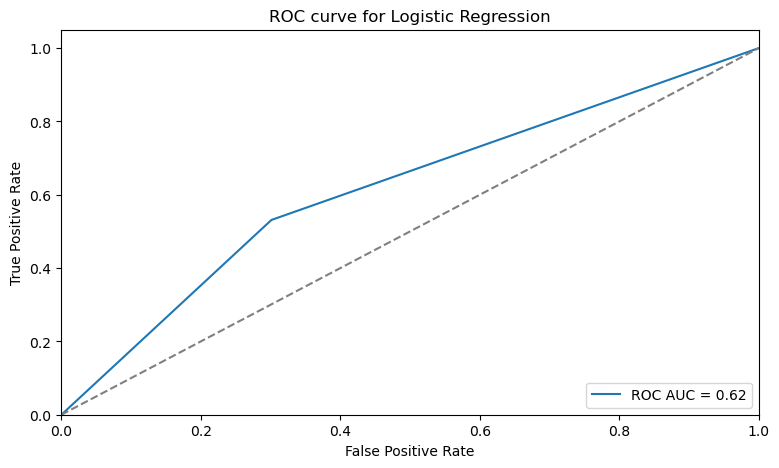

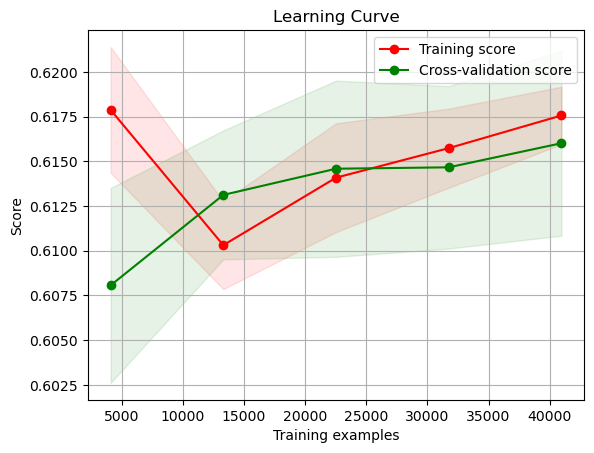

In [100]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
obj1 = predictive_models(x_train,x_test,y_train,y_test)
obj1.logisticregression()

### RandomForest Classifier

Precision Score with RandomForest:  0.582795067527892
Recall Score with RandomForest:  0.6206034078474285
F1 Score Score with RandomForest:  0.6011053069876601
Accuracy Score with RandomForest:  0.588359375
ROC by RandomForest: 0.5883744823088463


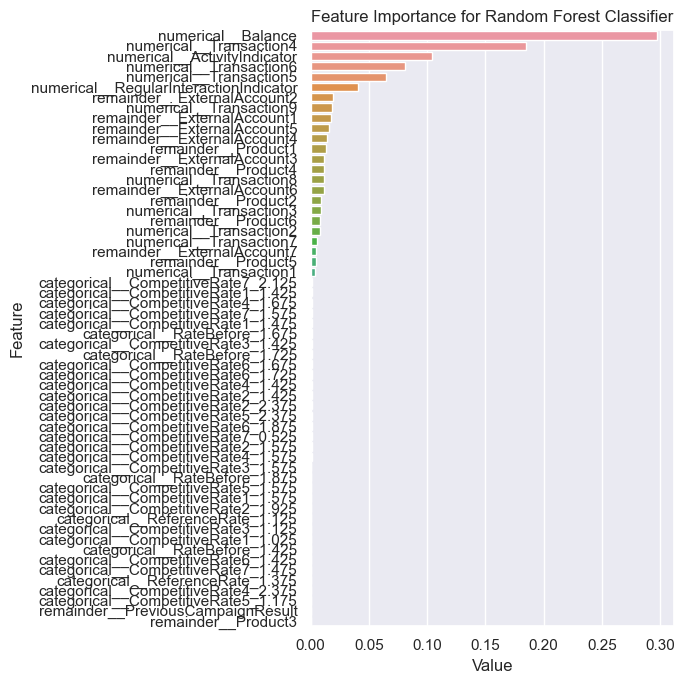

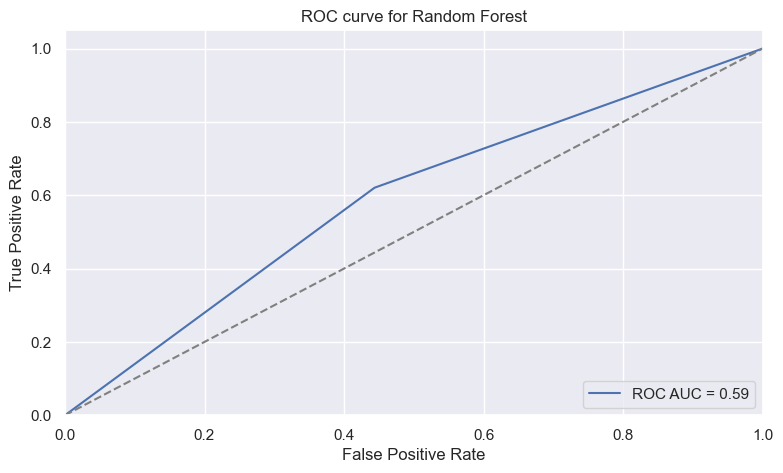

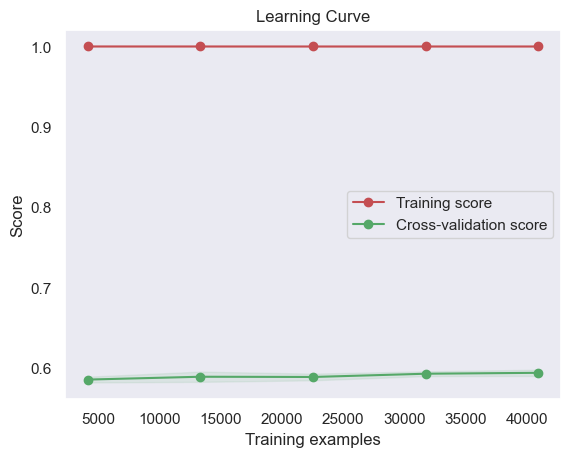

In [101]:
obj1.RandomforestClassifier()

### AdaBoost Classifier

Precision Score with AdaBoost:  0.6344012335103649
Recall Score with AdaBoost:  0.5788650930123496
F1 Score Score with AdaBoost:  0.6053621056073238
Accuracy Score with AdaBoost:  0.6228125
ROC by AdaBoost: 0.6227919093048628


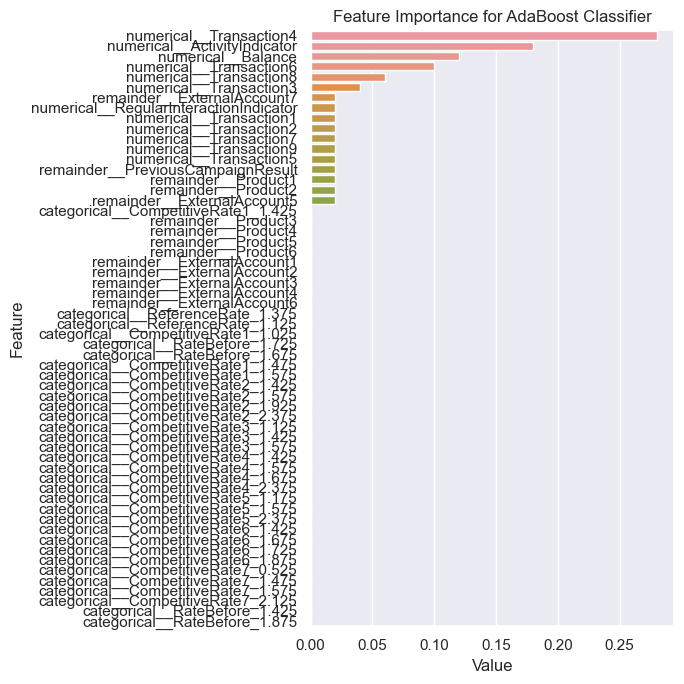

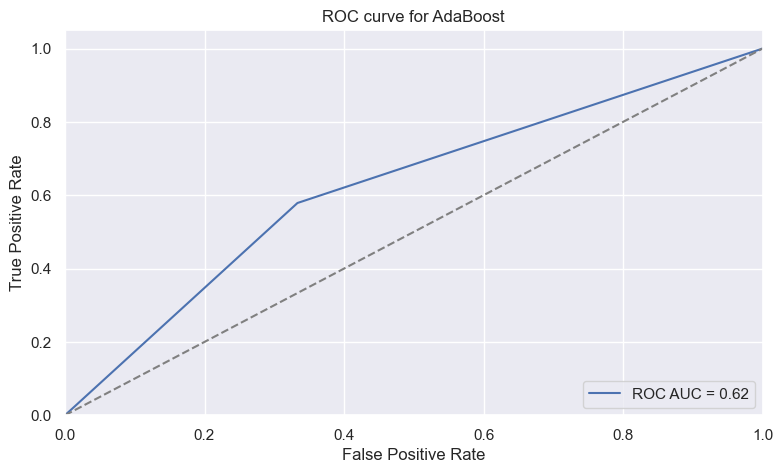

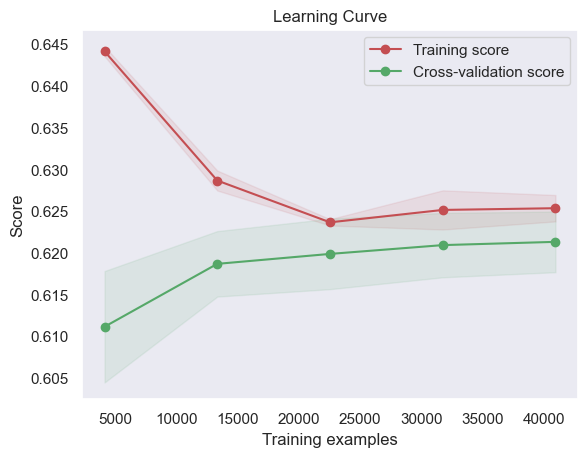

In [102]:
obj1.AdaBoostClassifier()

### GradientBoosting Classifier

Precision Score with GBC:  0.6362728785357737
Recall Score with GBC:  0.5977802094731905
F1 Score Score with GBC:  0.6164262110099137
Accuracy Score with GBC:  0.628203125
ROC by GBC: 0.6281888709399375


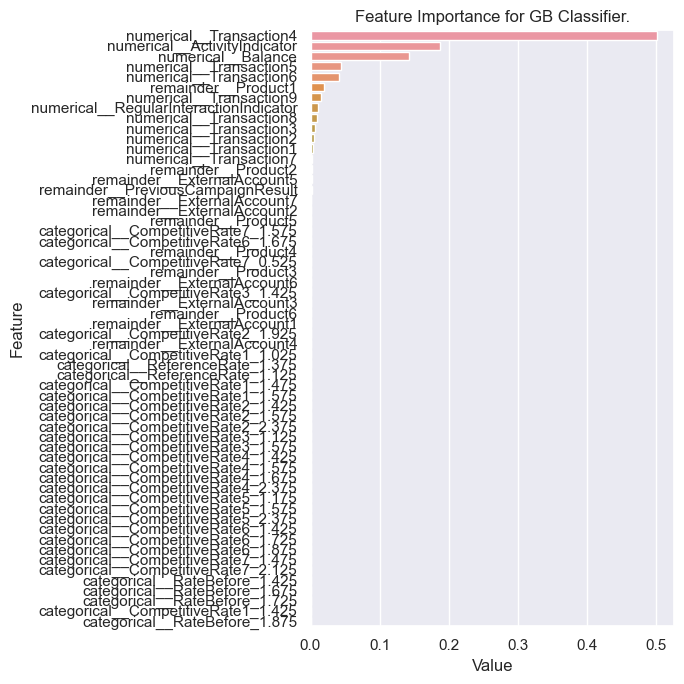

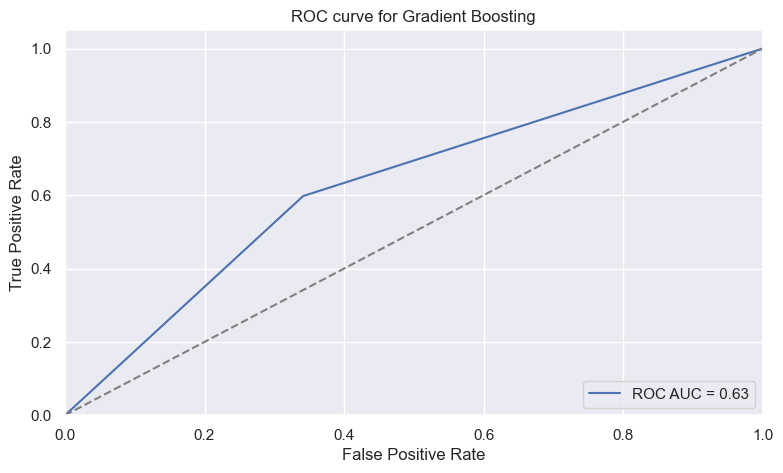

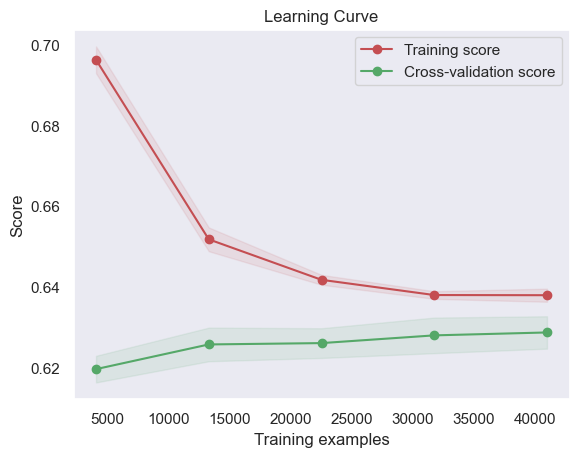

In [103]:
obj1.GBClassifier()

### XGB Classifier

Precision Score with XGB:  0.634983498349835
Recall Score with XGB:  0.6015319681100516
F1 Score Score with XGB:  0.6178052500602073
Accuracy Score with XGB:  0.628046875
ROC by XGB: 0.6280344519606951


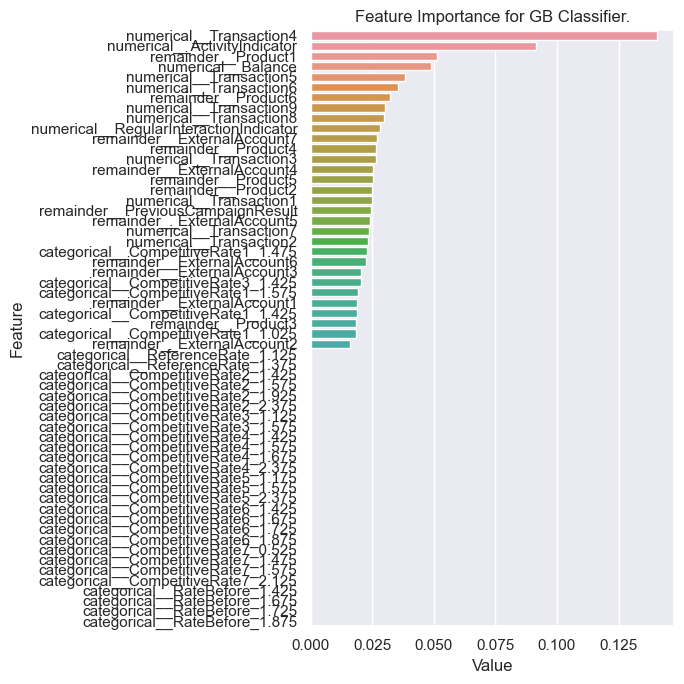

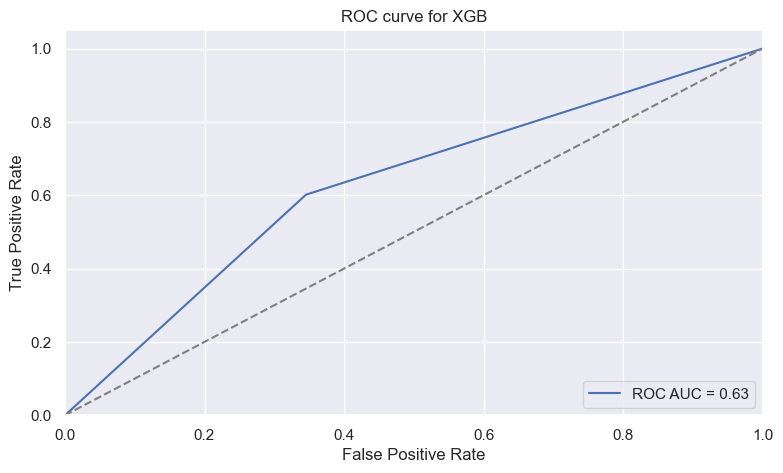

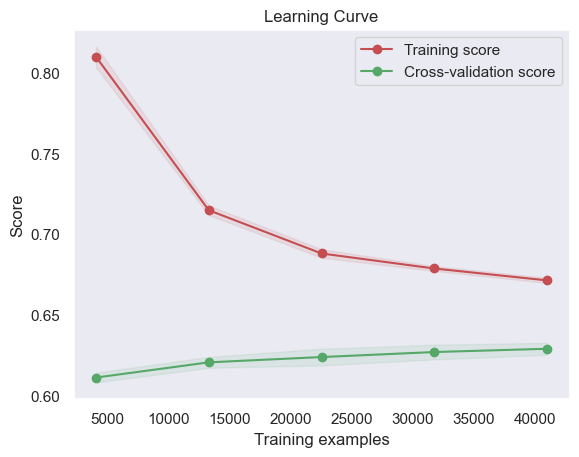

In [104]:
obj1.XGB()

### We start to use selected features on the top 3 models with best performances from the previous round and also do the hyperparameter tuning
.

In [108]:
#From the feature importance for Gradient Boosting Classifier above, we decided to choose these features:
selected_features = ['numerical__Balance','numerical__Transaction4', 'numerical__Transaction6', 'numerical__ActivityIndicator',
                      'numerical__Transaction5','numerical__Transaction8','remainder__Product1','remainder__Product6',
                      'numerical__Transaction9','numerical__RegularInteractionIndicator']

In [110]:
from sklearn.model_selection import train_test_split

# # sperate variables and prediction
x_train1 = x_train[selected_features]
x_test1 = x_test[selected_features]

y_train1 = y_train
y_test1 = y_test

In [111]:
obj2 = predictive_models(x_train1,x_test1,y_train1,y_test1)

In [113]:
x_train1.shape, x_test1.shape

((51199, 10), (12800, 10))

In [114]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

### RandomForest model

In [116]:
from sklearn.ensemble import RandomForestClassifier

parameters = {'bootstrap': [True, False],
 'max_depth': [10,20],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1],
 'min_samples_split': [100,150],
 'n_estimators': [150,200]}

rfc = RandomForestClassifier()
rf_random = GridSearchCV(estimator = rfc, param_grid = parameters, cv = 3, verbose=3, scoring = 'roc_auc')
# Fit the random search model
rf_random.fit(x_train1,y_train1)

Fitting 3 folds for each of 32 candidates, totalling 96 fits


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



[CV 1/3] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=150;, score=0.673 total time=   7.0s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



[CV 2/3] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=150;, score=0.663 total time=   7.3s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



[CV 3/3] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=150;, score=0.679 total time=   7.2s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



[CV 1/3] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=200;, score=0.673 total time=   9.7s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



[CV 2/3] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=200;, score=0.664 total time=   9.5s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



[CV 3/3] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=200;, score=0.679 total time=   9.4s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



[CV 1/3] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=150, n_estimators=150;, score=0.673 total time=   7.5s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



[CV 2/3] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=150, n_estimators=150;, score=0.664 total time=   7.1s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



[CV 3/3] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=150, n_estimators=150;, score=0.679 total time=   7.1s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



[CV 1/3] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=150, n_estimators=200;, score=0.673 total time=   9.5s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



[CV 2/3] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=150, n_estimators=200;, score=0.664 total time=   9.7s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



[CV 3/3] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=150, n_estimators=200;, score=0.680 total time=   9.5s
[CV 1/3] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=150;, score=0.673 total time=   7.3s
[CV 2/3] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=150;, score=0.664 total time=   7.0s
[CV 3/3] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=150;, score=0.679 total time=   6.9s
[CV 1/3] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=200;, score=0.673 total time=   9.3s
[CV 2/3] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=200;, score=0.664 total time=  10.1s
[CV 3/3] END bootstrap=True, max_depth=10, max_features=sqrt, min_samp

C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



[CV 1/3] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=150;, score=0.671 total time=   9.9s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



[CV 2/3] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=150;, score=0.662 total time=  10.3s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



[CV 3/3] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=150;, score=0.679 total time=  10.1s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



[CV 1/3] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=200;, score=0.670 total time=  13.4s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



[CV 2/3] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=200;, score=0.662 total time=  13.1s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



[CV 3/3] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=200;, score=0.679 total time=  13.4s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



[CV 1/3] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=150, n_estimators=150;, score=0.671 total time=   9.3s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



[CV 2/3] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=150, n_estimators=150;, score=0.662 total time=   9.4s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



[CV 3/3] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=150, n_estimators=150;, score=0.680 total time=   9.9s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



[CV 1/3] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=150, n_estimators=200;, score=0.671 total time=  12.6s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



[CV 2/3] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=150, n_estimators=200;, score=0.663 total time=  12.5s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



[CV 3/3] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=150, n_estimators=200;, score=0.680 total time=  12.9s
[CV 1/3] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=150;, score=0.670 total time=   9.8s
[CV 2/3] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=150;, score=0.662 total time=   9.9s
[CV 3/3] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=150;, score=0.679 total time=  10.3s
[CV 1/3] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=200;, score=0.670 total time=  13.5s
[CV 2/3] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=200;, score=0.663 total time=  13.8s
[CV 3/3] END bootstrap=True, max_depth=20, max_features=sqrt, min_samp

C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



[CV 1/3] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=150;, score=0.672 total time=   8.7s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



[CV 2/3] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=150;, score=0.663 total time=   7.4s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



[CV 3/3] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=150;, score=0.679 total time=   6.1s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



[CV 1/3] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=200;, score=0.672 total time=   8.4s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



[CV 2/3] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=200;, score=0.663 total time=   8.2s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



[CV 3/3] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=200;, score=0.679 total time=   8.5s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



[CV 1/3] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=150, n_estimators=150;, score=0.672 total time=   7.6s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



[CV 2/3] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=150, n_estimators=150;, score=0.663 total time=   8.2s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



[CV 3/3] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=150, n_estimators=150;, score=0.679 total time=   7.7s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



[CV 1/3] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=150, n_estimators=200;, score=0.672 total time=  10.4s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



[CV 2/3] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=150, n_estimators=200;, score=0.663 total time=  10.2s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



[CV 3/3] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=150, n_estimators=200;, score=0.679 total time=   9.8s
[CV 1/3] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=150;, score=0.671 total time=   7.6s
[CV 2/3] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=150;, score=0.663 total time=   8.0s
[CV 3/3] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=150;, score=0.678 total time=   7.8s
[CV 1/3] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=200;, score=0.672 total time=  10.3s
[CV 2/3] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=200;, score=0.663 total time=  10.3s
[CV 3/3] END bootstrap=False, max_depth=10, max_features=sqrt, m

C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



[CV 1/3] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=150;, score=0.667 total time=  10.8s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



[CV 2/3] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=150;, score=0.660 total time=  11.0s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



[CV 3/3] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=150;, score=0.676 total time=  10.5s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



[CV 1/3] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=200;, score=0.667 total time=  14.1s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



[CV 2/3] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=200;, score=0.660 total time=  14.1s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



[CV 3/3] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=200;, score=0.675 total time=  14.2s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



[CV 1/3] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=150, n_estimators=150;, score=0.668 total time=  10.6s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



[CV 2/3] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=150, n_estimators=150;, score=0.661 total time=  10.1s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



[CV 3/3] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=150, n_estimators=150;, score=0.677 total time=  10.4s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



[CV 1/3] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=150, n_estimators=200;, score=0.669 total time=  13.8s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



[CV 2/3] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=150, n_estimators=200;, score=0.660 total time=  14.2s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



[CV 3/3] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=150, n_estimators=200;, score=0.677 total time=  13.3s
[CV 1/3] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=150;, score=0.667 total time=  10.7s
[CV 2/3] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=150;, score=0.659 total time=  10.8s
[CV 3/3] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=150;, score=0.676 total time=  11.1s
[CV 1/3] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=200;, score=0.667 total time=  14.6s
[CV 2/3] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=200;, score=0.659 total time=  14.1s
[CV 3/3] END bootstrap=False, max_depth=20, max_features=sqrt, m

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_depth': [10, 20],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1],
                         'min_samples_split': [100, 150],
                         'n_estimators': [150, 200]},
             scoring='roc_auc', verbose=3)

In [117]:
rf_random.best_params_

{'bootstrap': True,
 'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 100,
 'n_estimators': 200}

Precision Score with RandomForest:  0.6369291209690621
Recall Score with RandomForest:  0.6027885360185903
F1 Score Score with RandomForest:  0.6193887297039159
Accuracy Score with RandomForest:  0.62640625
ROC by RandomForest: 0.626610974077065


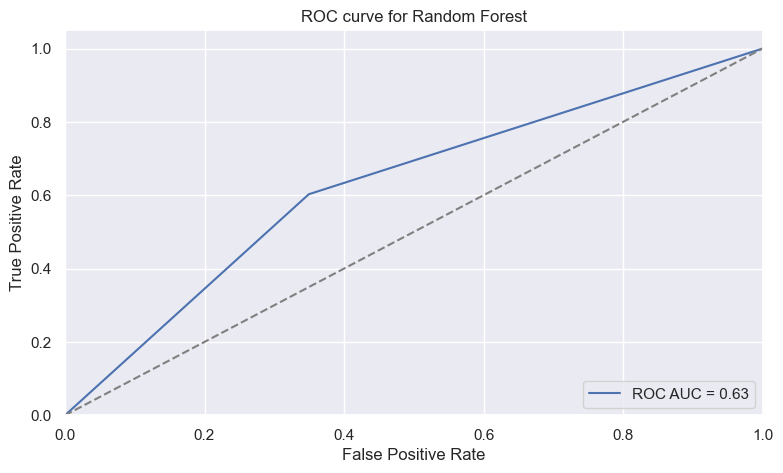

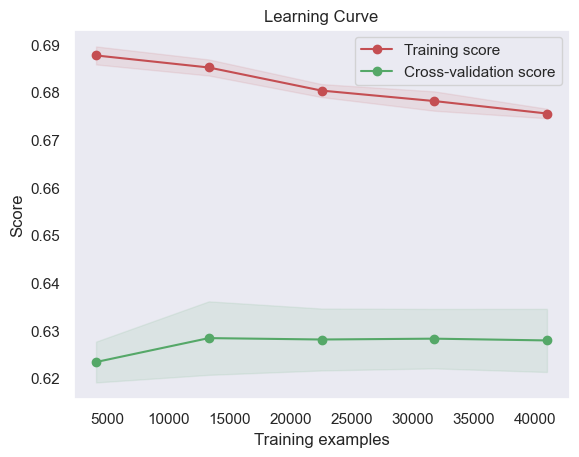

In [186]:
rfr_model = obj2.RandomforestClassifier('no',bootstrap= True,
                             max_depth=10,
                             max_features='sqrt',
                             min_samples_leaf= 1,
                             min_samples_split= 100,
                             n_estimators= 200,want_model = 'yes')

### ADABoost

In [119]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier

parameters = {
    'n_estimators': range(100, 150, 10),
    'learning_rate': [0.15,0.25],
}

AB_model = AdaBoostClassifier()
grid_search = GridSearchCV(AB_model, parameters, scoring='roc_auc', cv=3, n_jobs=-1)
grid_search.fit(x_train1, y_train1)
grid_search.best_params_

{'learning_rate': 0.25, 'n_estimators': 140}

Precision Score with AdaBoost:  0.6312190117968883
Recall Score with AdaBoost:  0.5719597211463981
F1 Score Score with AdaBoost:  0.6001300390117036
Accuracy Score with AdaBoost:  0.615625
ROC by AdaBoost: 0.6160035012351377


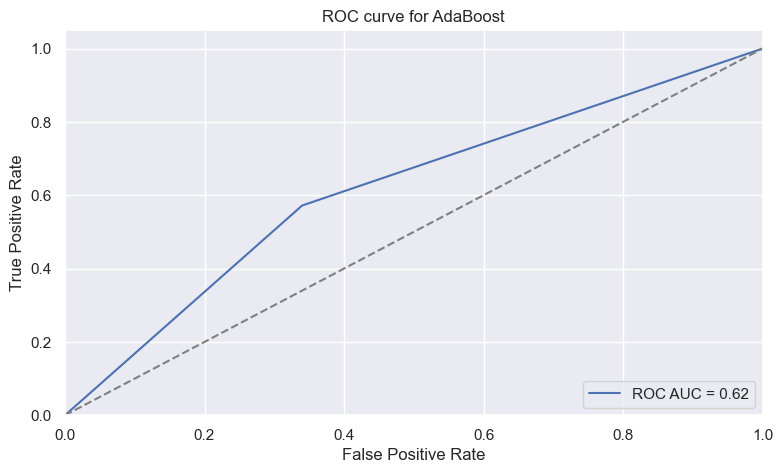

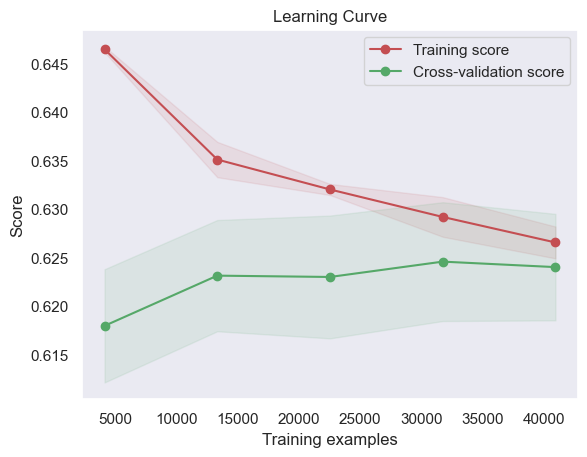

In [177]:
AB_model = obj2.AdaBoostClassifier('no',learning_rate=0.25, n_estimators= 140,want_model = 'yes')

### Gradient Boosting Classifier

In [61]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

parameters = {
    "n_estimators":[50, 250, 500],
    "max_depth":[1, 3, 5, 7, 9],
    "learning_rate":[0.01, 0.1, 0.15]
}

GBDT_model = GradientBoostingClassifier()
grid_search = GridSearchCV(GBDT_model,parameters,cv=3, verbose = 3, scoring = 'roc_auc')
grid_search.fit(x_train1,y_train1)
grid_search.best_params_

Fitting 3 folds for each of 45 candidates, totalling 135 fits
[CV 1/3] END learning_rate=0.01, max_depth=1, n_estimators=50;, score=0.646 total time=   0.6s
[CV 2/3] END learning_rate=0.01, max_depth=1, n_estimators=50;, score=0.635 total time=   0.7s
[CV 3/3] END learning_rate=0.01, max_depth=1, n_estimators=50;, score=0.630 total time=   0.6s
[CV 1/3] END learning_rate=0.01, max_depth=1, n_estimators=250;, score=0.660 total time=   3.3s
[CV 2/3] END learning_rate=0.01, max_depth=1, n_estimators=250;, score=0.651 total time=   3.4s
[CV 3/3] END learning_rate=0.01, max_depth=1, n_estimators=250;, score=0.645 total time=   3.3s
[CV 1/3] END learning_rate=0.01, max_depth=1, n_estimators=500;, score=0.665 total time=   7.1s
[CV 2/3] END learning_rate=0.01, max_depth=1, n_estimators=500;, score=0.656 total time=   7.0s
[CV 3/3] END learning_rate=0.01, max_depth=1, n_estimators=500;, score=0.651 total time=   8.6s
[CV 1/3] END learning_rate=0.01, max_depth=3, n_estimators=50;, score=0.664 t

{'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 500}

Precision Score with GBC:  0.6411196267910696
Recall Score with GBC:  0.5961270333075136
F1 Score Score with GBC:  0.617805250060207
Accuracy Score with GBC:  0.628046875
ROC by GBC: 0.6283235639350806


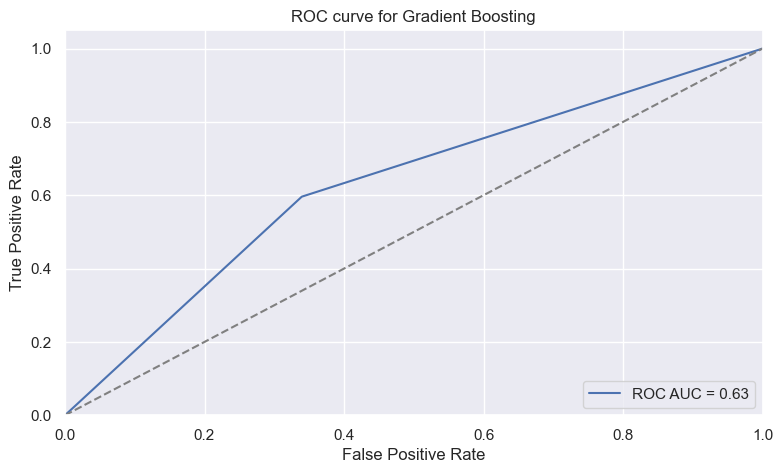

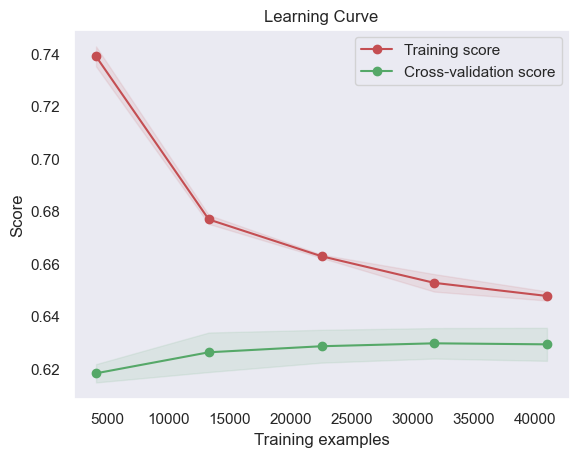

In [187]:
GBDT_model = obj2.GBClassifier('no',learning_rate= 0.01, max_depth= 5, n_estimators= 500, want_model = 'yes')

### XGB 

In [206]:
from sklearn.model_selection import KFold
params = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05,0.1],
    'booster': ['gbtree', 'gblinear'],
    'gamma': [0.5, 1],
    'reg_alpha': [0.5, 1],
    'reg_lambda': [1, 5],
    'base_score': [0.5, 1]
}

gs2 = GridSearchCV(xgb_model, params, cv=KFold(n_splits=3), scoring='roc_auc', verbose = 3)
gs2.fit(x_train1, y_train1)
gs2.best_params_

Precision Score with XGB:  0.6407864045318227
Recall Score with XGB:  0.5958171959721147
F1 Score Score with XGB:  0.6174841454603838
Accuracy Score with XGB:  0.627734375
ROC by XGB: 0.6280110408544577


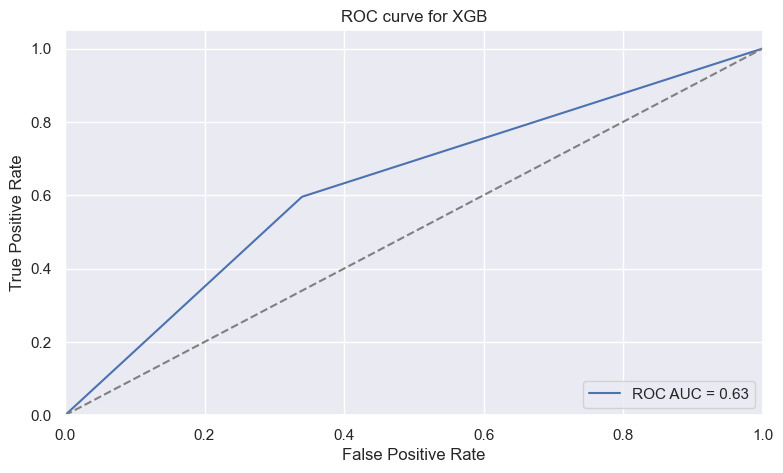

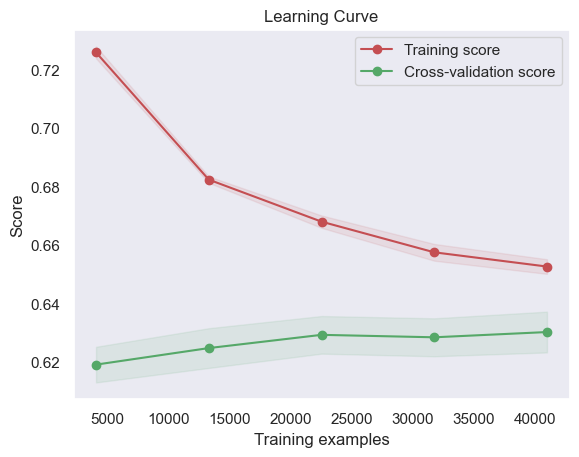

In [188]:
XGB_model = obj2.XGB('no',base_score=0.5,
 booster = 'gbtree',
 gamma= 0.5,
 learning_rate= 0.05,
 n_estimators= 100,
 reg_alpha= 1,
 reg_lambda= 5, want_model = 'yes')

### Gradient Boosting Classifier - Selected Model

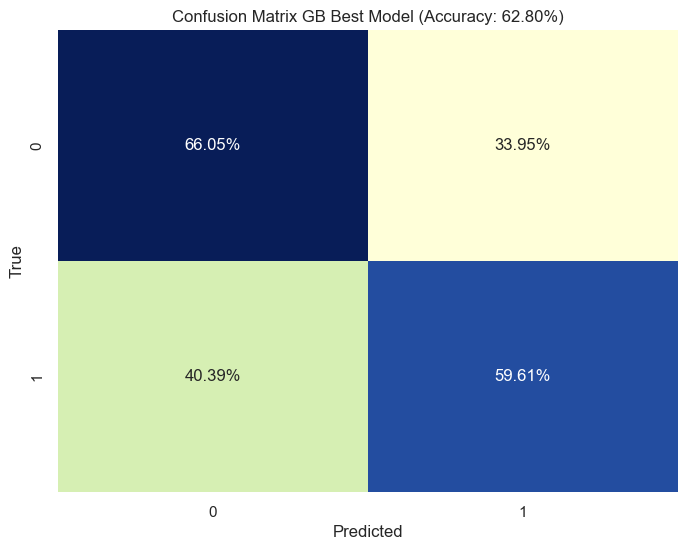

In [260]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test1, y_pred_gb_best)

accuracy = accuracy_score(y_test1, y_pred_gb_best)
percent_accuracy = accuracy * 100

cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(8, 6))
sns.heatmap(cm_normalized, annot=True, fmt='.2%', cmap='YlGnBu', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title(f'Confusion Matrix GB Best Model (Accuracy: {percent_accuracy:.2f}%)')
plt.show()

### Apply on test data

In [202]:
test_df.head()

Customer_id   Balance  PreviousCampaignResult  Product1  Product2  Product3  \
0  CTSP063999  13341.55                       0         0         0         0   
1  CTSP064000  18649.81                       0         1         0         0   
2  CTSP064001  28311.30                       0         1         0         0   
3  CTSP064002  18066.61                       0         1         0         0   
4  CTSP064003  10512.30                       0         0         0         0   

   Product4  Product5  Product6  Transaction1  ...  \
0         0         0         0           0.0  ...   
1         0         0         0           0.0  ...   
2         1         0         0           0.0  ...   
3         0         0         0           0.0  ...   
4         0         0         0           0.0  ...   

   RegularInteractionIndicator  CompetitiveRate1  CompetitiveRate2  \
0                            0             1.475             1.425   
1                            0             1.025             1.925   
2                            1             1.425             2.375   
3                            0             1.025             1.925   
4                            1             1.425             2.375   

   CompetitiveRate3  CompetitiveRate4  CompetitiveRate5  CompetitiveRate6  \
0             1.425             1.425             2.375             1.725   
1             1.125             2.375             1.175             1.425   
2             1.425             1.675             2.375             1.675   
3             1.125             2.375             1.175             1.425   
4             1.425             1.675             2.375             1.675   

   CompetitiveRate7  RateBefore  ReferenceRate  
0             2.125       1.725          1.375  
1             1.475       1.425          1.125  
2             1.575       1.675          1.375  
3             1.475       1.425          1.125  
4             1.575       1.675          1.375  

[5 rows x 36 columns]

In [203]:
pipeline_full.fit(test_df.drop("Customer_id", axis = 1))
transformed_test = pd.DataFrame(pipeline_full.transform(test_df.drop("Customer_id", axis = 1)), 
                                columns=pipeline_full.get_feature_names_out())

In [205]:
transformed_test[selected_features]

numerical__Balance  numerical__Transaction4  numerical__Transaction6  \
0              -0.873722                -0.437764                -0.313247   
1              -0.376651                -0.437764                 0.788265   
2               0.528060                -0.434139                -0.313247   
3              -0.431263                -0.286710                -0.313247   
4              -1.138656                -0.398490                -0.313247   
...                  ...                      ...                      ...   
1475           -0.595623                -0.437764                -0.313247   
1476            0.029769                 0.015397                -0.313247   
1477           -0.550603                -0.280668                -0.094273   
1478           -0.985192                 0.182765                -0.098373   
1479            0.774547                -0.437764                -0.313247   

      numerical__ActivityIndicator  numerical__Transaction5  \
0                        -0.198108                -0.217800   
1                        -0.198108                -0.217800   
2                        -0.198108                -0.217800   
3                        -0.198108                -0.217800   
4                        -0.098485                -0.171214   
...                            ...                      ...   
1475                     -0.198108                -0.217800   
1476                     -0.188146                -0.217800   
1477                     -0.038712                -0.217800   
1478                     -0.158259                -0.217800   
1479                     -0.178184                -0.217800   

      numerical__Transaction8  remainder__Product1  remainder__Product6  \
0                   -0.211146                  0.0                  0.0   
1                   -0.211146                  1.0                  0.0   
2                   -0.211146                  1.0                  0.0   
3                   -0.211146                  1.0                  0.0   
4                   -0.211146                  0.0                  0.0   
...                       ...                  ...                  ...   
1475                -0.211146                  0.0                  0.0   
1476                -0.211146                  0.0                  0.0   
1477                -0.211146                  1.0                  0.0   
1478                -0.211146                  1.0                  0.0   
1479                -0.211146                  0.0                  0.0   

      numerical__Transaction9  numerical__RegularInteractionIndicator  
0                   -0.113422                               -0.565128  
1                   -0.113422                               -0.565128  
2                   -0.113422                                0.389654  
3                   -0.113422                               -0.565128  
4                   -0.113422                                0.389654  
...                       ...                                     ...  
1475                -0.113422                               -0.565128  
1476                -0.113422                               -0.565128  
1477                -0.113422                                0.389654  
1478                -0.113422                                0.389654  
1479                 0.124109                               -0.565128  

[1480 rows x 10 columns]

### Random Forest

In [189]:
rfr_model

RandomForestClassifier(max_depth=20, min_samples_split=150, n_estimators=200)

In [190]:
rfc_result = test_df[['Customer_id']]
rfc_result['Target'] = rfr_model.predict(test_df[selected_features])
rfc_result.to_csv(r"C:\Users\rajat\OneDrive\Desktop\Lambton\Assignments\Intro to AI\Assignment 2\result_rfc1.csv", index=False)

C:\Users\rajat\AppData\Local\Temp\ipykernel_22280\3283869711.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<div class="alert alert-block alert-warning">
<b>Random Forest Final Result: </b> 

- Best Hyperparameters Tuning:
    {'bootstrap': True,
 'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 100,
 'n_estimators': 200}
- The result from training process (ROC Score): 62.66%
- The result from Kaggle After Uploading (ROC): 62.708%
</div>

### AdaBoost Classifier

In [191]:
AB_model

AdaBoostClassifier(learning_rate=0.25, n_estimators=140, random_state=2022)

In [192]:
ab_result = test_df[['Customer_id']]
ab_result['Target'] = AB_model.predict_proba(test_df[selected_features])[:,1]
ab_result.to_csv(r"C:\Users\rajat\OneDrive\Desktop\Lambton\Assignments\Intro to AI\Assignment 2\result_ab1.csv", index=False)

C:\Users\rajat\AppData\Local\Temp\ipykernel_22280\3956315169.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<div class="alert alert-block alert-warning">
<b>AdaBoost Classifier Final Result: </b> 

- Best Hyperparameters Tuning:
    {'learning_rate': 0.25, 'n_estimators': 140}
- The result from training process (ROC Score): 61.6%
- The result from Kaggle After Uploading (ROC): 64.87%
</div>

### Gradient Boosting

In [228]:
GBDT_model

GradientBoostingClassifier(learning_rate=0.01, max_depth=5, n_estimators=500,
                           random_state=2022)

In [193]:
gb_result = test_df[['Customer_id']]
gb_result['Target'] = GBDT_model.predict_proba(test_df[selected_features])[:,1]
gb_result.to_csv(r"C:\Users\rajat\OneDrive\Desktop\Lambton\Assignments\Intro to AI\Assignment 2\result_gb1.csv", index=False)

C:\Users\rajat\AppData\Local\Temp\ipykernel_22280\643938570.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<div class="alert alert-block alert-warning">
<b>Gradient Boosting Classifier Final Result: </b> 

- Best Hyperparameters Tuning:
    {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 500}
- The result from training process (ROC Score): 62.83%
- The result from Kaggle After Uploading (ROC): 67.557%
</div>

### XGB

In [230]:
XGB_model

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.5, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=2022, ...)

In [194]:
xgb_result = test_df[['Customer_id']]
xgb_result['Target'] = XGB_model.predict_proba(test_df[selected_features])[:,1]
xgb_result.to_csv(r"C:\Users\rajat\OneDrive\Desktop\Lambton\Assignments\Intro to AI\Assignment 2\result_xgb1.csv", index=False)

C:\Users\rajat\AppData\Local\Temp\ipykernel_22280\4068440153.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<div class="alert alert-block alert-warning">
<b>XGB Classifier Result: </b> 

- Best Hyperparameters Tuning:
    {base_score=0.5,
 booster = 'gbtree',
 gamma= 0.5,
 learning_rate= 0.05,
 n_estimators= 100,
 reg_alpha= 1,
 reg_lambda= 5}
- The result from training process (ROC Score): 62.8%
- The result from Kaggle After Uploading (ROC): 67.45%
</div>

<div class="alert alert-block alert-warning">
<b>Conclusions: </b> 

- We conclude that our best model at this stage is Gradient Boosting Classifier with learning_rate=0.01, max_depth=5, n_estimators=500.
    
- We have considered the result after uploading on Kaggle and it shows that the result with the original selected features from the train data was 67.557 which is slightly higher than the similar approach but with data processing for some skewed transaction features (67.259)
</div>

## 5. Neural Network 

In [1]:
pip install tensorflow --ignore-installed

  Using cached tensorflow-2.13.0-cp310-cp310-win_amd64.whl (1.9 kB)
  Using cached tensorflow_intel-2.13.0-cp310-cp310-win_amd64.whl (276.5 MB)
  Using cached tensorflow_io_gcs_filesystem-0.31.0-cp310-cp310-win_amd64.whl (1.5 MB)
  Using cached tensorboard-2.13.0-py3-none-any.whl (5.6 MB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached grpcio-1.57.0-cp310-cp310-win_amd64.whl (4.3 MB)
  Using cached termcolor-2.3.0-py3-none-any.whl (6.9 kB)
  Using cached h5py-3.9.0-cp310-cp310-win_amd64.whl (2.7 MB)
  Using cached absl_py-1.4.0-py3-none-any.whl (126 kB)
  Using cached six-1.16.0-py2.py3-none-any.whl (11 kB)
  Using cached wrapt-1.15.0-cp310-cp310-win_amd64.whl (36 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached setuptools-68.0.0-py3-none-any.whl (804 kB)
  Using cached libclang-16.0.6-py2.py3-none-win_amd64.whl (24.4 MB)
  Using cached numpy-1.24.3-cp310-cp310-win_amd64.whl (14.8 MB)
  Using cached google_pasta-0.2.0-py3-none-any.

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\ASUS\\anaconda3\\Lib\\site-packages\\numpy\\.libs\\libopenblas64__v0.3.21-gcc_10_3_0.dll'
Consider using the `--user` option or check the permissions.



In [120]:
# Importing tensorflow and keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Softmax, Dropout
from tensorflow.keras import optimizers

### First ANN

In [121]:
Create_model = Sequential()

#Input Layer
Create_model.add(Dense(x_train.shape[1], activation='relu', input_dim = x_train.shape[1]))

#Hidden Layer
Create_model.add(Dense(512,kernel_initializer='normal', activation='relu'))
Create_model.add(Dense(512,kernel_initializer='normal', activation='relu'))
Create_model.add(Dense(256,kernel_initializer='normal', activation='relu'))
Create_model.add(Dense(128,kernel_initializer='normal', activation='relu'))
Create_model.add(Dense(64,kernel_initializer='normal', activation='relu'))
Create_model.add(Dense(32,kernel_initializer='normal', activation='relu'))
#Output Layer
Create_model.add(Dense(1,kernel_initializer='normal', activation = 'sigmoid'))

In [122]:
#Compile the network

Create_model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])
Create_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 58)                3422      
                                                                 
 dense_1 (Dense)             (None, 512)               30208     
                                                                 
 dense_2 (Dense)             (None, 512)               262656    
                                                                 
 dense_3 (Dense)             (None, 256)               131328    
                                                                 
 dense_4 (Dense)             (None, 128)               32896     
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dense_6 (Dense)             (None, 32)                2

In [36]:
#library to use KerasClassifier
!pip install scikeras

In [123]:
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasRegressor

batch_size = [50,75]
epochs = [3,5]

Hyp_Model_1 = KerasRegressor(model=Create_model)

param_grid = dict(batch_size=batch_size, epochs = epochs)
randSearch_1 = GridSearchCV(Hyp_Model_1, param_grid, cv=3, scoring='accuracy',  n_jobs=-1, verbose=0)

In [124]:
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"]="5"
history = randSearch_1.fit(x_train, y_train,verbose=0)

INFO:tensorflow:Assets written to: C:\Users\HP\AppData\Local\Temp\tmprsxx43cq\assets


INFO:tensorflow:Assets written to: C:\Users\HP\AppData\Local\Temp\tmprsxx43cq\assets


INFO:tensorflow:Assets written to: C:\Users\HP\AppData\Local\Temp\tmppuz284v5\assets


INFO:tensorflow:Assets written to: C:\Users\HP\AppData\Local\Temp\tmppuz284v5\assets


INFO:tensorflow:Assets written to: C:\Users\HP\AppData\Local\Temp\tmpkcl1a1w9\assets


INFO:tensorflow:Assets written to: C:\Users\HP\AppData\Local\Temp\tmpkcl1a1w9\assets


INFO:tensorflow:Assets written to: C:\Users\HP\AppData\Local\Temp\tmpafru468d\assets


INFO:tensorflow:Assets written to: C:\Users\HP\AppData\Local\Temp\tmpafru468d\assets


INFO:tensorflow:Assets written to: C:\Users\HP\AppData\Local\Temp\tmpexye81c3\assets


INFO:tensorflow:Assets written to: C:\Users\HP\AppData\Local\Temp\tmpexye81c3\assets


INFO:tensorflow:Assets written to: C:\Users\HP\AppData\Local\Temp\tmpdhbnb16o\assets


INFO:tensorflow:Assets written to: C:\Users\HP\AppData\Local\Temp\tmpdhbnb16o\assets


INFO:tensorflow:Assets written to: C:\Users\HP\AppData\Local\Temp\tmp97nm36wv\assets


INFO:tensorflow:Assets written to: C:\Users\HP\AppData\Local\Temp\tmp97nm36wv\assets


INFO:tensorflow:Assets written to: C:\Users\HP\AppData\Local\Temp\tmprf2ky9bx\assets


INFO:tensorflow:Assets written to: C:\Users\HP\AppData\Local\Temp\tmprf2ky9bx\assets


INFO:tensorflow:Assets written to: C:\Users\HP\AppData\Local\Temp\tmpd82gi5y4\assets


INFO:tensorflow:Assets written to: C:\Users\HP\AppData\Local\Temp\tmpd82gi5y4\assets


INFO:tensorflow:Assets written to: C:\Users\HP\AppData\Local\Temp\tmpifvlvt4a\assets


INFO:tensorflow:Assets written to: C:\Users\HP\AppData\Local\Temp\tmpifvlvt4a\assets


INFO:tensorflow:Assets written to: C:\Users\HP\AppData\Local\Temp\tmpl0tcxuev\assets


INFO:tensorflow:Assets written to: C:\Users\HP\AppData\Local\Temp\tmpl0tcxuev\assets


INFO:tensorflow:Assets written to: C:\Users\HP\AppData\Local\Temp\tmpovlop6pu\assets


INFO:tensorflow:Assets written to: C:\Users\HP\AppData\Local\Temp\tmpovlop6pu\assets


INFO:tensorflow:Assets written to: C:\Users\HP\AppData\Local\Temp\tmp1cwojksd\assets


INFO:tensorflow:Assets written to: C:\Users\HP\AppData\Local\Temp\tmp1cwojksd\assets


INFO:tensorflow:Assets written to: C:\Users\HP\AppData\Local\Temp\tmp2tommqmw\assets


INFO:tensorflow:Assets written to: C:\Users\HP\AppData\Local\Temp\tmp2tommqmw\assets


INFO:tensorflow:Assets written to: C:\Users\HP\AppData\Local\Temp\tmph_c811dw\assets


INFO:tensorflow:Assets written to: C:\Users\HP\AppData\Local\Temp\tmph_c811dw\assets


INFO:tensorflow:Assets written to: C:\Users\HP\AppData\Local\Temp\tmpuwav236c\assets


INFO:tensorflow:Assets written to: C:\Users\HP\AppData\Local\Temp\tmpuwav236c\assets


INFO:tensorflow:Assets written to: C:\Users\HP\AppData\Local\Temp\tmpewpk9x7r\assets


INFO:tensorflow:Assets written to: C:\Users\HP\AppData\Local\Temp\tmpewpk9x7r\assets


INFO:tensorflow:Assets written to: C:\Users\HP\AppData\Local\Temp\tmplsg6b114\assets


INFO:tensorflow:Assets written to: C:\Users\HP\AppData\Local\Temp\tmplsg6b114\assets


INFO:tensorflow:Assets written to: C:\Users\HP\AppData\Local\Temp\tmp40lsaofg\assets


INFO:tensorflow:Assets written to: C:\Users\HP\AppData\Local\Temp\tmp40lsaofg\assets


INFO:tensorflow:Assets written to: C:\Users\HP\AppData\Local\Temp\tmpjz9f6yvf\assets


INFO:tensorflow:Assets written to: C:\Users\HP\AppData\Local\Temp\tmpjz9f6yvf\assets


INFO:tensorflow:Assets written to: C:\Users\HP\AppData\Local\Temp\tmpiay8tv6t\assets


INFO:tensorflow:Assets written to: C:\Users\HP\AppData\Local\Temp\tmpiay8tv6t\assets


INFO:tensorflow:Assets written to: C:\Users\HP\AppData\Local\Temp\tmpn386g9xr\assets


INFO:tensorflow:Assets written to: C:\Users\HP\AppData\Local\Temp\tmpn386g9xr\assets


INFO:tensorflow:Assets written to: C:\Users\HP\AppData\Local\Temp\tmpys7pwk2_\assets


INFO:tensorflow:Assets written to: C:\Users\HP\AppData\Local\Temp\tmpys7pwk2_\assets


INFO:tensorflow:Assets written to: C:\Users\HP\AppData\Local\Temp\tmp2ujuo265\assets


INFO:tensorflow:Assets written to: C:\Users\HP\AppData\Local\Temp\tmp2ujuo265\assets


INFO:tensorflow:Assets written to: C:\Users\HP\AppData\Local\Temp\tmpermyzxvk\assets


INFO:tensorflow:Assets written to: C:\Users\HP\AppData\Local\Temp\tmpermyzxvk\assets
C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:952: UserWarning:

One or more of the test scores are non-finite: [nan nan nan nan]



INFO:tensorflow:Assets written to: C:\Users\HP\AppData\Local\Temp\tmp5a60l5_3\assets


INFO:tensorflow:Assets written to: C:\Users\HP\AppData\Local\Temp\tmp5a60l5_3\assets


INFO:tensorflow:Assets written to: C:\Users\HP\AppData\Local\Temp\tmpfpxg9msv\assets


INFO:tensorflow:Assets written to: C:\Users\HP\AppData\Local\Temp\tmpfpxg9msv\assets


In [125]:
best_params = randSearch_1.best_params_
best_estimators = randSearch_1.best_estimator_

print(best_params)
print(best_estimators)

{'batch_size': 50, 'epochs': 3}
KerasRegressor(
	model=<keras.src.engine.sequential.Sequential object at 0x0000021629799DE0>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=50
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=3
)


In [208]:
y_prediction_ann1 = best_estimators.predict(x_test)

256/256 [==============================] - 2s 8ms/step


In [209]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score,roc_auc_score

y_predicted_binary=[1 if i > 0.5 else 0 for i in y_prediction_ann1]
print("Precision Score with ANN: ", precision_score(y_test, y_predicted_binary))
print("Recall Score with ANN: ", recall_score(y_test, y_predicted_binary))
print("F1 Score Score with ANN: ", f1_score(y_test, y_predicted_binary))
print("Accuracy Score with ANN: ", accuracy_score(y_test, y_predicted_binary))
print("ROC by ANN:", roc_auc_score(y_test, y_predicted_binary))

Precision Score with ANN:  0.6236320380650278
Recall Score with ANN:  0.6146631233390651
F1 Score Score with ANN:  0.6191150999842545
Accuracy Score with ANN:  0.62203125
ROC by ANN: 0.6220277978088423


In [134]:
from sklearn.inspection import permutation_importance

def calculate_feature_importance(model, X, y):
    # Calculate feature importance using permutation importance
    result = permutation_importance(model, X, y, n_repeats=2, random_state=42)
    
    # Get feature importance scores
    importance_scores = result.importances_mean
    
    # Print feature importance scores
    for i, score in enumerate(importance_scores):
        print(f"Feature {i+1}: {score}")

In [194]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import learning_curve

def learning_curve(model):
      
    from sklearn.model_selection import learning_curve, validation_curve

    # Learning curve
    train_sizes, train_scores, test_scores = learning_curve(model, x_train, y_train, cv=2)

    # Calculate mean and standard deviation for training and test scores
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Plot learning curve
    plt.figure()
    plt.title("Learning Curve")
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                    test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
            label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
            label="Cross-validation score")

    plt.legend(loc="best")
    plt.show()

In [154]:
def plot_roc_curve(model, X, y):
    
    from sklearn.metrics import roc_curve
    # Make predictions on the test set
    y_pred_curve = model.predict(X)
    
    # Calculate false positive rate, true positive rate, and threshold
    fpr, tpr, thresholds = roc_curve(y, y_pred_curve)
    
    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'ROC AUC = {roc_auc_score(y_test, y_pred_curve):.2f}')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc='lower right')
    plt.show()

In [133]:
# Features Importance for the First ANN 
calculate_feature_importance(best_estimators, x_train, y_train)

1024/1024 [==============================] - 4s 4ms/step
Feature 1: 0.0006466964793262845
Feature 2: -0.0005830145512905801
Feature 3: 5.364476271726056e-05
Feature 4: 0.0010968868150527482
Feature 5: 0.00212067891817543
Feature 6: 0.001192100852605275
Feature 7: 0.00071263822766691
Feature 8: 0.001236005544728876
Feature 9: 0.0002127610693441658
Feature 10: 0.0011361035064092473
Feature 11: 0.00035493446991644956
Feature 12: 0.0018230509131294352
Feature 13: 0.0009679089399649751
Feature 14: -3.615400144163505e-05
Feature 15: 0.00012985024363139827
Feature 16: 0.0009851098878031668
Feature 17: 0.0004460978337375021
Feature 18: 0.0006870631445842953
Feature 19: 8.939994319467903e-05
Feature 20: -0.0003673311390664698
Feature 21: 0.0002049868102538636
Feature 22: 0.002075439721292834
Feature 23: 0.0011676612219119198
Feature 24: 0.00026468048659948157
Feature 25: 0.0009539392910383748
Feature 26: 0.0009234762686223622
Feature 27: 0.0014533787765263668
Feature 28: -0.00044189876312243176

INFO:tensorflow:Assets written to: C:\Users\HP\AppData\Local\Temp\tmp6nudjt1_\assets


INFO:tensorflow:Assets written to: C:\Users\HP\AppData\Local\Temp\tmp6nudjt1_\assets


Epoch 1/3
82/82 [==============================] - 2s 10ms/step - loss: 0.6466 - accuracy: 0.6310
Epoch 2/3
82/82 [==============================] - 1s 13ms/step - loss: 0.6416 - accuracy: 0.6413
Epoch 3/3
82/82 [==============================] - 0s 5ms/step


INFO:tensorflow:Assets written to: C:\Users\HP\AppData\Local\Temp\tmpn0amrebt\assets


INFO:tensorflow:Assets written to: C:\Users\HP\AppData\Local\Temp\tmpn0amrebt\assets


Epoch 1/3
267/267 [==============================] - 4s 10ms/step - loss: 0.6559 - accuracy: 0.6186
Epoch 2/3
267/267 [==============================] - 3s 11ms/step - loss: 0.6535 - accuracy: 0.6210
Epoch 3/3
267/267 [==============================] - 1s 5ms/step
INFO:tensorflow:Assets written to: C:\Users\HP\AppData\Local\Temp\tmp1ekkb9qk\assets


INFO:tensorflow:Assets written to: C:\Users\HP\AppData\Local\Temp\tmp1ekkb9qk\assets


Epoch 1/3
451/451 [==============================] - 6s 12ms/step - loss: 0.6536 - accuracy: 0.6238
Epoch 2/3
451/451 [==============================] - 6s 13ms/step - loss: 0.6518 - accuracy: 0.6271
Epoch 3/3
451/451 [==============================] - 2s 4ms/step
INFO:tensorflow:Assets written to: C:\Users\HP\AppData\Local\Temp\tmpvj_qqzhc\assets


INFO:tensorflow:Assets written to: C:\Users\HP\AppData\Local\Temp\tmpvj_qqzhc\assets


Epoch 1/3
635/635 [==============================] - 8s 11ms/step - loss: 0.6521 - accuracy: 0.6238
Epoch 2/3
635/635 [==============================] - 7s 11ms/step - loss: 0.6510 - accuracy: 0.6265
Epoch 3/3
635/635 [==============================] - 3s 4ms/step
INFO:tensorflow:Assets written to: C:\Users\HP\AppData\Local\Temp\tmp4teavn6l\assets


INFO:tensorflow:Assets written to: C:\Users\HP\AppData\Local\Temp\tmp4teavn6l\assets


Epoch 1/3
820/820 [==============================] - 9s 10ms/step - loss: 0.6524 - accuracy: 0.6253
Epoch 2/3
820/820 [==============================] - 8s 10ms/step - loss: 0.6503 - accuracy: 0.6256
Epoch 3/3
820/820 [==============================] - 4s 5ms/step
INFO:tensorflow:Assets written to: C:\Users\HP\AppData\Local\Temp\tmpu0ttpzcq\assets


INFO:tensorflow:Assets written to: C:\Users\HP\AppData\Local\Temp\tmpu0ttpzcq\assets


Epoch 1/3
82/82 [==============================] - 2s 9ms/step - loss: 0.6505 - accuracy: 0.6178
Epoch 2/3
82/82 [==============================] - 1s 10ms/step - loss: 0.6475 - accuracy: 0.6217
Epoch 3/3
82/82 [==============================] - 0s 4ms/step
INFO:tensorflow:Assets written to: C:\Users\HP\AppData\Local\Temp\tmpabgpj5yh\assets


INFO:tensorflow:Assets written to: C:\Users\HP\AppData\Local\Temp\tmpabgpj5yh\assets


Epoch 1/3
267/267 [==============================] - 3s 9ms/step - loss: 0.6570 - accuracy: 0.6144
Epoch 2/3
267/267 [==============================] - 3s 10ms/step - loss: 0.6536 - accuracy: 0.6189
Epoch 3/3
267/267 [==============================] - 1s 4ms/step
INFO:tensorflow:Assets written to: C:\Users\HP\AppData\Local\Temp\tmpp_mmil0x\assets


INFO:tensorflow:Assets written to: C:\Users\HP\AppData\Local\Temp\tmpp_mmil0x\assets


Epoch 1/3
451/451 [==============================] - 6s 11ms/step - loss: 0.6532 - accuracy: 0.6238
Epoch 2/3
451/451 [==============================] - 5s 11ms/step - loss: 0.6525 - accuracy: 0.6233
Epoch 3/3
451/451 [==============================] - 2s 5ms/step
INFO:tensorflow:Assets written to: C:\Users\HP\AppData\Local\Temp\tmpb8c9a1mr\assets


INFO:tensorflow:Assets written to: C:\Users\HP\AppData\Local\Temp\tmpb8c9a1mr\assets


Epoch 1/3
635/635 [==============================] - 8s 10ms/step - loss: 0.6530 - accuracy: 0.6227
Epoch 2/3
635/635 [==============================] - 7s 11ms/step - loss: 0.6508 - accuracy: 0.6248
Epoch 3/3
635/635 [==============================] - 3s 4ms/step
INFO:tensorflow:Assets written to: C:\Users\HP\AppData\Local\Temp\tmpz6hkuskz\assets


INFO:tensorflow:Assets written to: C:\Users\HP\AppData\Local\Temp\tmpz6hkuskz\assets


Epoch 1/3
820/820 [==============================] - 9s 10ms/step - loss: 0.6519 - accuracy: 0.6233
Epoch 2/3
820/820 [==============================] - 8s 10ms/step - loss: 0.6508 - accuracy: 0.6259
Epoch 3/3
820/820 [==============================] - 4s 5ms/step
INFO:tensorflow:Assets written to: C:\Users\HP\AppData\Local\Temp\tmp_o3x5615\assets


INFO:tensorflow:Assets written to: C:\Users\HP\AppData\Local\Temp\tmp_o3x5615\assets


Epoch 1/3
82/82 [==============================] - 2s 9ms/step - loss: 0.6525 - accuracy: 0.6234
Epoch 2/3
82/82 [==============================] - 1s 9ms/step - loss: 0.6472 - accuracy: 0.6186
Epoch 3/3
82/82 [==============================] - 0s 5ms/step
INFO:tensorflow:Assets written to: C:\Users\HP\AppData\Local\Temp\tmpob0xtiw4\assets


INFO:tensorflow:Assets written to: C:\Users\HP\AppData\Local\Temp\tmpob0xtiw4\assets


Epoch 1/3
267/267 [==============================] - 4s 9ms/step - loss: 0.6524 - accuracy: 0.6220
Epoch 2/3
267/267 [==============================] - 3s 9ms/step - loss: 0.6520 - accuracy: 0.6241
Epoch 3/3
267/267 [==============================] - 1s 5ms/step
INFO:tensorflow:Assets written to: C:\Users\HP\AppData\Local\Temp\tmp1ervcy3c\assets


INFO:tensorflow:Assets written to: C:\Users\HP\AppData\Local\Temp\tmp1ervcy3c\assets


Epoch 1/3
451/451 [==============================] - 5s 10ms/step - loss: 0.6536 - accuracy: 0.6214
Epoch 2/3
451/451 [==============================] - 4s 9ms/step - loss: 0.6523 - accuracy: 0.6244
Epoch 3/3
451/451 [==============================] - 2s 4ms/step
INFO:tensorflow:Assets written to: C:\Users\HP\AppData\Local\Temp\tmplz4eag3d\assets


INFO:tensorflow:Assets written to: C:\Users\HP\AppData\Local\Temp\tmplz4eag3d\assets


Epoch 1/3
635/635 [==============================] - 7s 10ms/step - loss: 0.6532 - accuracy: 0.6243
Epoch 2/3
635/635 [==============================] - 6s 10ms/step - loss: 0.6513 - accuracy: 0.6245
Epoch 3/3
635/635 [==============================] - 3s 4ms/step


INFO:tensorflow:Assets written to: C:\Users\HP\AppData\Local\Temp\tmp360_zs9o\assets


INFO:tensorflow:Assets written to: C:\Users\HP\AppData\Local\Temp\tmp360_zs9o\assets


Epoch 1/3
820/820 [==============================] - 10s 11ms/step - loss: 0.6519 - accuracy: 0.6238
Epoch 2/3
820/820 [==============================] - 9s 11ms/step - loss: 0.6510 - accuracy: 0.6254
Epoch 3/3
820/820 [==============================] - 4s 5ms/step
INFO:tensorflow:Assets written to: C:\Users\HP\AppData\Local\Temp\tmp_63f4tnb\assets


INFO:tensorflow:Assets written to: C:\Users\HP\AppData\Local\Temp\tmp_63f4tnb\assets


Epoch 1/3
82/82 [==============================] - 2s 11ms/step - loss: 0.6516 - accuracy: 0.6237
Epoch 2/3
82/82 [==============================] - 1s 9ms/step - loss: 0.6474 - accuracy: 0.6225
Epoch 3/3
82/82 [==============================] - 0s 4ms/step
INFO:tensorflow:Assets written to: C:\Users\HP\AppData\Local\Temp\tmpvce9ktwc\assets


INFO:tensorflow:Assets written to: C:\Users\HP\AppData\Local\Temp\tmpvce9ktwc\assets


Epoch 1/3
267/267 [==============================] - 4s 10ms/step - loss: 0.6531 - accuracy: 0.6211
Epoch 2/3
267/267 [==============================] - 3s 10ms/step - loss: 0.6515 - accuracy: 0.6248
Epoch 3/3
267/267 [==============================] - 1s 4ms/step
INFO:tensorflow:Assets written to: C:\Users\HP\AppData\Local\Temp\tmppbapbf30\assets


INFO:tensorflow:Assets written to: C:\Users\HP\AppData\Local\Temp\tmppbapbf30\assets


Epoch 1/3
451/451 [==============================] - 6s 10ms/step - loss: 0.6553 - accuracy: 0.6209
Epoch 2/3
451/451 [==============================] - 5s 10ms/step - loss: 0.6531 - accuracy: 0.6214
Epoch 3/3
451/451 [==============================] - 2s 5ms/step
INFO:tensorflow:Assets written to: C:\Users\HP\AppData\Local\Temp\tmpjaow2glu\assets


INFO:tensorflow:Assets written to: C:\Users\HP\AppData\Local\Temp\tmpjaow2glu\assets


Epoch 1/3
635/635 [==============================] - 7s 10ms/step - loss: 0.6547 - accuracy: 0.6222
Epoch 2/3
635/635 [==============================] - 6s 10ms/step - loss: 0.6537 - accuracy: 0.6206
Epoch 3/3
635/635 [==============================] - 3s 5ms/step
INFO:tensorflow:Assets written to: C:\Users\HP\AppData\Local\Temp\tmpwn_vn3t9\assets


INFO:tensorflow:Assets written to: C:\Users\HP\AppData\Local\Temp\tmpwn_vn3t9\assets


Epoch 1/3
820/820 [==============================] - 10s 11ms/step - loss: 0.6538 - accuracy: 0.6222
Epoch 2/3
820/820 [==============================] - 9s 10ms/step - loss: 0.6525 - accuracy: 0.6233
Epoch 3/3
820/820 [==============================] - 3s 4ms/step
INFO:tensorflow:Assets written to: C:\Users\HP\AppData\Local\Temp\tmpyqskwv23\assets


INFO:tensorflow:Assets written to: C:\Users\HP\AppData\Local\Temp\tmpyqskwv23\assets


Epoch 1/3
82/82 [==============================] - 2s 11ms/step - loss: 0.6519 - accuracy: 0.6205
Epoch 2/3
82/82 [==============================] - 1s 11ms/step - loss: 0.6468 - accuracy: 0.6222
Epoch 3/3
82/82 [==============================] - 0s 5ms/step
INFO:tensorflow:Assets written to: C:\Users\HP\AppData\Local\Temp\tmptlkcndz5\assets


INFO:tensorflow:Assets written to: C:\Users\HP\AppData\Local\Temp\tmptlkcndz5\assets


Epoch 1/3
267/267 [==============================] - 4s 11ms/step - loss: 0.6540 - accuracy: 0.6186
Epoch 2/3
267/267 [==============================] - 3s 10ms/step - loss: 0.6510 - accuracy: 0.6237
Epoch 3/3
267/267 [==============================] - 1s 5ms/step
INFO:tensorflow:Assets written to: C:\Users\HP\AppData\Local\Temp\tmp559p03xt\assets


INFO:tensorflow:Assets written to: C:\Users\HP\AppData\Local\Temp\tmp559p03xt\assets


Epoch 1/3
451/451 [==============================] - 5s 10ms/step - loss: 0.6544 - accuracy: 0.6213
Epoch 2/3
451/451 [==============================] - 5s 11ms/step - loss: 0.6539 - accuracy: 0.6209
Epoch 3/3
451/451 [==============================] - 2s 4ms/step
INFO:tensorflow:Assets written to: C:\Users\HP\AppData\Local\Temp\tmpe3pre6_k\assets


INFO:tensorflow:Assets written to: C:\Users\HP\AppData\Local\Temp\tmpe3pre6_k\assets


Epoch 1/3
635/635 [==============================] - 8s 10ms/step - loss: 0.6546 - accuracy: 0.6219
Epoch 2/3
635/635 [==============================] - 6s 10ms/step - loss: 0.6531 - accuracy: 0.6241
Epoch 3/3
635/635 [==============================] - 3s 5ms/step
INFO:tensorflow:Assets written to: C:\Users\HP\AppData\Local\Temp\tmpoywgbst9\assets


INFO:tensorflow:Assets written to: C:\Users\HP\AppData\Local\Temp\tmpoywgbst9\assets


Epoch 1/3
820/820 [==============================] - 9s 10ms/step - loss: 0.6529 - accuracy: 0.6230
Epoch 2/3
820/820 [==============================] - 8s 10ms/step - loss: 0.6520 - accuracy: 0.6233
Epoch 3/3
820/820 [==============================] - 4s 5ms/step


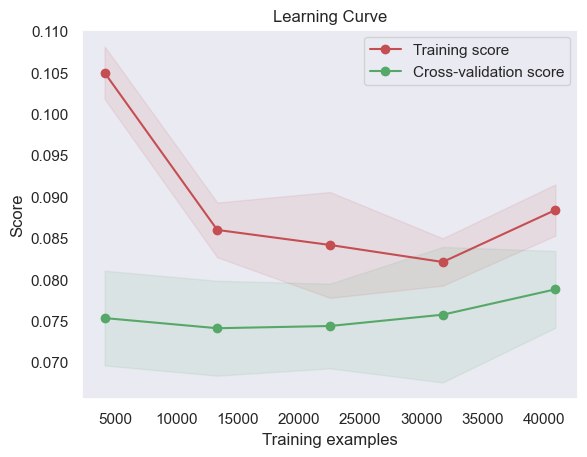

In [144]:
learning_curve(best_estimators)

256/256 [==============================] - 1s 5ms/step


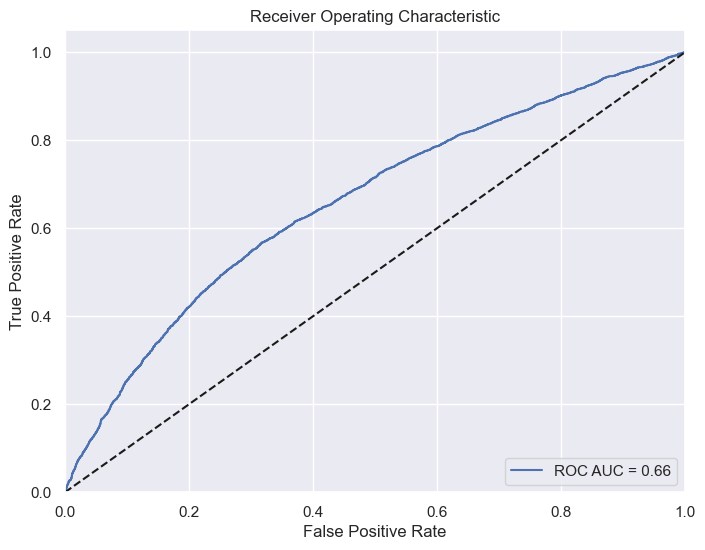

In [155]:
plot_roc_curve(best_estimators, x_test, y_test)

### Second ANN:Another way to Train Keras Models with L2 and Dropouts

In [156]:
Create_model_2 = Sequential()

#Input Layer
Create_model_2.add(Dense(x_train.shape[1], activation='relu', input_dim = x_train.shape[1]))

#Hidden Layer
Create_model_2.add(Dense(512,kernel_initializer='normal', activation='relu', kernel_regularizer=tf.keras.regularizers.L1(0.01), bias_regularizer=tf.keras.regularizers.l2(0.015)))
Create_model_2.add(Dropout(0.3))
Create_model_2.add(Dense(256,kernel_initializer='normal', activation='relu'))
Create_model_2.add(Dropout(0.3))
Create_model_2.add(Dense(128,kernel_initializer='normal', activation='relu', kernel_regularizer=tf.keras.regularizers.L1(0.01), bias_regularizer=tf.keras.regularizers.l2(0.015)))
Create_model_2.add(Dropout(0.3))
Create_model_2.add(Dense(64,kernel_initializer='normal', activation='relu'))
Create_model_2.add(Dropout(0.3))
Create_model_2.add(Dense(32,kernel_initializer='normal', activation='relu'))
Create_model_2.add(Dropout(0.3))
#Output Layer
Create_model_2.add(Dense(1,kernel_initializer='normal', activation = 'sigmoid'))

opt = keras.optimizers.Adam(learning_rate=0.01)

Create_model_2.compile(loss = 'binary_crossentropy', optimizer=opt, metrics=['accuracy'])
Create_model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 58)                3422      
                                                                 
 dense_9 (Dense)             (None, 512)               30208     
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_10 (Dense)            (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_11 (Dense)            (None, 128)               32896     
                                                                 
 dropout_2 (Dropout)         (None, 128)              

#### Early Stopping using Keras Callback

In [160]:
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode = 'min',verbose=1, patience=5)

history = Create_model_2.fit(x_train, y_train, batch_size=25, epochs=50, callbacks=[es])

Epoch 1/50
2041/2048 [============================>.] - ETA: 0s - loss: 1.4755 - accuracy: 0.5050WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


2048/2048 [==============================] - 15s 7ms/step - loss: 1.4754 - accuracy: 0.5051
Epoch 2/50
2046/2048 [============================>.] - ETA: 0s - loss: 1.4754 - accuracy: 0.4992WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


2048/2048 [==============================] - 17s 8ms/step - loss: 1.4754 - accuracy: 0.4991
Epoch 3/50
2046/2048 [============================>.] - ETA: 0s - loss: 1.4753 - accuracy: 0.4995WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


2048/2048 [==============================] - 17s 8ms/step - loss: 1.4753 - accuracy: 0.4994
Epoch 4/50
2041/2048 [============================>.] - ETA: 0s - loss: 1.4753 - accuracy: 0.5004WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


2048/2048 [==============================] - 16s 8ms/step - loss: 1.4753 - accuracy: 0.5004
Epoch 5/50
2041/2048 [============================>.] - ETA: 0s - loss: 1.4752 - accuracy: 0.5042WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


2048/2048 [==============================] - 15s 7ms/step - loss: 1.4752 - accuracy: 0.5040
Epoch 6/50
2048/2048 [==============================] - ETA: 0s - loss: 1.4752 - accuracy: 0.4990WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


2048/2048 [==============================] - 17s 8ms/step - loss: 1.4752 - accuracy: 0.4990
Epoch 7/50
2044/2048 [============================>.] - ETA: 0s - loss: 1.4750 - accuracy: 0.5017WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


2048/2048 [==============================] - 18s 9ms/step - loss: 1.4750 - accuracy: 0.5017
Epoch 8/50
2042/2048 [============================>.] - ETA: 0s - loss: 1.4748 - accuracy: 0.5017WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


2048/2048 [==============================] - 17s 8ms/step - loss: 1.4748 - accuracy: 0.5017
Epoch 9/50
2043/2048 [============================>.] - ETA: 0s - loss: 1.4747 - accuracy: 0.4979WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


2048/2048 [==============================] - 17s 8ms/step - loss: 1.4747 - accuracy: 0.4977
Epoch 10/50
2044/2048 [============================>.] - ETA: 0s - loss: 1.4745 - accuracy: 0.5008WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


2048/2048 [==============================] - 17s 8ms/step - loss: 1.4745 - accuracy: 0.5009
Epoch 11/50
2046/2048 [============================>.] - ETA: 0s - loss: 1.4744 - accuracy: 0.4979WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


2048/2048 [==============================] - 18s 9ms/step - loss: 1.4744 - accuracy: 0.4978
Epoch 12/50
2047/2048 [============================>.] - ETA: 0s - loss: 1.4742 - accuracy: 0.5017WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


2048/2048 [==============================] - 18s 9ms/step - loss: 1.4742 - accuracy: 0.5018
Epoch 13/50
2048/2048 [==============================] - ETA: 0s - loss: 1.4743 - accuracy: 0.4966WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


2048/2048 [==============================] - 19s 9ms/step - loss: 1.4743 - accuracy: 0.4966
Epoch 14/50
2044/2048 [============================>.] - ETA: 0s - loss: 1.4740 - accuracy: 0.4997WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


2048/2048 [==============================] - 18s 9ms/step - loss: 1.4740 - accuracy: 0.4997
Epoch 15/50
2044/2048 [============================>.] - ETA: 0s - loss: 1.4739 - accuracy: 0.4991WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


2048/2048 [==============================] - 18s 9ms/step - loss: 1.4739 - accuracy: 0.4992
Epoch 16/50
2046/2048 [============================>.] - ETA: 0s - loss: 1.4737 - accuracy: 0.5017WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


2048/2048 [==============================] - 16s 8ms/step - loss: 1.4737 - accuracy: 0.5017
Epoch 17/50
2047/2048 [============================>.] - ETA: 0s - loss: 1.4737 - accuracy: 0.4995WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


2048/2048 [==============================] - 15s 7ms/step - loss: 1.4737 - accuracy: 0.4995
Epoch 18/50
2043/2048 [============================>.] - ETA: 0s - loss: 1.4737 - accuracy: 0.5021WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


2048/2048 [==============================] - 17s 8ms/step - loss: 1.4737 - accuracy: 0.5020
Epoch 19/50
2043/2048 [============================>.] - ETA: 0s - loss: 1.4738 - accuracy: 0.4945WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


2048/2048 [==============================] - 17s 8ms/step - loss: 1.4738 - accuracy: 0.4948
Epoch 20/50
2044/2048 [============================>.] - ETA: 0s - loss: 1.4736 - accuracy: 0.4979WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


2048/2048 [==============================] - 18s 9ms/step - loss: 1.4736 - accuracy: 0.4979
Epoch 21/50
2039/2048 [============================>.] - ETA: 0s - loss: 1.4735 - accuracy: 0.4983WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


2048/2048 [==============================] - 17s 8ms/step - loss: 1.4735 - accuracy: 0.4982
Epoch 22/50
2042/2048 [============================>.] - ETA: 0s - loss: 1.4732 - accuracy: 0.5002WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


2048/2048 [==============================] - 18s 9ms/step - loss: 1.4732 - accuracy: 0.5002
Epoch 23/50
2046/2048 [============================>.] - ETA: 0s - loss: 1.4731 - accuracy: 0.5004WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


2048/2048 [==============================] - 18s 9ms/step - loss: 1.4731 - accuracy: 0.5004
Epoch 24/50
2047/2048 [============================>.] - ETA: 0s - loss: 1.4731 - accuracy: 0.4990WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


2048/2048 [==============================] - 18s 9ms/step - loss: 1.4731 - accuracy: 0.4991
Epoch 25/50
2044/2048 [============================>.] - ETA: 0s - loss: 1.4729 - accuracy: 0.4976WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


2048/2048 [==============================] - 17s 8ms/step - loss: 1.4729 - accuracy: 0.4976
Epoch 26/50
2044/2048 [============================>.] - ETA: 0s - loss: 1.4728 - accuracy: 0.5012WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


2048/2048 [==============================] - 69s 34ms/step - loss: 1.4728 - accuracy: 0.5011
Epoch 27/50
2046/2048 [============================>.] - ETA: 0s - loss: 1.4727 - accuracy: 0.5018WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


2048/2048 [==============================] - 14s 7ms/step - loss: 1.4727 - accuracy: 0.5017
Epoch 28/50
2048/2048 [==============================] - ETA: 0s - loss: 1.4728 - accuracy: 0.5015WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


2048/2048 [==============================] - 18s 9ms/step - loss: 1.4728 - accuracy: 0.5015
Epoch 29/50
2044/2048 [============================>.] - ETA: 0s - loss: 1.4727 - accuracy: 0.4993WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


2048/2048 [==============================] - 18s 9ms/step - loss: 1.4727 - accuracy: 0.4993
Epoch 30/50
2044/2048 [============================>.] - ETA: 0s - loss: 1.4726 - accuracy: 0.5006WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


2048/2048 [==============================] - 17s 8ms/step - loss: 1.4726 - accuracy: 0.5006
Epoch 31/50
2048/2048 [==============================] - ETA: 0s - loss: 1.4727 - accuracy: 0.4984WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


2048/2048 [==============================] - 18s 9ms/step - loss: 1.4727 - accuracy: 0.4984
Epoch 32/50
2047/2048 [============================>.] - ETA: 0s - loss: 1.4725 - accuracy: 0.4994WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


2048/2048 [==============================] - 18s 9ms/step - loss: 1.4725 - accuracy: 0.4994
Epoch 33/50
2044/2048 [============================>.] - ETA: 0s - loss: 1.4723 - accuracy: 0.4983WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


2048/2048 [==============================] - 18s 9ms/step - loss: 1.4723 - accuracy: 0.4983
Epoch 34/50
2047/2048 [============================>.] - ETA: 0s - loss: 1.4722 - accuracy: 0.4972WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


2048/2048 [==============================] - 18s 9ms/step - loss: 1.4722 - accuracy: 0.4972
Epoch 35/50
2045/2048 [============================>.] - ETA: 0s - loss: 1.4719 - accuracy: 0.5027WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


2048/2048 [==============================] - 18s 9ms/step - loss: 1.4719 - accuracy: 0.5028
Epoch 36/50
2044/2048 [============================>.] - ETA: 0s - loss: 1.4716 - accuracy: 0.5016WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


2048/2048 [==============================] - 15s 8ms/step - loss: 1.4716 - accuracy: 0.5016
Epoch 37/50
2043/2048 [============================>.] - ETA: 0s - loss: 1.4715 - accuracy: 0.4986WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


2048/2048 [==============================] - 18s 9ms/step - loss: 1.4716 - accuracy: 0.4985
Epoch 38/50
2048/2048 [==============================] - ETA: 0s - loss: 1.4713 - accuracy: 0.5027WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


2048/2048 [==============================] - 18s 9ms/step - loss: 1.4713 - accuracy: 0.5027
Epoch 39/50
2044/2048 [============================>.] - ETA: 0s - loss: 1.4712 - accuracy: 0.4999WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


2048/2048 [==============================] - 16s 8ms/step - loss: 1.4712 - accuracy: 0.5000
Epoch 40/50
2044/2048 [============================>.] - ETA: 0s - loss: 1.4710 - accuracy: 0.4975WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


2048/2048 [==============================] - 18s 9ms/step - loss: 1.4710 - accuracy: 0.4974
Epoch 41/50
2046/2048 [============================>.] - ETA: 0s - loss: 1.4708 - accuracy: 0.4995WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


2048/2048 [==============================] - 17s 8ms/step - loss: 1.4708 - accuracy: 0.4995
Epoch 42/50
2044/2048 [============================>.] - ETA: 0s - loss: 1.4707 - accuracy: 0.4986WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


2048/2048 [==============================] - 17s 8ms/step - loss: 1.4707 - accuracy: 0.4985
Epoch 43/50
2048/2048 [==============================] - ETA: 0s - loss: 1.4705 - accuracy: 0.5014WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


2048/2048 [==============================] - 14s 7ms/step - loss: 1.4705 - accuracy: 0.5014
Epoch 44/50
2047/2048 [============================>.] - ETA: 0s - loss: 1.4703 - accuracy: 0.5031WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


2048/2048 [==============================] - 15s 7ms/step - loss: 1.4703 - accuracy: 0.5032
Epoch 45/50
2040/2048 [============================>.] - ETA: 0s - loss: 1.4702 - accuracy: 0.4994WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


2048/2048 [==============================] - 16s 8ms/step - loss: 1.4702 - accuracy: 0.4990
Epoch 46/50
2041/2048 [============================>.] - ETA: 0s - loss: 1.4701 - accuracy: 0.5011WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


2048/2048 [==============================] - 15s 8ms/step - loss: 1.4701 - accuracy: 0.5011
Epoch 47/50
2046/2048 [============================>.] - ETA: 0s - loss: 1.4700 - accuracy: 0.4989WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


2048/2048 [==============================] - 17s 8ms/step - loss: 1.4700 - accuracy: 0.4989
Epoch 48/50
2048/2048 [==============================] - ETA: 0s - loss: 1.4698 - accuracy: 0.5016WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


2048/2048 [==============================] - 17s 9ms/step - loss: 1.4698 - accuracy: 0.5016
Epoch 49/50
2047/2048 [============================>.] - ETA: 0s - loss: 1.4698 - accuracy: 0.4967WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


2048/2048 [==============================] - 16s 8ms/step - loss: 1.4699 - accuracy: 0.4967
Epoch 50/50
2040/2048 [============================>.] - ETA: 0s - loss: 1.4697 - accuracy: 0.4969WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


2048/2048 [==============================] - 16s 8ms/step - loss: 1.4697 - accuracy: 0.4969


In [161]:
from matplotlib import pyplot

train_acc = Create_model_2.evaluate(x_train, y_train)
test_acc = Create_model_2.evaluate(x_test, y_test)

y_prediction = Create_model_2.predict(x_test)
y_predicted_binary_2=[1 if i > 0.5 else 0 for i in y_prediction]

from sklearn.metrics import mean_squared_error
import numpy as np

print("Precision Score with ANN: ", precision_score(y_test, y_predicted_binary_2))
print("Recall Score with ANN: ", recall_score(y_test, y_predicted_binary_2))
print("F1 Score Score with ANN: ", f1_score(y_test, y_predicted_binary_2))
print("Accuracy Score with ANN: ", accuracy_score(y_test, y_predicted_binary_2))
print("ROC by ANN:", roc_auc_score(y_test, y_predicted_binary_2))

400/400 [==============================] - 1s 2ms/step
Precision Score with ANN:  0.499765625
Recall Score with ANN:  1.0
F1 Score Score with ANN:  0.666458300776163
Accuracy Score with ANN:  0.499765625
ROC by ANN: 0.5


In [195]:
# Features Importance for the Second ANN 
calculate_feature_importance(Create_model_2, x_train, y_train)

1024/1024 [==============================] - 5s 4ms/step
Feature 1: 0.0007033156694150611
Feature 2: -0.0004196097524136744
Feature 3: 6.188314432864495e-05
Feature 4: 0.0010089084623289835
Feature 5: 0.0021120284447847526
Feature 6: 0.001048486898792833
Feature 7: 0.0006949385452216239
Feature 8: 0.0011787550025463833
Feature 9: 0.0002116294566486543
Feature 10: 0.0011013787486346405
Feature 11: 0.00036753989197879644
Feature 12: 0.0018558869785025855
Feature 13: 0.0008807088142757658
Feature 14: 0.00019102525266007087
Feature 15: 0.00011465332084104052
Feature 16: 0.0009764510529247095
Feature 17: 0.0004791799868129609
Feature 18: 0.0009141440303058745
Feature 19: 0.00011340384772273726
Feature 20: -0.00030374478751404865
Feature 21: 0.0002087635318894776
Feature 22: 0.0018935184186071319
Feature 23: 0.0010054215904922725
Feature 24: 0.00032458134000684646
Feature 25: 0.0009076961212124979
Feature 26: 0.0009541066333584314
Feature 27: 0.0014266400843208626
Feature 28: -0.000398615793

400/400 [==============================] - 1s 3ms/step


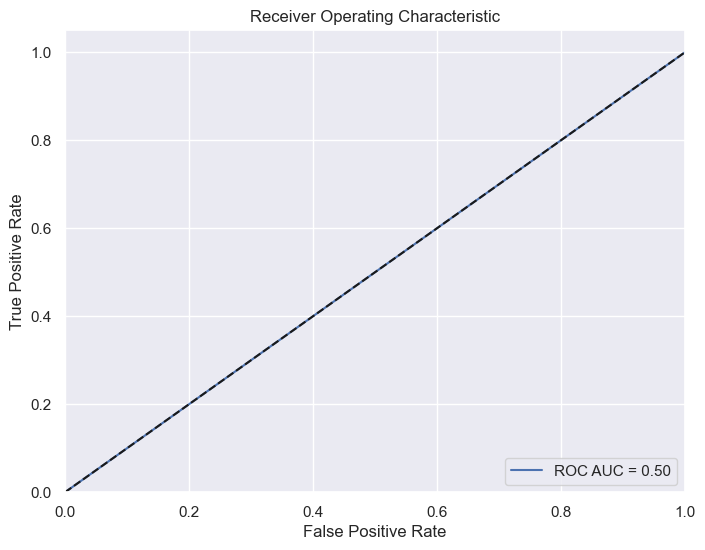

In [162]:
plot_roc_curve(Create_model_2, x_test, y_test)

### Third ANN : Applied Standard scaling with dynamic learning rate 

In [163]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, LearningRateScheduler
from sklearn.model_selection import StratifiedKFold

In [167]:
class ImprovedBinaryClassifier:
    def __init__(self, learning_rate=0.001, epochs=50, batch_size=64):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.batch_size = batch_size
        self.model = None
        self.scaler = None
    
    def _create_model(self):
        model = Sequential()
        model.add(Dense(128, activation='relu', input_dim=self.input_dim))
        model.add(Dropout(0.3))
        model.add(Dense(64, activation='relu'))
        model.add(Dropout(0.3))
        model.add(Dense(32, activation='relu'))
        model.add(Dropout(0.3))
        model.add(Dense(1, activation='sigmoid'))
        return model
    
    def _lr_schedule(self, epoch):
        lr = self.learning_rate
        if epoch > 20:
            lr = lr / 2
        return lr
    
    def fit(self, x_train, y_train):
        self.input_dim = x_train.shape[1]
        
        # Standardize features using a scaler fitted on the training data
#         self.scaler = StandardScaler()
#         x_train_scaled = self.scaler.fit_transform(x_train)
        
        # Build the model
        self.model = self._create_model()
        
        # Compile the model with custom learning rate
        optimizer = Adam(learning_rate=self.learning_rate)
        self.model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
        
        # Early Stopping
        early_stopping = EarlyStopping(monitor='val_loss', mode='min', patience=5, verbose=1)
        
        # Learning Rate Scheduler
        lr_scheduler = LearningRateScheduler(self._lr_schedule)
        
        # Train the model
        history = self.model.fit(x_train, y_train, epochs=self.epochs, batch_size=self.batch_size,
                                 validation_split=0.1, callbacks=[early_stopping, lr_scheduler], verbose=2)
        
    def predict(self, x_test):
        # Standardize features using the same scaler fitted on the training data
#         x_test_scaled = self.scaler.transform(x_test)
        
        # Make predictions
        y_pred = self.model.predict(x_test)
        y_pred_binary = (y_pred > 0.5).astype(int)
        return y_pred_binary

In [170]:
# x_train = pd.DataFrame(x_train)
# y_train = pd.DataFrame(y_train)

# # Reset the index of the DataFrames
# x_train.reset_index(drop=True, inplace=True)
# y_train.reset_index(drop=True, inplace=True)

# Instantiate the ImprovedBinaryClassifier
model_ann3 = ImprovedBinaryClassifier(learning_rate=0.001, epochs=50, batch_size=64)

# Use cross-validation on the training set
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
precision_scores = []
recall_scores = []
f1_scores = []
accuracy_scores = []
roc_auc_scores = []

for train_index, val_index in skf.split(x_train, y_train):
    x_train_fold, x_val_fold = x_train.iloc[train_index], x_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
    
    # Train the model
    model_ann3.fit(x_train_fold, y_train_fold)
    
    # Make predictions on the validation set
    y_pred_fold = model_ann3.predict(x_val_fold)
    
    # Calculate evaluation metrics
    precision_3 = precision_score(y_val_fold, y_pred_fold)
    recall_3 = recall_score(y_val_fold, y_pred_fold)
    f1_3 = f1_score(y_val_fold, y_pred_fold)
    accuracy_3 = accuracy_score(y_val_fold, y_pred_fold)
    roc_auc_3 = roc_auc_score(y_val_fold, y_pred_fold)
    
    precision_scores.append(precision_3)
    recall_scores.append(recall_3)
    f1_scores.append(f1_3)
    accuracy_scores.append(accuracy_3)
    roc_auc_scores.append(roc_auc_3)

# Average evaluation metrics over folds
avg_precision = np.mean(precision_scores)
avg_recall = np.mean(recall_scores)
avg_f1 = np.mean(f1_scores)
avg_accuracy = np.mean(accuracy_scores)
avg_roc_auc = np.mean(roc_auc_scores)

print("Average Precision:", avg_precision)
print("Average Recall:", avg_recall)
print("Average F1 Score:", avg_f1)
print("Average Accuracy:", avg_accuracy)
print("Average ROC AUC:", avg_roc_auc)


Epoch 1/50
576/576 - 3s - loss: 0.6766 - accuracy: 0.5799 - val_loss: 0.6647 - val_accuracy: 0.6135 - lr: 0.0010 - 3s/epoch - 5ms/step
Epoch 2/50
576/576 - 2s - loss: 0.6641 - accuracy: 0.6121 - val_loss: 0.6604 - val_accuracy: 0.6162 - lr: 0.0010 - 2s/epoch - 4ms/step
Epoch 3/50
576/576 - 2s - loss: 0.6615 - accuracy: 0.6150 - val_loss: 0.6588 - val_accuracy: 0.6191 - lr: 0.0010 - 2s/epoch - 4ms/step
Epoch 4/50
576/576 - 2s - loss: 0.6597 - accuracy: 0.6176 - val_loss: 0.6579 - val_accuracy: 0.6211 - lr: 0.0010 - 2s/epoch - 3ms/step
Epoch 5/50
576/576 - 2s - loss: 0.6576 - accuracy: 0.6192 - val_loss: 0.6555 - val_accuracy: 0.6226 - lr: 0.0010 - 2s/epoch - 3ms/step
Epoch 6/50
576/576 - 2s - loss: 0.6575 - accuracy: 0.6208 - val_loss: 0.6570 - val_accuracy: 0.6270 - lr: 0.0010 - 2s/epoch - 4ms/step
Epoch 7/50
576/576 - 2s - loss: 0.6556 - accuracy: 0.6228 - val_loss: 0.6560 - val_accuracy: 0.6226 - lr: 0.0010 - 2s/epoch - 4ms/step
Epoch 8/50
576/576 - 2s - loss: 0.6554 - accuracy: 0.62

Epoch 16/50
576/576 - 2s - loss: 0.6521 - accuracy: 0.6269 - val_loss: 0.6525 - val_accuracy: 0.6235 - lr: 0.0010 - 2s/epoch - 3ms/step
Epoch 17/50
576/576 - 2s - loss: 0.6517 - accuracy: 0.6263 - val_loss: 0.6525 - val_accuracy: 0.6279 - lr: 0.0010 - 2s/epoch - 4ms/step
Epoch 18/50
576/576 - 2s - loss: 0.6504 - accuracy: 0.6286 - val_loss: 0.6528 - val_accuracy: 0.6221 - lr: 0.0010 - 2s/epoch - 3ms/step
Epoch 19/50
576/576 - 2s - loss: 0.6503 - accuracy: 0.6283 - val_loss: 0.6545 - val_accuracy: 0.6216 - lr: 0.0010 - 2s/epoch - 4ms/step
Epoch 20/50
576/576 - 2s - loss: 0.6497 - accuracy: 0.6270 - val_loss: 0.6537 - val_accuracy: 0.6199 - lr: 0.0010 - 2s/epoch - 3ms/step
Epoch 21/50
576/576 - 2s - loss: 0.6484 - accuracy: 0.6314 - val_loss: 0.6544 - val_accuracy: 0.6211 - lr: 0.0010 - 2s/epoch - 3ms/step
Epoch 22/50
576/576 - 2s - loss: 0.6474 - accuracy: 0.6314 - val_loss: 0.6538 - val_accuracy: 0.6248 - lr: 5.0000e-04 - 2s/epoch - 3ms/step
Epoch 22: early stopping
320/320 [==========

### Making predictions on x_test

In [171]:
y_prediction = model_ann3.predict(x_test)

y_predicted_binary_new=[1 if i > 0.5 else 0 for i in y_prediction]

print("Precision Score with ANN: ", precision_score(y_test, y_predicted_binary_new))
print("Recall Score with ANN: ", recall_score(y_test, y_predicted_binary_new))
print("F1 Score Score with ANN: ", f1_score(y_test, y_predicted_binary_new))
print("Accuracy Score with ANN: ", accuracy_score(y_test, y_predicted_binary_new))
print("ROC by ANN:", roc_auc_score(y_test, y_predicted_binary_new))

400/400 [==============================] - 1s 1ms/step
Precision Score with ANN:  0.6487003058103975
Recall Score with ANN:  0.5305612005627638
F1 Score Score with ANN:  0.5837131309656892
Accuracy Score with ANN:  0.621796875
ROC by ANN: 0.6217541283151161


In [197]:
# Features Importance for the Third ANN 
calculate_feature_importance(model_ann3, x_train, y_train)

1024/1024 [==============================] - 8s 8ms/step
Feature 1: 0.0007033156694150611
Feature 2: -0.0004196097524136744
Feature 3: 6.188314432864495e-05
Feature 4: 0.0010089084623289835
Feature 5: 0.0021120284447847526
Feature 6: 0.001048486898792833
Feature 7: 0.0006949385452216239
Feature 8: 0.0011787550025463833
Feature 9: 0.0002116294566486543
Feature 10: 0.0011013787486346405
Feature 11: 0.00036753989197879644
Feature 12: 0.0018558869785025855
Feature 13: 0.0008807088142757658
Feature 14: 0.00019102525266007087
Feature 15: 0.00011465332084104052
Feature 16: 0.0009764510529247095
Feature 17: 0.0004791799868129609
Feature 18: 0.0009141440303058745
Feature 19: 0.00011340384772273726
Feature 20: -0.00030374478751404865
Feature 21: 0.0002087635318894776
Feature 22: 0.0018935184186071319
Feature 23: 0.0010054215904922725
Feature 24: 0.00032458134000684646
Feature 25: 0.0009076961212124979
Feature 26: 0.0009541066333584314
Feature 27: 0.0014266400843208626
Feature 28: -0.000398615793

400/400 [==============================] - 1s 1ms/step


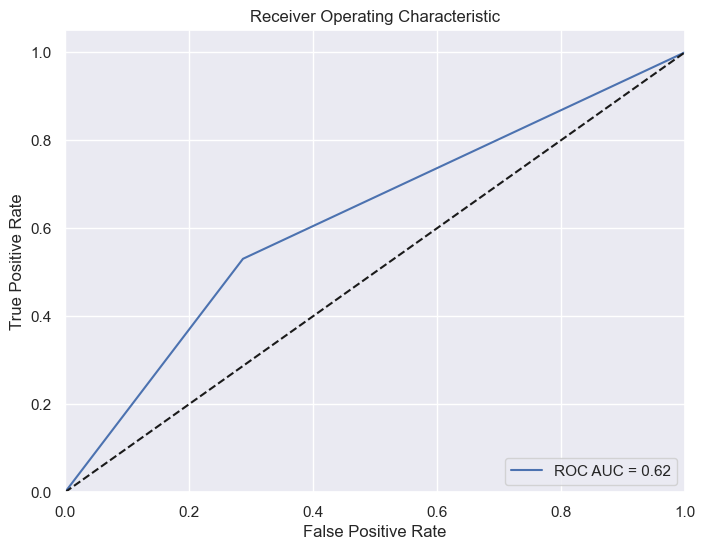

In [172]:
plot_roc_curve(model_ann3, x_test, y_test)

### Tabulating results for 3 ANN models

In [199]:
from tabulate import tabulate

# Define the data
data = [
    ["First ANN Model",  0.6236320380650278,0.6146631233390651, 0.6191150999842545,0.62203125,0.6220277978088423],
    ["Second ANN Model", 0.499765625, 1.0, 0.666458300776163,0.499765625, 0.5],
    ["Third ANN Model", 0.6487003058103975,0.5305612005627638,0.5837131309656892, 0.621796875, 0.6217541283151161]
]

# Define the headers
headers = ["Model", "Precision", "Recall", "F1 Score", "Accuracy", "ROC Score"]

# Tabulate the data
table = tabulate(data, headers, tablefmt="grid")

# Print the table
print(table)

+------------------+-------------+----------+------------+------------+-------------+
| Model            |   Precision |   Recall |   F1 Score |   Accuracy |   ROC Score |
+==================+=============+==========+============+============+=============+
| First ANN Model  |    0.623632 | 0.614663 |   0.619115 |   0.622031 |    0.622028 |
+------------------+-------------+----------+------------+------------+-------------+
| Second ANN Model |    0.499766 | 1        |   0.666458 |   0.499766 |    0.5      |
+------------------+-------------+----------+------------+------------+-------------+
| Third ANN Model  |    0.6487   | 0.530561 |   0.583713 |   0.621797 |    0.621754 |
+------------------+-------------+----------+------------+------------+-------------+


<div class="alert alert-block alert-warning">
<b>ANN Training Results: </b> 

- First ANN Model: Simple Network with hidden layers and output layer (Sigmoid Function): 62.2% (Accuracy)
- Second ANN Model: Network with Drop-out and Early Stopping: approximately 50.0% (Accuracy)
- Third ANN Model: Customized Network with dynamic learning rate: 62.17% (Accuracy)
    
--> We conclude that the first ANN Model works the best on our training data.
</div>

### Showcase our selected ANN Model - First ANN Model

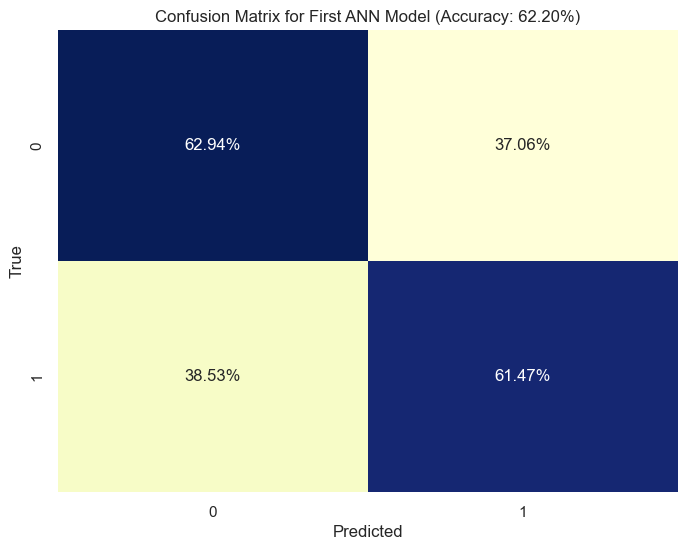

In [212]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

y_prediction_ann1_binary = [1 if i > 0.5 else 0 for i in y_prediction_ann1]

cm_ann1 = confusion_matrix(y_test, y_prediction_ann1_binary)

accuracy_ann1 = accuracy_score(y_test, y_prediction_ann1_binary)
percent_accuracy_ann1 = accuracy_ann1 * 100

cm_normalized_ann1 = cm_ann1.astype('float') / cm_ann1.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(8, 6))
sns.heatmap(cm_normalized_ann1, annot=True, fmt='.2%', cmap='YlGnBu', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title(f'Confusion Matrix for First ANN Model (Accuracy: {percent_accuracy_ann1:.2f}%)')
plt.show()

### Applying these ANN Models on test set

#### First ANN Model

In [215]:
ann1_result = test_df[['Customer_id']]

ann1_result['Target'] = best_estimators.predict(transformed_test)
ann1_result['Target'] = [1 if i > 0.5 else 0 for i in ann1_result['Target']]

ann1_result.to_csv(r"C:\Users\HP\Desktop\Intro to AI Projects\Assignment 2\result_ann1.csv", index=False)

30/30 [==============================] - 0s 8ms/step


C:\Users\HP\AppData\Local\Temp\ipykernel_23860\933949333.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\HP\AppData\Local\Temp\ipykernel_23860\933949333.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



#### Second ANN Model

In [218]:
ann2_result = test_df[['Customer_id']]

ann2_result['Target'] = Create_model_2.predict(transformed_test)
ann2_result['Target'] = [1 if i > 0.5 else 0 for i in ann1_result['Target']]

ann2_result.to_csv(r"C:\Users\HP\Desktop\Intro to AI Projects\Assignment 2\result_ann2.csv", index=False)

47/47 [==============================] - 0s 5ms/step


C:\Users\HP\AppData\Local\Temp\ipykernel_23860\2503803221.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\HP\AppData\Local\Temp\ipykernel_23860\2503803221.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



#### Third ANN Model

In [219]:
ann3_result = test_df[['Customer_id']]

ann3_result['Target'] = model_ann3.predict(transformed_test)
ann3_result['Target'] = [1 if i > 0.5 else 0 for i in ann1_result['Target']]

ann3_result.to_csv(r"C:\Users\HP\Desktop\Intro to AI Projects\Assignment 2\result_ann3.csv", index=False)

47/47 [==============================] - 0s 2ms/step


C:\Users\HP\AppData\Local\Temp\ipykernel_23860\1817344357.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\HP\AppData\Local\Temp\ipykernel_23860\1817344357.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<div class="alert alert-block alert-warning">
<b>ANN Conclusions: </b> 

- We conclude that our best model at this stage is 1st ANN Model with the training ROC Score 62.21% and the Kaggle Result (Public Score) 63.78%
    
- Second ANN Score from Kaggle: approxiamtely 50%
- Third ANN Score from Kaggle: 62.135%

- The reason why these models gave us these results is because at different time of learning, the ANN will learn in a different way and it might cause the differences between these models.
    
- For further strategies to achieve the higher results on ANN model, we should cautiously explore the layers added in the model as well as have a better hyperparameter tuning for these models which is the one we have not done in these approaches.
</div>